In [1]:
#expand cell width to 100%
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
#import pandas 
import pandas as pd
#import numpy
import numpy as np

In [3]:
#set the address of the dataframe containing the pre-processed dataset
dataFramePickleAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Dataset/GRSFiveDegreeSectionPreProcessedDataset.pkl"

In [4]:
#read the dataframe
dataframe=pd.read_pickle(dataFramePickleAddress)

In [5]:
#print the dataframe
dataframe

Max Lat per section  Min Lat per section  Max Lon per section  \
0                   -87.5                -90.0                180.0   
1                   -82.5                -87.5               -135.0   
2                   -82.5                -87.5                -90.0   
3                   -82.5                -87.5                -45.0   
4                   -82.5                -87.5                  0.0   
...                   ...                  ...                  ...   
1785                 87.5                 82.5                 45.0   
1786                 87.5                 82.5                 90.0   
1787                 87.5                 82.5                135.0   
1788                 87.5                 82.5                180.0   
1789                 90.0                 87.5                180.0   

      Min Lon per section  No. of spectra per section  \
0                  -180.0                        7002   
1                  -180.0                        1599   
2                  -135.0                        1940   
3                   -90.0                        1818   
4                   -45.0                        1855   
...                   ...                         ...   
1785                  0.0                        1748   
1786                 45.0                        2035   
1787                 90.0                        1903   
1788                135.0                        1902   
1789               -180.0                        7294   

      Total active time per section  \
0                     215153.707937   
1                      49113.391313   
2                      59600.854365   
3                      55864.552890   
4                      57007.157885   
...                             ...   
1785                   53653.126808   
1786                   62483.348769   
1787                   58474.988092   
1788                   58399.244640   
1789                  223993.416783   

                                         Summed Spectra  \
0     [270112.3731329723, 44221.71628033137, 45327.9...   
1     [101728.76450092324, 11353.802617173642, 10565...   
2     [69004.10988058499, 13041.311258502305, 12455....   
3     [51455.21453525051, 11348.088811988011, 11487....   
4     [51138.233213284286, 10203.879826977849, 12005...   
...                                                 ...   
1785  [172204.68795185376, 12837.986652251333, 11392...   
1786  [69631.4865040512, 13027.290796013549, 12597.1...   
1787  [58870.11519813659, 11691.651373354718, 11794....   
1788  [69077.49428235987, 10543.676356979646, 11999....   
1789  [342422.3644296753, 45978.50919445278, 45791.6...   

                                     Normalized Spectra  \
0     [75.32634479500912, 12.332127585726989, 12.640...   
1     [124.27824075904886, 13.87051756806718, 12.906...   
2     [69.4662289143658, 13.12864863838364, 12.53878...   
3     [55.264254565457236, 12.188146033430378, 12.33...   
4     [53.82296024948041, 10.739577490433051, 12.635...   
...                                                 ...   
1785  [192.57556626933405, 14.356650673799725, 12.73...   
1786  [66.8640409410214, 12.509531949810704, 12.0964...   
1787  [60.40543191435932, 11.996566485773727, 12.102...   
1788  [70.97094632772614, 10.832684314943478, 12.328...   
1789  [91.72297186611817, 12.316034066037092, 12.265...   

                                 Log Normalized Spectra  Aluminum  ...  \
0     [1.8769468938381042, 1.0910380092016139, 1.101...    15.151  ...   
1     [2.0943950968999223, 1.1420926667518603, 1.110...    13.394  ...   
2     [1.8417737231418783, 1.118220025472807, 1.0982...    13.634  ...   
3     [1.742444316396172, 1.085937649122431, 1.09122...    14.642  ...   
4     [1.7309675801735431, 1.030987195964759, 1.1015...    14.030  ...   
...                                                 ...       ...  ...   
1785  [2.2846011835800297, 1.1570531332525222, 1.105...    14.9

In [6]:
#create a variable epsilon, which contains a very small value that is added to all inputs and outputs to make sure no values are 0
epsilon=1e-8

In [7]:
#get the abundance values for the seven elements for which the model is to be trained
#aluminium
aluminiumAbundances=dataframe['Aluminum'].to_numpy()+epsilon
#calcium
calciumAbundances=dataframe['Calcium'].to_numpy()+epsilon
#iron
ironAbundances=dataframe['Iron'].to_numpy()+epsilon
#magnesium
magnesiumAbundances=dataframe['Magnesium'].to_numpy()+epsilon
#oxygen
oxygenAbundances=dataframe['Oxygen'].to_numpy()+epsilon
#silicon
siliconAbundances=dataframe['Silicon'].to_numpy()+epsilon
#titanium
titaniumAbundances=dataframe['Titanium'].to_numpy()+epsilon

In [8]:
#get abundance values for the three nuclear elements
potassiumAbundances=dataframe['Potassium'].to_numpy()+epsilon
thoriumAbundances=dataframe['Thorium'].to_numpy()+epsilon
uraniumAbundances=dataframe['Uranium'].to_numpy()+epsilon

In [9]:
#scale nuclear abundance values between 0 and 1
potassiumAbundances=(potassiumAbundances-np.amin(potassiumAbundances))/np.ptp(potassiumAbundances)
thoriumAbundances=(thoriumAbundances-np.amin(thoriumAbundances))/np.ptp(thoriumAbundances)
uraniumAbundances=(uraniumAbundances-np.amin(uraniumAbundances))/np.ptp(uraniumAbundances)

In [10]:
#create an list which contains the element names to be estimated
regularElementNames=['Aluminum',
                     'Calcium',
                     'Iron',
                     'Magnesium',
                     'Oxygen',
                     'Silicon',
                     'Titanium']
#conver the list to a numpy array
regularElementNames=np.array(regularElementNames)

In [11]:
#combine the elemental abundances into a single matrix
regularElementalAbundances=np.dstack([aluminiumAbundances,
                                      calciumAbundances,
                                      ironAbundances,
                                      magnesiumAbundances,
                                      oxygenAbundances,
                                      siliconAbundances,
                                      titaniumAbundances])
#reshape the abundance matrix
regularElementalAbundances=regularElementalAbundances[0,:,:]
#rescale weigth percent values from % (0-100) to franctions (0-1)
regularElementalAbundances=regularElementalAbundances/100

In [12]:
#create an list which contains the element names to be estimated
nuclearElementNames=['Potassium',
                     'Thorium',
                     'Uranium']
#conver the list to a numpy array
nuclearElementNames=np.array(nuclearElementNames)

In [13]:
#create an array containing the names of all elements
allElementNames=np.hstack([regularElementNames,nuclearElementNames])

In [14]:
#combine the elemental abundances into a single matrix
nuclearElementalAbundances=np.dstack([potassiumAbundances,
                                      thoriumAbundances,
                                      uraniumAbundances])
#reshape the abundance matrix
nuclearElementalAbundances=nuclearElementalAbundances[0,:,:]

In [15]:
#read the pre-processed spectra as a numpy array
preprocessedSpectra=dataframe['Normalized Continuum Removed Denoised Log Scaled Spectra'].to_numpy()
#reshape the numpy array
preprocessedSpectra=np.vstack(preprocessedSpectra)+epsilon

In [16]:
#compute the eneergy values for each band
gain=17.8 #keV/channel
energyBands=np.arange(0,512,1)*gain

In [17]:
#get the index of the last relavent band
finalRelaventBandIndex=np.argmin(np.abs(energyBands-8000))
#compute the index of the first relavent band
firstRelaventBandIndex=finalRelaventBandIndex-preprocessedSpectra.shape[1]+1
#get the energies of the relavent bands
relaventEnergyBands=energyBands[firstRelaventBandIndex:finalRelaventBandIndex+1]

In [18]:
#remove the variables no longer needed from memory
del firstRelaventBandIndex
del finalRelaventBandIndex
del energyBands
del gain
del dataframe
del dataFramePickleAddress
del aluminiumAbundances
del calciumAbundances
del ironAbundances
del magnesiumAbundances
del oxygenAbundances
del siliconAbundances
del titaniumAbundances

In [19]:
#import pyplot from matplotlib
import matplotlib.pyplot as plt

In [20]:
#set plot parameters
baseFontSize=18
noOfBinsForHistogram=100
noOfXticks=5

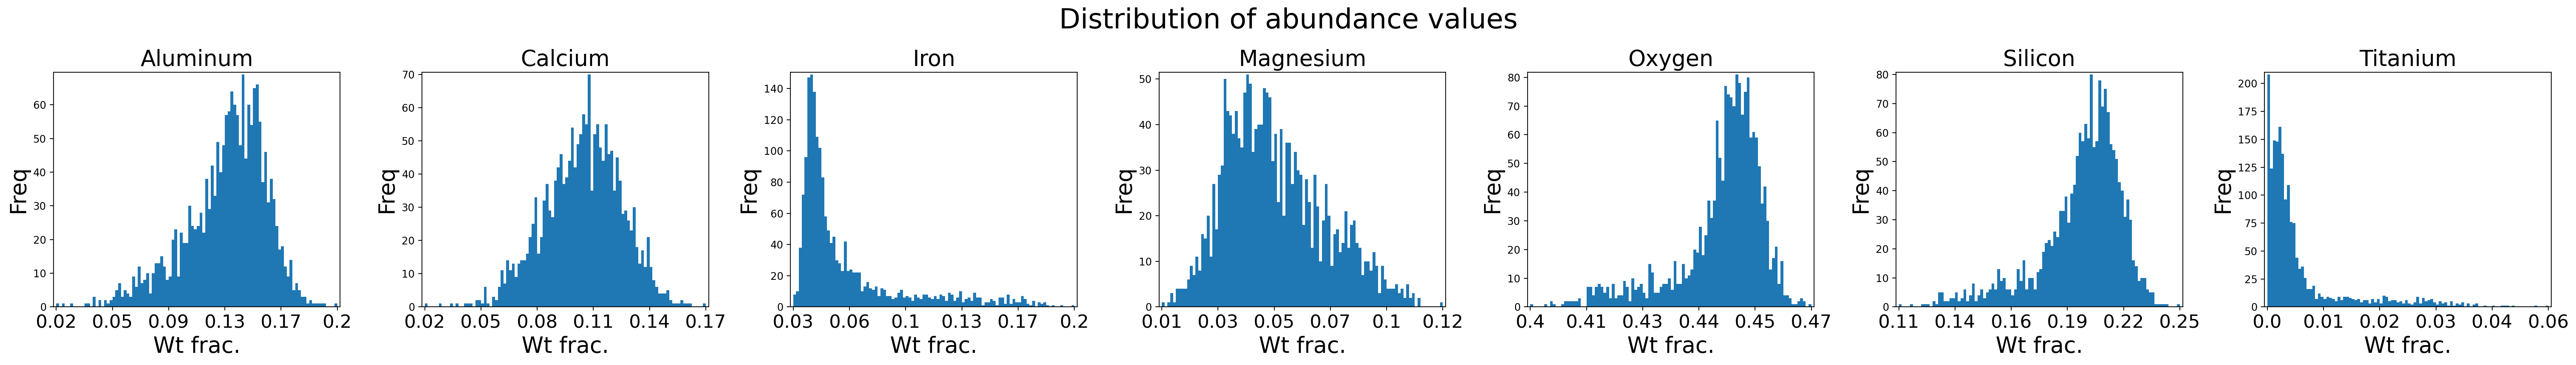

In [21]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=7,
                         figsize=(35,5),
                         dpi=200)
#iterate over all elements
for i in range(regularElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(regularElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(regularElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("Wt frac.",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(regularElementalAbundances[:,i]),
                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(regularElementalAbundances[:,i]),
                                                 np.amax(regularElementalAbundances[:,i])+np.ptp(regularElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(regularElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

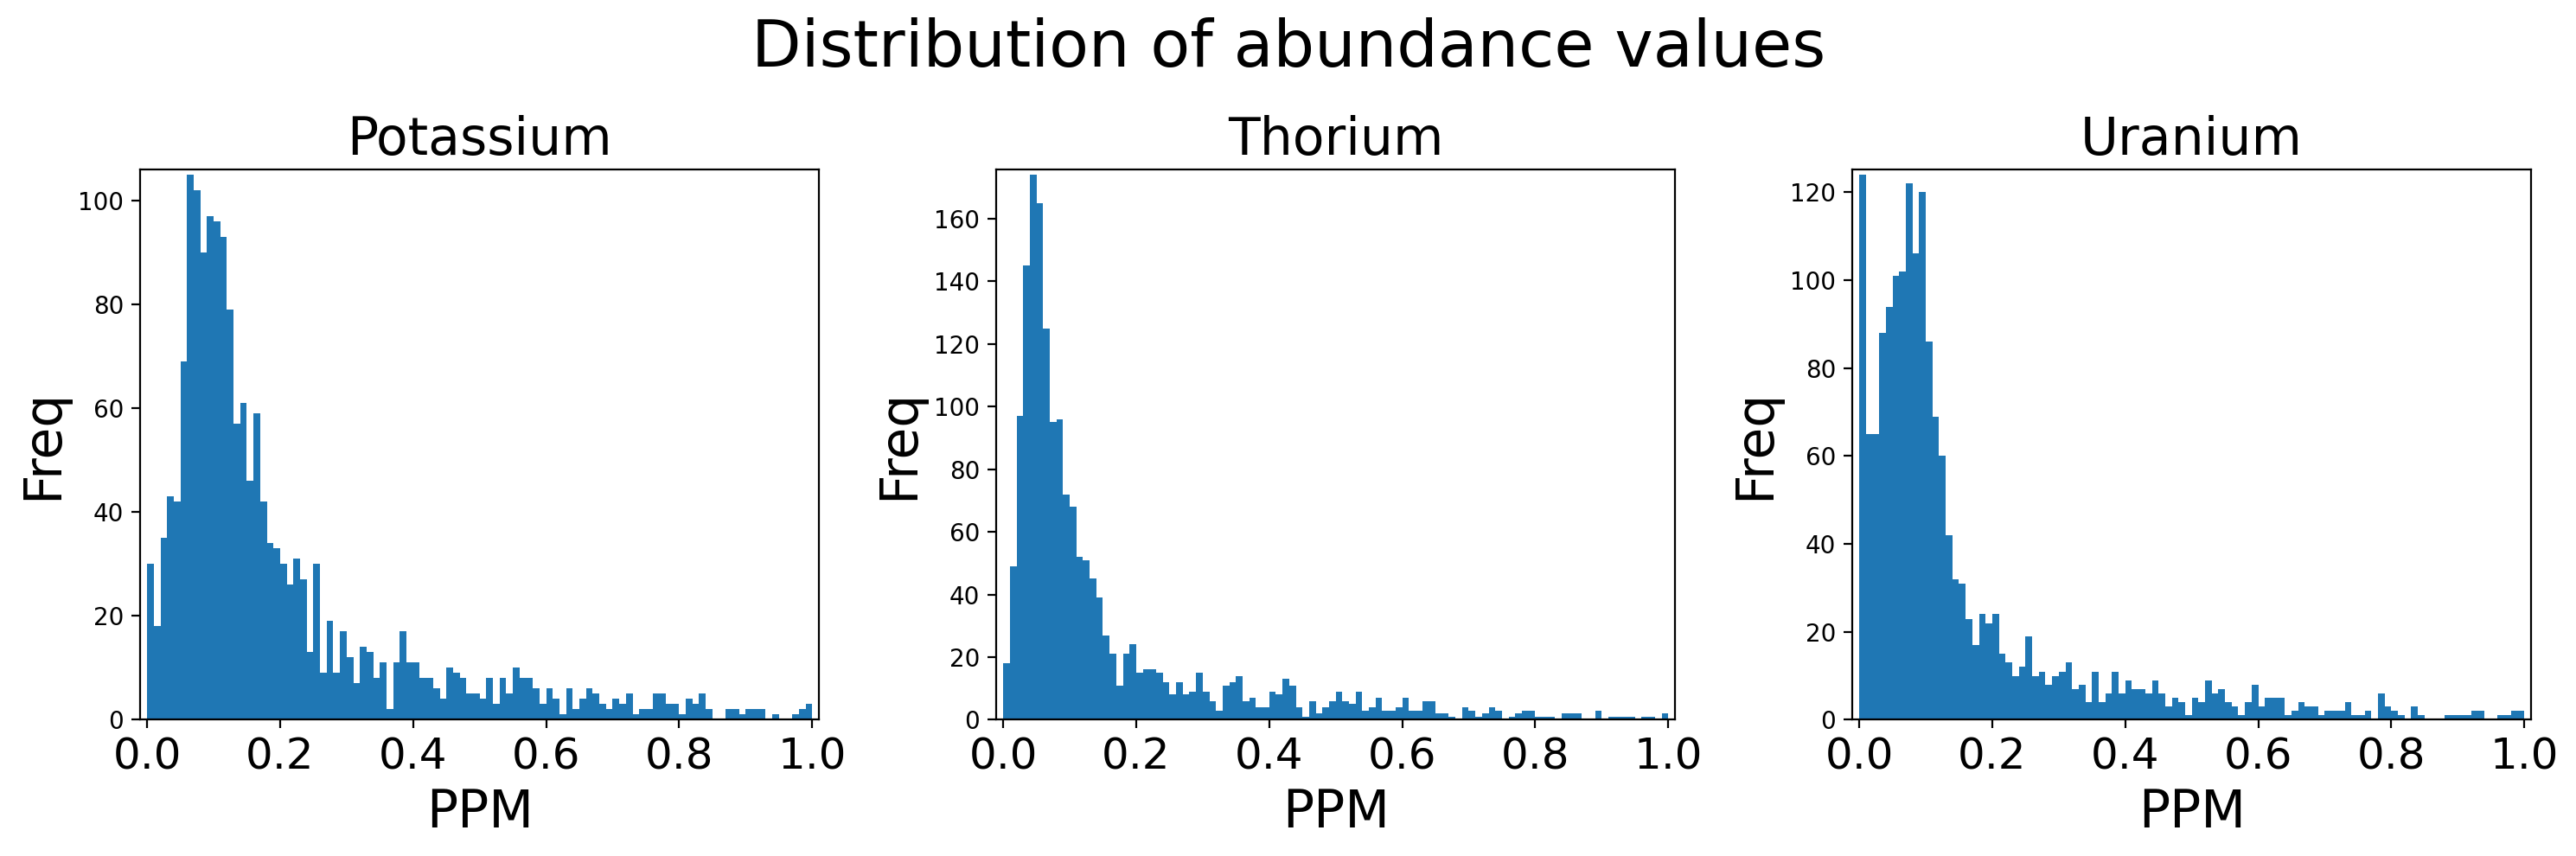

In [22]:
#create a figure 
figure,axes=plt.subplots(nrows=1,
                         ncols=3,
                         figsize=(15,5),
                         dpi=200)
#iterate over all elements
for i in range(nuclearElementNames.shape[0]):
    #plot the histogram
    temp=axes[i].hist(nuclearElementalAbundances[:,i],
                      bins=noOfBinsForHistogram)
    #set the title of the figure
    axes[i].set_title(nuclearElementNames[i],fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[i].set_xlabel("PPM",fontsize=baseFontSize*1.2)
    axes[i].set_ylabel("Freq",fontsize=baseFontSize*1.2)
    #set the ticks and their label sizes
    axes[i].set_xticks(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                       labels=np.round(np.arange(np.amin(nuclearElementalAbundances[:,i]),
                                                 np.amax(nuclearElementalAbundances[:,i])+np.ptp(nuclearElementalAbundances[:,i])/noOfXticks,
                                                 np.ptp(nuclearElementalAbundances[:,i])/noOfXticks),
                                       2),
                       fontsize=baseFontSize)
    #set the margins
    axes[i].margins(0.01)
    
#add a title
figure.suptitle("Distribution of abundance values",
                fontsize=baseFontSize*1.5)
#adjust the layout
plt.tight_layout()

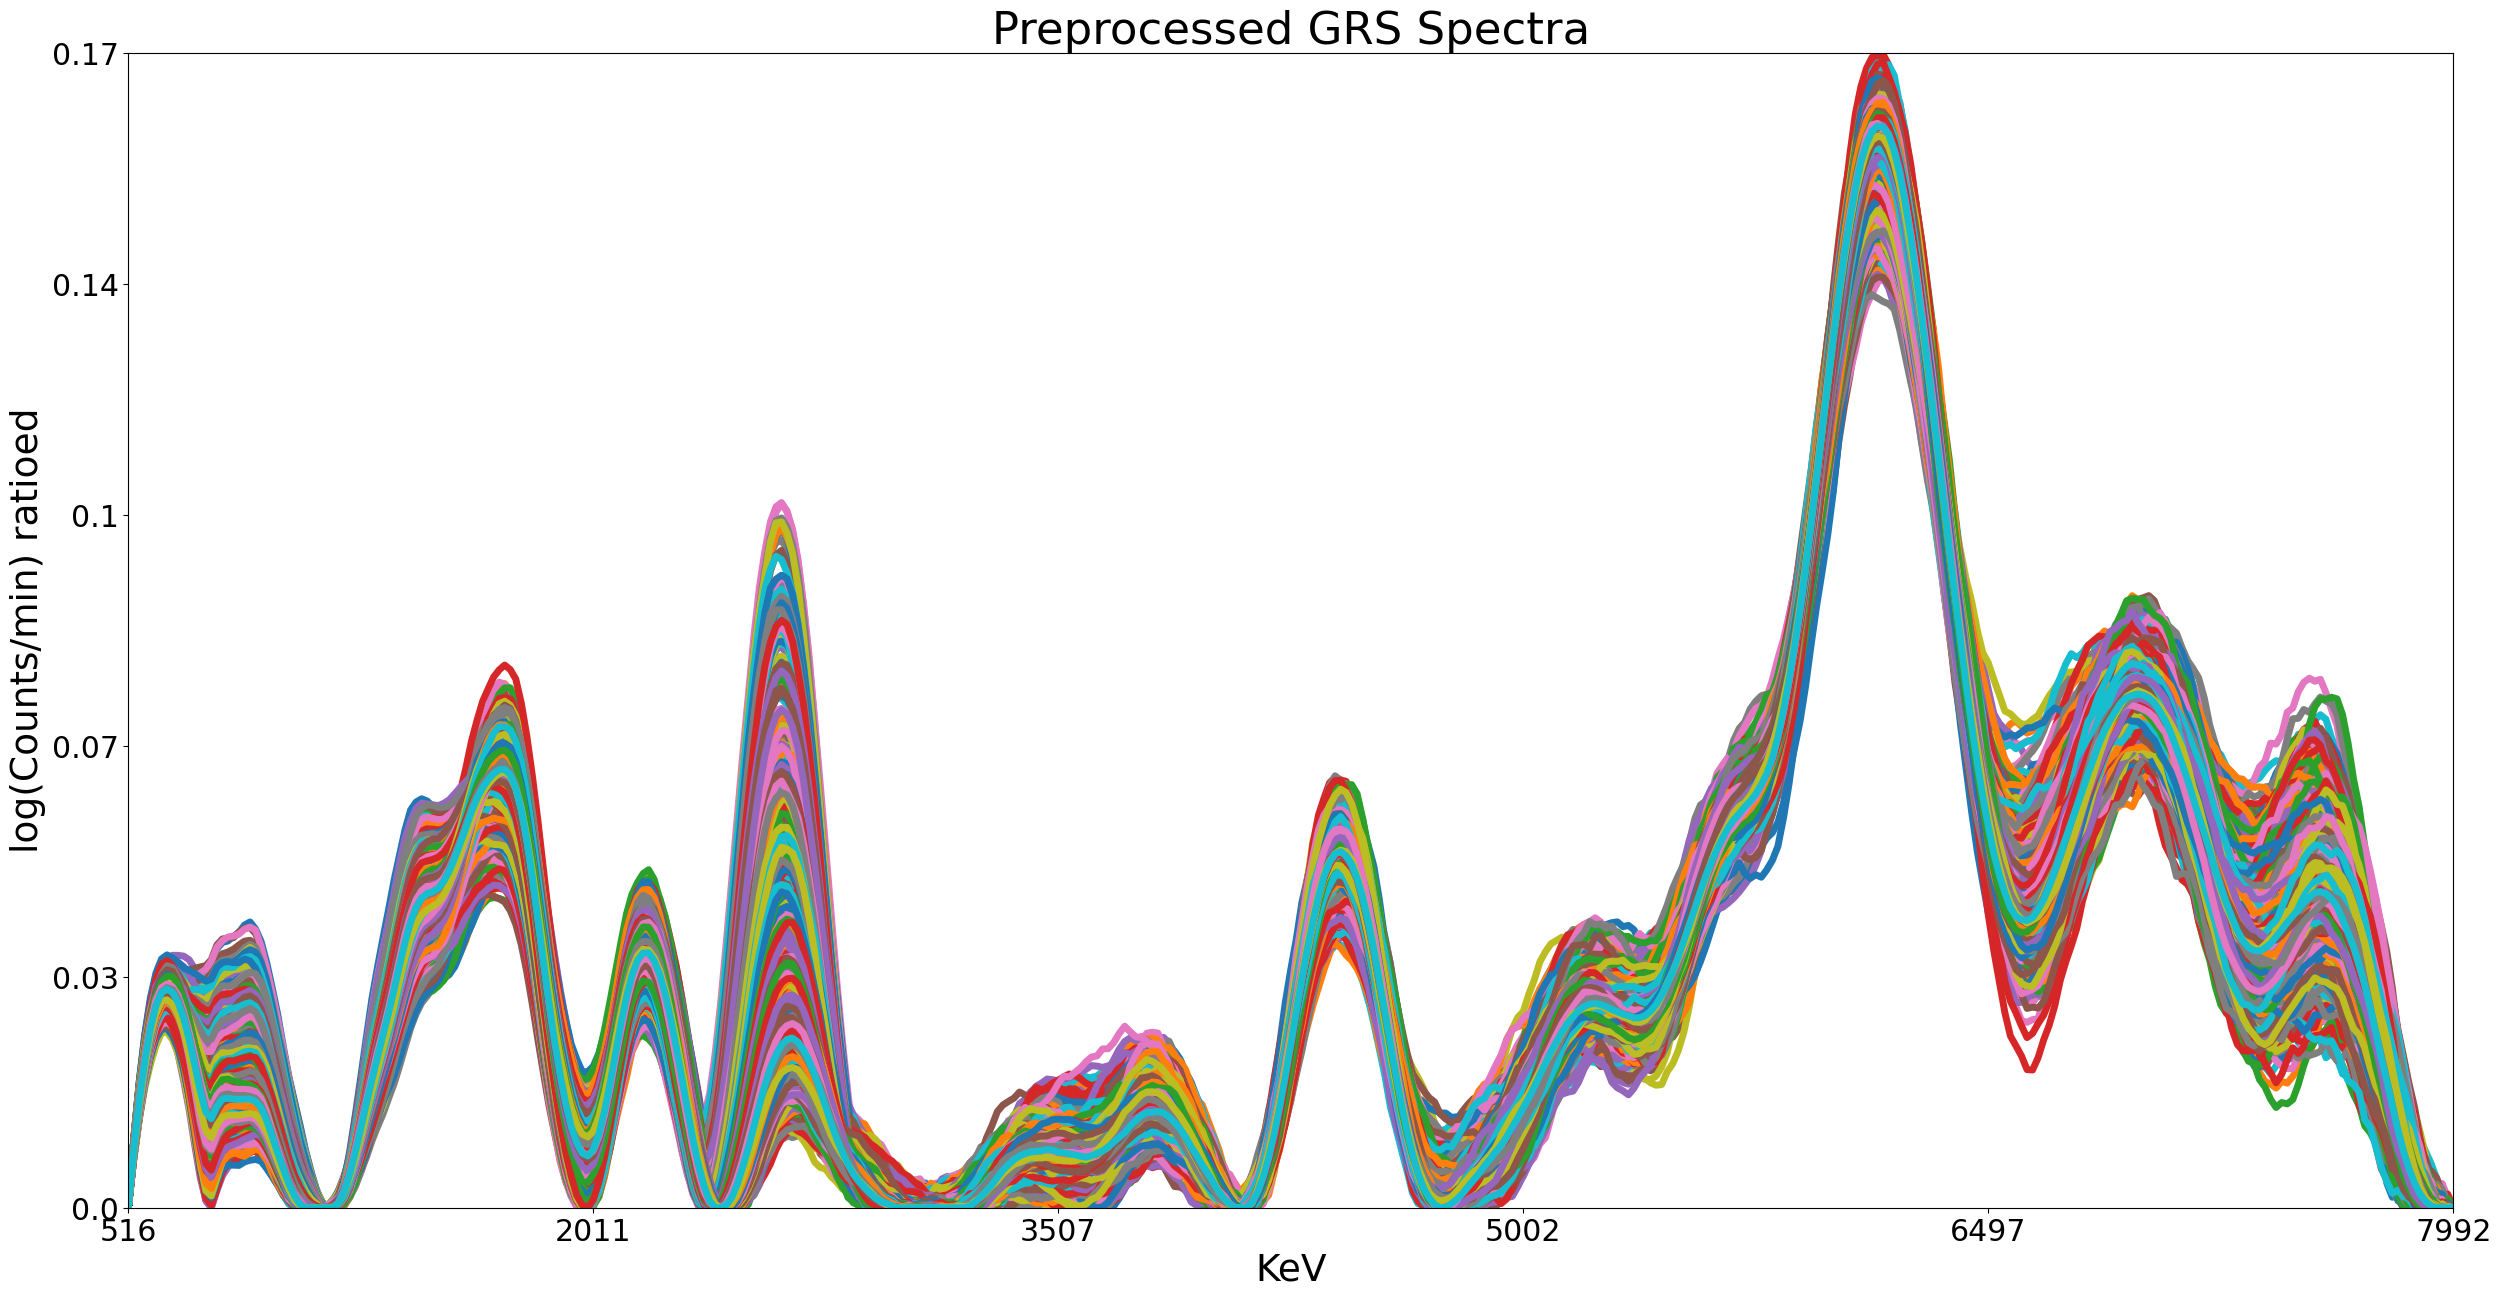

In [23]:
#create a figure
plt.figure(figsize=(30,15),
           dpi=100)
#and plot all the spectra
for i in range(preprocessedSpectra.shape[0]):
    plt.plot(relaventEnergyBands,
             preprocessedSpectra[i,:],
             lw=5)
#annotate the figure
plt.title("Preprocessed GRS Spectra",
          fontsize=baseFontSize*1.8)
plt.xticks(np.arange(np.amin(relaventEnergyBands),
                     np.amax(relaventEnergyBands)+np.ptp(relaventEnergyBands)/noOfXticks,
                     np.ptp(relaventEnergyBands)/noOfXticks),
           fontsize=baseFontSize*1.2)
plt.yticks(np.arange(np.amin(preprocessedSpectra),
                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                     np.ptp(preprocessedSpectra)/noOfXticks),
           labels=np.round(np.arange(np.amin(preprocessedSpectra),
                                     np.amax(preprocessedSpectra)+np.ptp(preprocessedSpectra)/noOfXticks,
                                     np.ptp(preprocessedSpectra)/noOfXticks),
                           2),
           fontsize=baseFontSize*1.2)
plt.xlabel("KeV",
           fontsize=baseFontSize*1.5)
plt.ylabel("log(Counts/min) ratioed",
           fontsize=baseFontSize*1.5)
plt.margins(0)

In [24]:
#import tensorflow
import tensorflow as tf

In [25]:
#set a global seed value
globalSeed=23

In [26]:
#load the pre-trained models
#define a funtion to calculate the Pearsons correlation between two sets of values
def pearson_correlation(x,y):
    x_mean=tf.reduce_mean(x)
    y_mean=tf.reduce_mean(y)
    x_diff=x-x_mean
    y_diff=y-y_mean
    covariance=tf.reduce_mean(tf.multiply(x_diff,y_diff))
    x_std=tf.sqrt(tf.reduce_mean(tf.square(x_diff)))
    y_std=tf.sqrt(tf.reduce_mean(tf.square(y_diff)))
    correlation=covariance/(x_std*y_std)
    return correlation

In [27]:
#compute the number of channels in the pre-processed spectra
noOfChannels=preprocessedSpectra.shape[1]

In [28]:
#create an input layer
inputLayer=tf.keras.Input(shape=(noOfChannels,
                                 1))

In [29]:
#create a function which given a feature volume, applies a single convolutional block to it
#the convolution block consists of
#Convolutional layer; Activation; Batch Normalization; Dropout
#the number of filters, their sizes, strideactivation function, and dropout rate are specified
def createConvolutionalBlock(inputVolume,noOfFilters,kernelSize,strideSize,activation,dropoutRate):
    #create a convolutional block
    convolutionalLayer=tf.keras.layers.Conv1D(filters=noOfFilters,
                                                   kernel_size=kernelSize,
                                                   strides=strideSize,
                                                   padding='valid')
    #add the 1st Conv layer to the graph
    volume=convolutionalLayer(inputVolume)

    #apply Relu activation
    reluActivation=tf.keras.layers.Activation(activation)
    #add the 1st activation layer to the graph
    volume=reluActivation(volume)

    #apply batch normalization
    batchNormalization=tf.keras.layers.BatchNormalization()
    #add the 1st batch-norm layer to the graph
    volume=batchNormalization(volume)

    #apply dropout
    dropoutLayer=tf.keras.layers.Dropout(0.5,
                                              noise_shape=None,
                                              seed=globalSeed)
    #add the 1st dropout layer to the graph
    volume=dropoutLayer(volume)
    
    return volume

In [30]:
#create a list containing the number of features to be outputted by each Conv block
noOfChannelsInEachConvBlock=[128,256,512,1024]
#create a list containing the sizes filter for each Conv block
filterSizesForEachConvBlock=[7,5,3,3]
#create a list containing the strides for each Conv block
strideSizesForEachConvBlock=[3,3,2,2]
#create a list containing the activation for each Conv block
activationForEachConvBlock=['relu','relu','relu','relu']
#create a list containing the dropout rate for each Conv block
dropoutForEachConvBlock=[0.5,0.5,0.5,0.5]

In [31]:
#create a NN (Neural Network) graph containing just the input layer
regularElementFeatures=inputLayer
nuclearElementFeatures=inputLayer

In [32]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    regularElementFeatures=createConvolutionalBlock(regularElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    activationForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {regularElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [33]:
#Flatten the features for the regular elemnents
regularElementFeatures=tf.keras.layers.Flatten()(regularElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [34]:
#add Convolutional blocks to create the feature extractor for regular elements

for i in range(len(noOfChannelsInEachConvBlock)):
    #create a convolutional block
    nuclearElementFeatures=createConvolutionalBlock(nuclearElementFeatures,
                                                    noOfChannelsInEachConvBlock[i],
                                                    filterSizesForEachConvBlock[i],
                                                    strideSizesForEachConvBlock[i],
                                                    activationForEachConvBlock[i],
                                                    dropoutForEachConvBlock[i])
    
    print(f"Shape of the tensor outputted by the 0th Conv. Block {nuclearElementFeatures.shape}")


Shape of the tensor outputted by the 0th Conv. Block (None, 139, 128)
Shape of the tensor outputted by the 0th Conv. Block (None, 45, 256)
Shape of the tensor outputted by the 0th Conv. Block (None, 22, 512)
Shape of the tensor outputted by the 0th Conv. Block (None, 10, 1024)


In [35]:
#Flatten the features for the nuclear elements
nuclearElementFeatures=tf.keras.layers.Flatten()(nuclearElementFeatures)
print(f"Shape of flattened features {regularElementFeatures.shape}")

Shape of flattened features (None, 10240)


In [36]:
#get the regular elements' abundances from the generated features
#it consists of three steps
#1. Apply a dense layer with 7 nodes without any activation
#2. Compute the absolute value of the values computed by dense layer
#3. Compute the l1-norm of the 7 regular elements and and divide them by it


In [37]:
#define a function which given the output of a layer, ensures the sum of the values is one
#it does this by computing the sum of the nodes and dividing each note by it
def estimateAbundances(inputNodes,name):
    sampleWiseSums=tf.keras.backend.sum(inputNodes,
                                        axis=-1,
                                        keepdims=True)
    sampleWiseSums=tf.repeat(sampleWiseSums,
                             sampleWiseSums.shape[-1],
                             axis=-1)
    return tf.math.divide(inputNodes,
                          sampleWiseSums+1e-10,
                          name=name)

In [38]:
#add a fully connected layer to the network (output layer)
regularElementStage1=tf.keras.layers.Dense(7,activation=None)(regularElementFeatures)
#compute absolute values
regularElementStage2=tf.math.abs(regularElementStage1)
#add a normalization layer to the network
regularAbundanceEmbedding=estimateAbundances(regularElementStage2,
                                             name="Regular_Abundances")


#print shape of abundances
print(f"Unscaled regular element shape {regularAbundanceEmbedding.shape}")


Unscaled regular element shape (None, 7)


In [39]:
#get the abundances for the nuclear elements from their features
nuclearElementStage1=tf.keras.layers.Dense(3,activation=None)(nuclearElementFeatures)
#compute absolute values
nuclearAbundanceEmbedding=tf.math.abs(nuclearElementStage1,name="Nuclear_Abundances")
#print shape of abundances
print(f"Unscaled regular element shape {nuclearAbundanceEmbedding.shape}")

Unscaled regular element shape (None, 3)


In [40]:
#concattenate the two abundances
fullAbundanceEmbedding=tf.concat([regularAbundanceEmbedding,nuclearAbundanceEmbedding],
                                 axis=-1)

print(f"All element shape {fullAbundanceEmbedding.shape}")

All element shape (None, 10)


In [41]:
#create the linear hidden layer as a combination of ten hidden layers each connected to a single abundance value
elementWiseHiddenLayers=[]
for i in range(fullAbundanceEmbedding.shape[-1]):
    temp=tf.keras.layers.Dense(noOfChannels,activation=None,use_bias=False)(tf.expand_dims(fullAbundanceEmbedding[:,i],-1))
    elementWiseHiddenLayers.append(tf.expand_dims(temp,-1))
    del temp
    print(f"Shape of the spectra outputed by {allElementNames[i]} {elementWiseHiddenLayers[-1].shape}")

Shape of the spectra outputed by Aluminum (None, 421, 1)
Shape of the spectra outputed by Calcium (None, 421, 1)
Shape of the spectra outputed by Iron (None, 421, 1)
Shape of the spectra outputed by Magnesium (None, 421, 1)
Shape of the spectra outputed by Oxygen (None, 421, 1)
Shape of the spectra outputed by Silicon (None, 421, 1)
Shape of the spectra outputed by Titanium (None, 421, 1)
Shape of the spectra outputed by Potassium (None, 421, 1)
Shape of the spectra outputed by Thorium (None, 421, 1)
Shape of the spectra outputed by Uranium (None, 421, 1)


In [42]:
#add the element wise spectra
linearMixedSpectra=tf.keras.backend.sum(tf.keras.layers.Concatenate(axis=-1)(elementWiseHiddenLayers),
                                        axis=-1,
                                        keepdims=False)
print(f"Shape of the linearly mixed spectra {linearMixedSpectra.shape}")

Shape of the linearly mixed spectra (None, 421)


In [43]:
#apply two dense layers to the network
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation='relu')(linearMixedSpectra)
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation='relu')(nnGraph)
nnGraph=tf.keras.layers.Dense(linearMixedSpectra.shape[-1],activation=None,name="Reconstruced_Spectra")(nnGraph)

In [44]:
#build the model
unmixingModel=tf.keras.Model(inputs=inputLayer,
                             outputs=[regularAbundanceEmbedding,
                                      nuclearAbundanceEmbedding,
                                      nnGraph],
                             name="Dual_Encoder_Unmxing_Model")

In [45]:
#create the loss function for the embedding, Mean Squared Error
abundanceLossFunction=tf.keras.losses.MeanSquaredError()
#create the loss function for the reconstructed spectra, Cosine loss
recontructedSpectraLoss=tf.keras.losses.CosineSimilarity()
#create the optimizer
optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
#set the number of epochs the model is to be trained for
noOfEpochs=2000
#set the batch size
batchSize=32
#define cosine similarity as a metric

In [46]:
#compile the model
unmixingModel.compile(optimizer=optimizer,
                      loss=[abundanceLossFunction,abundanceLossFunction,recontructedSpectraLoss],
                      loss_weights=[0.01,1,1e-5], #for next experiment 0.01,1,1e-4
                      metrics=[[pearson_correlation],[pearson_correlation],['cosine_similarity']],
                      steps_per_execution=45)

In [47]:
#set the address where the untrained model will be saved
untrainedModelAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/untrained_Dual_Unmixing_Model.h5"

In [48]:
#save the untrained model
tf.keras.models.save_model(unmixingModel,
                           untrainedModelAddress,
                           overwrite=True)

In [49]:
#import KFold from sklearn, to be used for KFold validation
from sklearn.model_selection import KFold

In [50]:
#set no. of folds over which the model is to be validated
noOfFolds=5

In [51]:
#create a K-Fold splitter
splitter=KFold(n_splits=noOfFolds,
               shuffle=True,
               random_state=globalSeed)

In [52]:
#check if the GPU is available
if len(tf.config.list_physical_devices('GPU'))==1:
    print("GPU available")
else:
    print("GPU unavailable")

GPU available


In [53]:
#create a list to hold model training history
modelTrainingHistories=[]
#create a list to store the trained models
trainedModels=[]

In [54]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #print the current fold number
    print(f"Starting processing fold {i+1}")
    
    #load the untrained model
    unmixingModel=tf.keras.models.load_model(untrainedModelAddress,
                                                  compile=False)
    
    #compile the model
    unmixingModel.compile(optimizer=optimizer,
                          loss=[abundanceLossFunction,
                                abundanceLossFunction,
                                recontructedSpectraLoss],
                          loss_weights=[0.01,1,1e-5], #for next experiment 0.01,1,1e-4
                          metrics=[[pearson_correlation],
                                   [pearson_correlation],
                                   ['cosine_similarity']],
                          steps_per_execution=45)
    
    #fit the model to the current fold's data
    currentModelTrainingHistory=unmixingModel.fit(x=preprocessedSpectra[trainingIndices,:],
                                                            y=[regularElementalAbundances[trainingIndices,:],
                                                               nuclearElementalAbundances[trainingIndices,:],
                                                               preprocessedSpectra[trainingIndices,:]],
                                                            batch_size=batchSize,
                                                            epochs=noOfEpochs,
                                                            validation_data=(preprocessedSpectra[testingIndices,:],
                                                                             [regularElementalAbundances[testingIndices,:],
                                                                              nuclearElementalAbundances[testingIndices,:],
                                                                              preprocessedSpectra[testingIndices,:]]),
                                                            validation_freq=1)
                                                            
    
    #save the training history of the current model
    modelTrainingHistories.append(currentModelTrainingHistory)
    
    
    '''
    #set the address where the trained model from the current 
    currentFoldTrainedModelAddress="C:/ML4Sci/Ml4Sci_GRS_abundance_estimation/Models/trained_dual_unmixing_model for "+str(i+1)+"th fold.h5"
    
    #save the untrained model
    tf.keras.models.save_model(unmixingModel,
                               currentFoldTrainedModelAddress,
                               overwrite=True)
                               '''
    
    #save the trained model
    trainedModels.append(unmixingModel)
    

Starting processing fold 1
Epoch 1/2000
45/45 [==============================] - 13s 291ms/step - loss: 3.2493 - tf.math.divide_loss: 0.0090 - tf.math.abs_1_loss: 3.2492 - Reconstruced_Spectra_loss: 0.0160 - tf.math.divide_pearson_correlation: 0.7426 - tf.math.abs_1_pearson_correlation: 0.0162 - Reconstruced_Spectra_cosine_similarity: -0.0160 - val_loss: 0.0524 - val_tf.math.divide_loss: 0.0118 - val_tf.math.abs_1_loss: 0.0523 - val_Reconstruced_Spectra_loss: -0.0701 - val_tf.math.divide_pearson_correlation: 0.6445 - val_tf.math.abs_1_pearson_correlation: -0.1554 - val_Reconstruced_Spectra_cosine_similarity: 0.0701
Epoch 2/2000
45/45 [==============================] - 2s 46ms/step - loss: 2.8555 - tf.math.divide_loss: 0.0030 - tf.math.abs_1_loss: 2.8554 - Reconstruced_Spectra_loss: -0.1691 - tf.math.divide_pearson_correlation: 0.9231 - tf.math.abs_1_pearson_correlation: -0.0277 - Reconstruced_Spectra_cosine_similarity: 0.1691 - val_loss: 0.0681 - val_tf.math.divide_loss: 0.0079 - val_t

Epoch 15/2000
45/45 [==============================] - 2s 47ms/step - loss: 1.0018 - tf.math.divide_loss: 5.9975e-04 - tf.math.abs_1_loss: 1.0018 - Reconstruced_Spectra_loss: -0.9811 - tf.math.divide_pearson_correlation: 0.9842 - tf.math.abs_1_pearson_correlation: -0.0110 - Reconstruced_Spectra_cosine_similarity: 0.9811 - val_loss: 0.0694 - val_tf.math.divide_loss: 3.5636e-04 - val_tf.math.abs_1_loss: 0.0694 - val_Reconstruced_Spectra_loss: -0.9795 - val_tf.math.divide_pearson_correlation: 0.9918 - val_tf.math.abs_1_pearson_correlation: -0.1124 - val_Reconstruced_Spectra_cosine_similarity: 0.9795
Epoch 16/2000
45/45 [==============================] - 2s 47ms/step - loss: 0.9404 - tf.math.divide_loss: 5.6501e-04 - tf.math.abs_1_loss: 0.9404 - Reconstruced_Spectra_loss: -0.9831 - tf.math.divide_pearson_correlation: 0.9851 - tf.math.abs_1_pearson_correlation: -0.0093 - Reconstruced_Spectra_cosine_similarity: 0.9831 - val_loss: 0.0644 - val_tf.math.divide_loss: 3.0078e-04 - val_tf.math.abs

Epoch 29/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.3646 - tf.math.divide_loss: 3.7100e-04 - tf.math.abs_1_loss: 0.3646 - Reconstruced_Spectra_loss: -0.9910 - tf.math.divide_pearson_correlation: 0.9902 - tf.math.abs_1_pearson_correlation: -0.0226 - Reconstruced_Spectra_cosine_similarity: 0.9910 - val_loss: 0.0499 - val_tf.math.divide_loss: 2.1420e-04 - val_tf.math.abs_1_loss: 0.0499 - val_Reconstruced_Spectra_loss: -0.9759 - val_tf.math.divide_pearson_correlation: 0.9945 - val_tf.math.abs_1_pearson_correlation: -0.0471 - val_Reconstruced_Spectra_cosine_similarity: 0.9759
Epoch 30/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.3411 - tf.math.divide_loss: 3.5798e-04 - tf.math.abs_1_loss: 0.3411 - Reconstruced_Spectra_loss: -0.9913 - tf.math.divide_pearson_correlation: 0.9906 - tf.math.abs_1_pearson_correlation: 0.0022 - Reconstruced_Spectra_cosine_similarity: 0.9913 - val_loss: 0.0479 - val_tf.math.divide_loss: 2.1707e-04 - val_tf.math.abs_

Epoch 43/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.1669 - tf.math.divide_loss: 2.9399e-04 - tf.math.abs_1_loss: 0.1669 - Reconstruced_Spectra_loss: -0.9930 - tf.math.divide_pearson_correlation: 0.9923 - tf.math.abs_1_pearson_correlation: 0.0139 - Reconstruced_Spectra_cosine_similarity: 0.9930 - val_loss: 0.0498 - val_tf.math.divide_loss: 2.0664e-04 - val_tf.math.abs_1_loss: 0.0498 - val_Reconstruced_Spectra_loss: -0.9848 - val_tf.math.divide_pearson_correlation: 0.9948 - val_tf.math.abs_1_pearson_correlation: 0.3529 - val_Reconstruced_Spectra_cosine_similarity: 0.9848
Epoch 44/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.1614 - tf.math.divide_loss: 2.8973e-04 - tf.math.abs_1_loss: 0.1614 - Reconstruced_Spectra_loss: -0.9931 - tf.math.divide_pearson_correlation: 0.9924 - tf.math.abs_1_pearson_correlation: -0.0117 - Reconstruced_Spectra_cosine_similarity: 0.9931 - val_loss: 0.0493 - val_tf.math.divide_loss: 2.0553e-04 - val_tf.math.abs_1

Epoch 57/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.1067 - tf.math.divide_loss: 2.5940e-04 - tf.math.abs_1_loss: 0.1068 - Reconstruced_Spectra_loss: -0.9938 - tf.math.divide_pearson_correlation: 0.9932 - tf.math.abs_1_pearson_correlation: 0.0279 - Reconstruced_Spectra_cosine_similarity: 0.9938 - val_loss: 0.0561 - val_tf.math.divide_loss: 1.8309e-04 - val_tf.math.abs_1_loss: 0.0561 - val_Reconstruced_Spectra_loss: -0.9879 - val_tf.math.divide_pearson_correlation: 0.9953 - val_tf.math.abs_1_pearson_correlation: 0.1457 - val_Reconstruced_Spectra_cosine_similarity: 0.9879
Epoch 58/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.1035 - tf.math.divide_loss: 2.5206e-04 - tf.math.abs_1_loss: 0.1036 - Reconstruced_Spectra_loss: -0.9938 - tf.math.divide_pearson_correlation: 0.9934 - tf.math.abs_1_pearson_correlation: 0.0063 - Reconstruced_Spectra_cosine_similarity: 0.9938 - val_loss: 0.0445 - val_tf.math.divide_loss: 1.8257e-04 - val_tf.math.abs_1_

Epoch 71/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0747 - tf.math.divide_loss: 2.3278e-04 - tf.math.abs_1_loss: 0.0747 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9939 - tf.math.abs_1_pearson_correlation: 0.1218 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0365 - val_tf.math.divide_loss: 1.7705e-04 - val_tf.math.abs_1_loss: 0.0365 - val_Reconstruced_Spectra_loss: -0.9921 - val_tf.math.divide_pearson_correlation: 0.9955 - val_tf.math.abs_1_pearson_correlation: 0.5083 - val_Reconstruced_Spectra_cosine_similarity: 0.9921
Epoch 72/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0697 - tf.math.divide_loss: 2.2944e-04 - tf.math.abs_1_loss: 0.0697 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.1522 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0305 - val_tf.math.divide_loss: 1.7674e-04 - val_tf.math.abs_1_

Epoch 85/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0564 - tf.math.divide_loss: 2.1300e-04 - tf.math.abs_1_loss: 0.0564 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.2536 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0328 - val_tf.math.divide_loss: 1.7342e-04 - val_tf.math.abs_1_loss: 0.0328 - val_Reconstruced_Spectra_loss: -0.9928 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.6074 - val_Reconstruced_Spectra_cosine_similarity: 0.9928
Epoch 86/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0605 - tf.math.divide_loss: 2.1140e-04 - tf.math.abs_1_loss: 0.0605 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.2212 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0363 - val_tf.math.divide_loss: 1.6820e-04 - val_tf.math.abs_1_

Epoch 99/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0430 - tf.math.divide_loss: 1.9854e-04 - tf.math.abs_1_loss: 0.0430 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.3584 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0302 - val_tf.math.divide_loss: 1.6786e-04 - val_tf.math.abs_1_loss: 0.0302 - val_Reconstruced_Spectra_loss: -0.9930 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.5289 - val_Reconstruced_Spectra_cosine_similarity: 0.9930
Epoch 100/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0441 - tf.math.divide_loss: 2.0146e-04 - tf.math.abs_1_loss: 0.0441 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.3656 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0293 - val_tf.math.divide_loss: 1.6715e-04 - val_tf.math.abs_1

Epoch 113/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0359 - tf.math.divide_loss: 1.9459e-04 - tf.math.abs_1_loss: 0.0359 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.4754 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0214 - val_tf.math.divide_loss: 1.6121e-04 - val_tf.math.abs_1_loss: 0.0215 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.3543 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 114/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0341 - tf.math.divide_loss: 1.9213e-04 - tf.math.abs_1_loss: 0.0341 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.4900 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0246 - val_tf.math.divide_loss: 1.6075e-04 - val_tf.math.abs_

Epoch 127/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0248 - tf.math.divide_loss: 1.7941e-04 - tf.math.abs_1_loss: 0.0249 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.6149 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0157 - val_tf.math.divide_loss: 1.6251e-04 - val_tf.math.abs_1_loss: 0.0157 - val_Reconstruced_Spectra_loss: -0.9948 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.4728 - val_Reconstruced_Spectra_cosine_similarity: 0.9948
Epoch 128/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0262 - tf.math.divide_loss: 1.8423e-04 - tf.math.abs_1_loss: 0.0262 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.6045 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0091 - val_tf.math.divide_loss: 1.6194e-04 - val_tf.math.abs_

Epoch 141/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0221 - tf.math.divide_loss: 1.7614e-04 - tf.math.abs_1_loss: 0.0221 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.6444 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0089 - val_tf.math.divide_loss: 1.5726e-04 - val_tf.math.abs_1_loss: 0.0089 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.6804 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 142/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0212 - tf.math.divide_loss: 1.7605e-04 - tf.math.abs_1_loss: 0.0213 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.6623 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0120 - val_tf.math.divide_loss: 1.5715e-04 - val_tf.math.abs_

Epoch 155/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0169 - tf.math.divide_loss: 1.7095e-04 - tf.math.abs_1_loss: 0.0169 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7230 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0112 - val_tf.math.divide_loss: 1.5832e-04 - val_tf.math.abs_1_loss: 0.0112 - val_Reconstruced_Spectra_loss: -0.9957 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.5393 - val_Reconstruced_Spectra_cosine_similarity: 0.9957
Epoch 156/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.0158 - tf.math.divide_loss: 1.7056e-04 - tf.math.abs_1_loss: 0.0159 - Reconstruced_Spectra_loss: -0.9960 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7428 - Reconstruced_Spectra_cosine_similarity: 0.9960 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.5341e-04 - val_tf.math.abs_

Epoch 169/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0128 - tf.math.divide_loss: 1.6474e-04 - tf.math.abs_1_loss: 0.0128 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.7793 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0089 - val_tf.math.divide_loss: 1.5452e-04 - val_tf.math.abs_1_loss: 0.0089 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.6890 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 170/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0124 - tf.math.divide_loss: 1.6684e-04 - tf.math.abs_1_loss: 0.0124 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7724 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0099 - val_tf.math.divide_loss: 1.5182e-04 - val_tf.math.abs_

Epoch 183/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0113 - tf.math.divide_loss: 1.6356e-04 - tf.math.abs_1_loss: 0.0113 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8024 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.4948e-04 - val_tf.math.abs_1_loss: 0.0068 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.6468 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 184/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0104 - tf.math.divide_loss: 1.6132e-04 - tf.math.abs_1_loss: 0.0104 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8141 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0078 - val_tf.math.divide_loss: 1.4950e-04 - val_tf.math.abs_

Epoch 197/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0100 - tf.math.divide_loss: 1.5838e-04 - tf.math.abs_1_loss: 0.0101 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8336 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.5256e-04 - val_tf.math.abs_1_loss: 0.0063 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.8775 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 198/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0094 - tf.math.divide_loss: 1.5735e-04 - tf.math.abs_1_loss: 0.0094 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8394 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.4876e-04 - val_tf.math.abs_

Epoch 211/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0073 - tf.math.divide_loss: 1.5595e-04 - tf.math.abs_1_loss: 0.0073 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8748 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.4861e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9292 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 212/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0074 - tf.math.divide_loss: 1.5890e-04 - tf.math.abs_1_loss: 0.0074 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8731 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.4553e-04 - val_tf.math.abs_

Epoch 225/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0068 - tf.math.divide_loss: 1.5323e-04 - tf.math.abs_1_loss: 0.0069 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8680 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.4825e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.9540 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 226/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0079 - tf.math.divide_loss: 1.5532e-04 - tf.math.abs_1_loss: 0.0079 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8704 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.4395e-04 - val_tf.math.abs_

Epoch 239/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5330e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8901 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.4599e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9114 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 240/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5247e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8944 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.4510e-04 - val_tf.math.abs_

Epoch 253/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0069 - tf.math.divide_loss: 1.5079e-04 - tf.math.abs_1_loss: 0.0069 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8940 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4249e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9420 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 254/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4814e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9026 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.4255e-04 - val_tf.math.abs_

Epoch 267/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0059 - tf.math.divide_loss: 1.4927e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8989 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.4152e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9577 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 268/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0059 - tf.math.divide_loss: 1.5034e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8952 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4229e-04 - val_tf.math.abs_

Epoch 281/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0061 - tf.math.divide_loss: 1.4914e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8979 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.4211e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.7922 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 282/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0053 - tf.math.divide_loss: 1.4651e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9029 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.4198e-04 - val_tf.math.abs_

Epoch 295/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4648e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8932 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.4080e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8965 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 296/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4602e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9137 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.4302e-04 - val_tf.math.abs_

Epoch 309/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4801e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9062 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.4130e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9209 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 310/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0062 - tf.math.divide_loss: 1.4499e-04 - tf.math.abs_1_loss: 0.0062 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.8978 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3939e-04 - val_tf.math.abs_

Epoch 323/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0061 - tf.math.divide_loss: 1.4469e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9026 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4011e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9001 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 324/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4405e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9085 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3989e-04 - val_tf.math.abs_

Epoch 337/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4359e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9170 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3798e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8811 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 338/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0062 - tf.math.divide_loss: 1.4504e-04 - tf.math.abs_1_loss: 0.0062 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.8997 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3719e-04 - val_tf.math.abs_

Epoch 351/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0063 - tf.math.divide_loss: 1.4177e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.8953 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.3616e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8657 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 352/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4262e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9019 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3820e-04 - val_tf.math.abs_

Epoch 365/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4276e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9184 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3785e-04 - val_tf.math.abs_1_loss: 0.0049 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8550 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 366/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4133e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9115 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3525e-04 - val_tf.math.abs_

Epoch 379/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0052 - tf.math.divide_loss: 1.4325e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9113 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3558e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9614 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 380/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4121e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9124 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3646e-04 - val_tf.math.abs_

Epoch 393/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0086 - tf.math.divide_loss: 1.3980e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.8598 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3448e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9623 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 394/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0063 - tf.math.divide_loss: 1.4041e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.8767 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3589e-04 - val_tf.math.abs_

Epoch 407/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3993e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9183 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3649e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9574 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 408/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0059 - tf.math.divide_loss: 1.3753e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8987 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3653e-04 - val_tf.math.abs_

Epoch 421/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0069 - tf.math.divide_loss: 1.3647e-04 - tf.math.abs_1_loss: 0.0069 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8916 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3517e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9541 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 422/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0071 - tf.math.divide_loss: 1.3772e-04 - tf.math.abs_1_loss: 0.0071 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8741 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3467e-04 - val_tf.math.abs_

Epoch 435/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0076 - tf.math.divide_loss: 1.4042e-04 - tf.math.abs_1_loss: 0.0076 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.8849 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3332e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9313 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 436/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0075 - tf.math.divide_loss: 1.3876e-04 - tf.math.abs_1_loss: 0.0075 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.8684 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3332e-04 - val_tf.math.abs_

Epoch 449/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0065 - tf.math.divide_loss: 1.4014e-04 - tf.math.abs_1_loss: 0.0065 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.8898 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3469e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9438 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 450/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0065 - tf.math.divide_loss: 1.3829e-04 - tf.math.abs_1_loss: 0.0065 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8959 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.3141e-04 - val_tf.math.abs_

Epoch 463/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0076 - tf.math.divide_loss: 1.3723e-04 - tf.math.abs_1_loss: 0.0076 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8741 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3432e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9428 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 464/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0070 - tf.math.divide_loss: 1.3952e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.8871 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3338e-04 - val_tf.math.abs_

Epoch 477/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0069 - tf.math.divide_loss: 1.3574e-04 - tf.math.abs_1_loss: 0.0069 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8770 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3318e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9684 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 478/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0061 - tf.math.divide_loss: 1.3750e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8965 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.3209e-04 - val_tf.math.abs_

Epoch 491/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0100 - tf.math.divide_loss: 1.3813e-04 - tf.math.abs_1_loss: 0.0101 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8290 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3133e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9600 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 492/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0060 - tf.math.divide_loss: 1.3537e-04 - tf.math.abs_1_loss: 0.0060 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8966 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.3401e-04 - val_tf.math.abs_

Epoch 505/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0068 - tf.math.divide_loss: 1.3575e-04 - tf.math.abs_1_loss: 0.0068 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8876 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3137e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9575 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 506/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0071 - tf.math.divide_loss: 1.3864e-04 - tf.math.abs_1_loss: 0.0071 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8825 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.3119e-04 - val_tf.math.abs_

Epoch 519/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0067 - tf.math.divide_loss: 1.3709e-04 - tf.math.abs_1_loss: 0.0067 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8912 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3094e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9628 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 520/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0088 - tf.math.divide_loss: 1.3545e-04 - tf.math.abs_1_loss: 0.0088 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8391 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.3246e-04 - val_tf.math.abs_

Epoch 533/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0062 - tf.math.divide_loss: 1.3553e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8933 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3553e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9653 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 534/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0059 - tf.math.divide_loss: 1.3497e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8943 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.3160e-04 - val_tf.math.abs_

Epoch 547/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0090 - tf.math.divide_loss: 1.3457e-04 - tf.math.abs_1_loss: 0.0090 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8533 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.3218e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9688 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 548/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0088 - tf.math.divide_loss: 1.3420e-04 - tf.math.abs_1_loss: 0.0088 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8553 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3327e-04 - val_tf.math.abs_

Epoch 561/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0063 - tf.math.divide_loss: 1.3403e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8801 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2887e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9632 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 562/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0067 - tf.math.divide_loss: 1.3505e-04 - tf.math.abs_1_loss: 0.0067 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8771 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2908e-04 - val_tf.math.abs_

Epoch 575/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0075 - tf.math.divide_loss: 1.3351e-04 - tf.math.abs_1_loss: 0.0075 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8783 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.3303e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9654 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 576/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0069 - tf.math.divide_loss: 1.3497e-04 - tf.math.abs_1_loss: 0.0069 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.8834 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2901e-04 - val_tf.math.abs_

Epoch 589/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0056 - tf.math.divide_loss: 1.3402e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8873 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2909e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9639 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 590/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0049 - tf.math.divide_loss: 1.3256e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9151 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2936e-04 - val_tf.math.abs_

Epoch 603/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0070 - tf.math.divide_loss: 1.3324e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8816 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.3162e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9691 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 604/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0058 - tf.math.divide_loss: 1.3243e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8924 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2846e-04 - val_tf.math.abs_

Epoch 617/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0053 - tf.math.divide_loss: 1.3249e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9071 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2944e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9680 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 618/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0082 - tf.math.divide_loss: 1.3350e-04 - tf.math.abs_1_loss: 0.0082 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8591 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2996e-04 - val_tf.math.abs_

Epoch 631/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0051 - tf.math.divide_loss: 1.3491e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9073 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2891e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9694 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 632/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0062 - tf.math.divide_loss: 1.3395e-04 - tf.math.abs_1_loss: 0.0062 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8924 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.3008e-04 - val_tf.math.abs_

Epoch 645/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0052 - tf.math.divide_loss: 1.3277e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9044 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2795e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9678 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 646/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0051 - tf.math.divide_loss: 1.3231e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9167 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.3025e-04 - val_tf.math.abs_

Epoch 659/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0083 - tf.math.divide_loss: 1.3193e-04 - tf.math.abs_1_loss: 0.0083 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8607 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2847e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9659 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 660/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0078 - tf.math.divide_loss: 1.3310e-04 - tf.math.abs_1_loss: 0.0078 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8653 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2702e-04 - val_tf.math.abs_

Epoch 673/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3299e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9138 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2692e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9669 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 674/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3335e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9131 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3006e-04 - val_tf.math.abs_

Epoch 687/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3258e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9201 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2792e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9671 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 688/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0077 - tf.math.divide_loss: 1.3460e-04 - tf.math.abs_1_loss: 0.0077 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8641 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2630e-04 - val_tf.math.abs_

Epoch 701/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0050 - tf.math.divide_loss: 1.3213e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9127 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2660e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9652 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 702/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0071 - tf.math.divide_loss: 1.2868e-04 - tf.math.abs_1_loss: 0.0071 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.8817 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2970e-04 - val_tf.math.abs_

Epoch 715/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0055 - tf.math.divide_loss: 1.3067e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9002 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2744e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9672 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 716/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0054 - tf.math.divide_loss: 1.3371e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9084 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2793e-04 - val_tf.math.abs_

Epoch 729/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0058 - tf.math.divide_loss: 1.3143e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8905 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2737e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9669 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 730/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0053 - tf.math.divide_loss: 1.3079e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.8992 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2733e-04 - val_tf.math.abs_

Epoch 743/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0063 - tf.math.divide_loss: 1.3063e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9000 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2628e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9671 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 744/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3241e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9259 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2648e-04 - val_tf.math.abs_

Epoch 757/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0046 - tf.math.divide_loss: 1.2977e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9112 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2743e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9702 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 758/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3086e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9233 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2770e-04 - val_tf.math.abs_

Epoch 771/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3030e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9270 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2458e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9704 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 772/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3129e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9232 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2652e-04 - val_tf.math.abs_

Epoch 785/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0058 - tf.math.divide_loss: 1.3350e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8905 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2631e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9694 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 786/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0063 - tf.math.divide_loss: 1.2923e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.8872 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2725e-04 - val_tf.math.abs_

Epoch 799/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0048 - tf.math.divide_loss: 1.2941e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9174 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2646e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9595 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 800/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0051 - tf.math.divide_loss: 1.3131e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9196 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2868e-04 - val_tf.math.abs_

Epoch 813/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3183e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9230 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2750e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9680 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 814/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0054 - tf.math.divide_loss: 1.2964e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9010 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2827e-04 - val_tf.math.abs_

Epoch 827/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2837e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9159 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2612e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9696 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 828/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3176e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9282 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2683e-04 - val_tf.math.abs_

Epoch 841/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0052 - tf.math.divide_loss: 1.3008e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9133 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2758e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9682 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 842/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0050 - tf.math.divide_loss: 1.2692e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9163 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2775e-04 - val_tf.math.abs_

Epoch 855/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0054 - tf.math.divide_loss: 1.2974e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9099 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2735e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9689 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 856/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0051 - tf.math.divide_loss: 1.2994e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.8979 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2692e-04 - val_tf.math.abs_

Epoch 869/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.2490e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9303 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2571e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9693 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 870/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2644e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9353 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2476e-04 - val_tf.math.abs_

Epoch 883/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0049 - tf.math.divide_loss: 1.3012e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9039 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2548e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9703 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 884/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0054 - tf.math.divide_loss: 1.3009e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9039 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2620e-04 - val_tf.math.abs_

Epoch 897/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0052 - tf.math.divide_loss: 1.2939e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.8960 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2821e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9654 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 898/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0053 - tf.math.divide_loss: 1.2834e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9059 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2391e-04 - val_tf.math.abs_

Epoch 911/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0050 - tf.math.divide_loss: 1.2778e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9065 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2429e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9671 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 912/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.2872e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9235 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2548e-04 - val_tf.math.abs_

Epoch 925/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0043 - tf.math.divide_loss: 1.2904e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9249 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2478e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9690 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 926/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0045 - tf.math.divide_loss: 1.2985e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9235 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2393e-04 - val_tf.math.abs_

Epoch 939/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2748e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9314 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2756e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9688 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 940/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2764e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9335 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2472e-04 - val_tf.math.abs_

Epoch 953/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0047 - tf.math.divide_loss: 1.2747e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9091 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2605e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9713 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 954/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0048 - tf.math.divide_loss: 1.2835e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9078 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2375e-04 - val_tf.math.abs_

Epoch 967/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0042 - tf.math.divide_loss: 1.2964e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9303 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2320e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9705 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 968/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2746e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9213 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2269e-04 - val_tf.math.abs_

Epoch 981/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2715e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9167 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2447e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9700 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 982/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0053 - tf.math.divide_loss: 1.2804e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9074 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2504e-04 - val_tf.math.abs_

Epoch 995/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2868e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9333 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2425e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9705 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 996/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0054 - tf.math.divide_loss: 1.2716e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9090 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2392e-04 - val_tf.math.abs_

Epoch 1009/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0071 - tf.math.divide_loss: 1.2876e-04 - tf.math.abs_1_loss: 0.0071 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.8753 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2516e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9673 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1010/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0045 - tf.math.divide_loss: 1.2601e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9162 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2366e-04 - val_tf.math.ab

Epoch 1023/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2897e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9319 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2485e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9711 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1024/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0043 - tf.math.divide_loss: 1.2739e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9182 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2671e-04 - val_tf.math.ab

Epoch 1037/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2708e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9322 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2437e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9714 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1038/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2790e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9361 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2297e-04 - val_tf.math.ab

Epoch 1051/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.2758e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9212 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2469e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9626 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1052/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0044 - tf.math.divide_loss: 1.2844e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9193 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2483e-04 - val_tf.math.ab

Epoch 1065/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.2672e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9189 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2564e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9705 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1066/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2841e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9366 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2556e-04 - val_tf.math.ab

Epoch 1079/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0050 - tf.math.divide_loss: 1.2721e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9183 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2501e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9667 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1080/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0050 - tf.math.divide_loss: 1.2626e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9122 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2424e-04 - val_tf.math.ab

Epoch 1093/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2643e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9243 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2532e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9727 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1094/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2800e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2360e-04 - val_tf.math.ab

Epoch 1107/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2612e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9294 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2714e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9716 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1108/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2756e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9406 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2442e-04 - val_tf.math.ab

Epoch 1121/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2752e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9252 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2179e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9656 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1122/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2818e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9310 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2546e-04 - val_tf.math.ab

Epoch 1135/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2567e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9388 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2306e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9702 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1136/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2561e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9164 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2445e-04 - val_tf.math.ab

Epoch 1149/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2553e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9294 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2328e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9711 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1150/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2657e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9216 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2185e-04 - val_tf.math.ab

Epoch 1163/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2528e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9420 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2545e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9697 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1164/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2342e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9381 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2125e-04 - val_tf.math.ab

Epoch 1177/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2535e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9297 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2243e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9701 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1178/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2836e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9389 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2540e-04 - val_tf.math.ab

Epoch 1191/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2424e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9303 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2361e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9677 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1192/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2402e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9395 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2158e-04 - val_tf.math.ab

Epoch 1205/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2786e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9433 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2189e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9713 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1206/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2660e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9383 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2248e-04 - val_tf.math.ab

Epoch 1219/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2481e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9417 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2268e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9693 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1220/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2583e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9426 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2267e-04 - val_tf.math.ab

Epoch 1233/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0042 - tf.math.divide_loss: 1.2648e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9236 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2195e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9689 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1234/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2447e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9344 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2354e-04 - val_tf.math.ab

Epoch 1247/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2489e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9378 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2155e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9684 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1248/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2486e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9352 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2245e-04 - val_tf.math.ab

Epoch 1261/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2219e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9241 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2186e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9684 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1262/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2319e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9378 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2322e-04 - val_tf.math.ab

Epoch 1275/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2398e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9412 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2195e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9693 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1276/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2474e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9426 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2395e-04 - val_tf.math.ab

Epoch 1289/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2458e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9340 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2376e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9704 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1290/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2539e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9358 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2352e-04 - val_tf.math.ab

Epoch 1303/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2500e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9252 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2255e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9694 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1304/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2229e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2142e-04 - val_tf.math.ab

Epoch 1317/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2598e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9452 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2295e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9700 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1318/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2484e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9280 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2254e-04 - val_tf.math.ab

Epoch 1331/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2599e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9382 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2114e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9589 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1332/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2447e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9368 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2039e-04 - val_tf.math.ab

Epoch 1345/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2463e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9328 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2184e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9611 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1346/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2458e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9288 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2098e-04 - val_tf.math.ab

Epoch 1359/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2407e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9379 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2323e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9622 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1360/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2584e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9300 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2180e-04 - val_tf.math.ab

Epoch 1373/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2611e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9399 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2140e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9668 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1374/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2314e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9367 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2261e-04 - val_tf.math.ab

Epoch 1387/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0042 - tf.math.divide_loss: 1.2647e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9309 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2107e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9629 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1388/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0046 - tf.math.divide_loss: 1.2406e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9021 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2243e-04 - val_tf.math.ab

Epoch 1401/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2363e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9422 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2144e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9710 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1402/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2276e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9434 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2283e-04 - val_tf.math.ab

Epoch 1415/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2478e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9345 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2179e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9686 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1416/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2441e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9395 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2034e-04 - val_tf.math.ab

Epoch 1429/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2175e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9422 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2128e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9709 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1430/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2450e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9400 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2190e-04 - val_tf.math.ab

Epoch 1443/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2240e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9320 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2133e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9621 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1444/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2204e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9375 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2117e-04 - val_tf.math.ab

Epoch 1457/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2305e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9396 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2100e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9615 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1458/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2334e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9419 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2022e-04 - val_tf.math.ab

Epoch 1471/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2394e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9306 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2179e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9680 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1472/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2351e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9450 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2138e-04 - val_tf.math.ab

Epoch 1485/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2446e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9519 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2106e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9662 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1486/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2289e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9430 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2046e-04 - val_tf.math.ab

Epoch 1499/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2089e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9469 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2009e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9719 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1500/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2191e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9484 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2296e-04 - val_tf.math.ab

Epoch 1513/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2257e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9456 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2038e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9688 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1514/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2257e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9341 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2192e-04 - val_tf.math.ab

Epoch 1527/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2433e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9397 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2344e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9659 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1528/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2270e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9438 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2100e-04 - val_tf.math.ab

Epoch 1541/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2293e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9468 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1931e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9718 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1542/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2161e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9526 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2058e-04 - val_tf.math.ab

Epoch 1555/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2276e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9490 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1909e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9679 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1556/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2400e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9436 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2042e-04 - val_tf.math.ab

Epoch 1569/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2333e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9435 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2276e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9687 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1570/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2123e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9505 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1997e-04 - val_tf.math.ab

Epoch 1583/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2475e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9434 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2071e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9665 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1584/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2540e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9377 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2012e-04 - val_tf.math.ab

Epoch 1597/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2236e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9476 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1912e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9623 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1598/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2535e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9552 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1981e-04 - val_tf.math.ab

Epoch 1611/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2049e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1901e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9669 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1612/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2205e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9496 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2074e-04 - val_tf.math.ab

Epoch 1625/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2191e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9419 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2101e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9676 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1626/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2226e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9280 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2013e-04 - val_tf.math.ab

Epoch 1639/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2252e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9539 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1963e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9691 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1640/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2213e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9319 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2018e-04 - val_tf.math.ab

Epoch 1653/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2089e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2137e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9676 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1654/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2308e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9466 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2011e-04 - val_tf.math.ab

Epoch 1667/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2090e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9520 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1952e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9527 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1668/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2120e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9433 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2187e-04 - val_tf.math.ab

Epoch 1681/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2205e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9480 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1946e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9679 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1682/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2089e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9455 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2112e-04 - val_tf.math.ab

Epoch 1695/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2232e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9436 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1941e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9720 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1696/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2326e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9390 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1945e-04 - val_tf.math.ab

Epoch 1709/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2306e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9478 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1978e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9705 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1710/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2081e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9540 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2203e-04 - val_tf.math.ab

Epoch 1723/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2172e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9458 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2260e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9708 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1724/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2208e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9463 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1913e-04 - val_tf.math.ab

Epoch 1737/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2082e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9604 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2056e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9687 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1738/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2278e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9534 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1868e-04 - val_tf.math.ab

Epoch 1751/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2175e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9428 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1917e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9688 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1752/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1981e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9547 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2037e-04 - val_tf.math.ab

Epoch 1765/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2326e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9490 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1883e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9683 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1766/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2231e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9508 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1849e-04 - val_tf.math.ab

Epoch 1779/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2456e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9492 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2006e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9699 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1780/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2138e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9539 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1966e-04 - val_tf.math.ab

Epoch 1793/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2342e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9505 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1921e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9699 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1794/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2190e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9422 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1963e-04 - val_tf.math.ab

Epoch 1807/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2221e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9424 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2026e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9718 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1808/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2303e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9541 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1891e-04 - val_tf.math.ab

Epoch 1821/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2161e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9417 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1852e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9663 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1822/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2186e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9407 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1862e-04 - val_tf.math.ab

Epoch 1835/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0026 - tf.math.divide_loss: 1.1863e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9534 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1838e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9246 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1836/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2247e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9461 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1872e-04 - val_tf.math.ab

Epoch 1849/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2051e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9569 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1951e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9713 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1850/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1870e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9534 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1892e-04 - val_tf.math.ab

Epoch 1863/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2063e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9502 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2128e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9725 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1864/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2170e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9532 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1916e-04 - val_tf.math.ab

Epoch 1877/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2058e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1968e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9558 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1878/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2115e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9403 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2000e-04 - val_tf.math.ab

Epoch 1891/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.1957e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1885e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9705 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1892/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2334e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9421 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1898e-04 - val_tf.math.ab

Epoch 1905/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2300e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9418 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2351e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9725 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1906/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2346e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9535 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2188e-04 - val_tf.math.ab

Epoch 1919/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2024e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9584 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1806e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9722 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1920/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2109e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9555 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2025e-04 - val_tf.math.ab

Epoch 1933/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1869e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9538 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2041e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9707 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1934/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2061e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9525 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2058e-04 - val_tf.math.ab

Epoch 1947/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2100e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9497 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1731e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9694 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1948/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0027 - tf.math.divide_loss: 1.1930e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9493 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1968e-04 - val_tf.math.ab

Epoch 1961/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2156e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9500 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1879e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9541 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1962/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2044e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9459 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2056e-04 - val_tf.math.ab

Epoch 1975/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2071e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9486 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2083e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9679 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1976/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.1818e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9438 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2206e-04 - val_tf.math.ab

Epoch 1989/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1893e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9529 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1757e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9687 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1990/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0022 - tf.math.divide_loss: 1.1875e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9978 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9613 - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2009e-04 - val_tf.math.ab

Epoch 3/2000
45/45 [==============================] - 2s 49ms/step - loss: 1.8466 - tf.math.divide_loss: 7.1243e-04 - tf.math.abs_1_loss: 1.8466 - Reconstruced_Spectra_loss: -0.8456 - tf.math.divide_pearson_correlation: 0.9811 - tf.math.abs_1_pearson_correlation: 0.0102 - Reconstruced_Spectra_cosine_similarity: 0.8456 - val_loss: 0.0359 - val_tf.math.divide_loss: 0.0020 - val_tf.math.abs_1_loss: 0.0359 - val_Reconstruced_Spectra_loss: -0.9312 - val_tf.math.divide_pearson_correlation: 0.9640 - val_tf.math.abs_1_pearson_correlation: 0.1955 - val_Reconstruced_Spectra_cosine_similarity: 0.9312
Epoch 4/2000
45/45 [==============================] - 2s 49ms/step - loss: 1.4624 - tf.math.divide_loss: 6.0907e-04 - tf.math.abs_1_loss: 1.4624 - Reconstruced_Spectra_loss: -0.9264 - tf.math.divide_pearson_correlation: 0.9839 - tf.math.abs_1_pearson_correlation: 0.0035 - Reconstruced_Spectra_cosine_similarity: 0.9264 - val_loss: 0.0855 - val_tf.math.divide_loss: 0.0017 - val_tf.math.abs_1_loss: 0.08

Epoch 17/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.3478 - tf.math.divide_loss: 3.1944e-04 - tf.math.abs_1_loss: 0.3478 - Reconstruced_Spectra_loss: -0.9905 - tf.math.divide_pearson_correlation: 0.9916 - tf.math.abs_1_pearson_correlation: 0.0124 - Reconstruced_Spectra_cosine_similarity: 0.9905 - val_loss: 0.0324 - val_tf.math.divide_loss: 2.0365e-04 - val_tf.math.abs_1_loss: 0.0324 - val_Reconstruced_Spectra_loss: -0.9787 - val_tf.math.divide_pearson_correlation: 0.9948 - val_tf.math.abs_1_pearson_correlation: 0.1591 - val_Reconstruced_Spectra_cosine_similarity: 0.9787
Epoch 18/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.3208 - tf.math.divide_loss: 3.2278e-04 - tf.math.abs_1_loss: 0.3208 - Reconstruced_Spectra_loss: -0.9907 - tf.math.divide_pearson_correlation: 0.9915 - tf.math.abs_1_pearson_correlation: -0.0067 - Reconstruced_Spectra_cosine_similarity: 0.9907 - val_loss: 0.0330 - val_tf.math.divide_loss: 2.0263e-04 - val_tf.math.abs_1

Epoch 31/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.1633 - tf.math.divide_loss: 2.6418e-04 - tf.math.abs_1_loss: 0.1634 - Reconstruced_Spectra_loss: -0.9928 - tf.math.divide_pearson_correlation: 0.9930 - tf.math.abs_1_pearson_correlation: -0.0163 - Reconstruced_Spectra_cosine_similarity: 0.9928 - val_loss: 0.0400 - val_tf.math.divide_loss: 1.8830e-04 - val_tf.math.abs_1_loss: 0.0400 - val_Reconstruced_Spectra_loss: -0.9808 - val_tf.math.divide_pearson_correlation: 0.9953 - val_tf.math.abs_1_pearson_correlation: 0.3920 - val_Reconstruced_Spectra_cosine_similarity: 0.9808
Epoch 32/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.1504 - tf.math.divide_loss: 2.6753e-04 - tf.math.abs_1_loss: 0.1505 - Reconstruced_Spectra_loss: -0.9929 - tf.math.divide_pearson_correlation: 0.9929 - tf.math.abs_1_pearson_correlation: 0.0195 - Reconstruced_Spectra_cosine_similarity: 0.9929 - val_loss: 0.0362 - val_tf.math.divide_loss: 1.8664e-04 - val_tf.math.abs_1

Epoch 45/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0957 - tf.math.divide_loss: 2.3589e-04 - tf.math.abs_1_loss: 0.0957 - Reconstruced_Spectra_loss: -0.9936 - tf.math.divide_pearson_correlation: 0.9938 - tf.math.abs_1_pearson_correlation: 0.1356 - Reconstruced_Spectra_cosine_similarity: 0.9936 - val_loss: 0.0203 - val_tf.math.divide_loss: 1.7502e-04 - val_tf.math.abs_1_loss: 0.0203 - val_Reconstruced_Spectra_loss: -0.9903 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.8086 - val_Reconstruced_Spectra_cosine_similarity: 0.9903
Epoch 46/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0975 - tf.math.divide_loss: 2.3297e-04 - tf.math.abs_1_loss: 0.0975 - Reconstruced_Spectra_loss: -0.9937 - tf.math.divide_pearson_correlation: 0.9939 - tf.math.abs_1_pearson_correlation: 0.1194 - Reconstruced_Spectra_cosine_similarity: 0.9937 - val_loss: 0.0221 - val_tf.math.divide_loss: 1.7746e-04 - val_tf.math.abs_1_

Epoch 59/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0686 - tf.math.divide_loss: 2.1412e-04 - tf.math.abs_1_loss: 0.0686 - Reconstruced_Spectra_loss: -0.9941 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.2988 - Reconstruced_Spectra_cosine_similarity: 0.9941 - val_loss: 0.0176 - val_tf.math.divide_loss: 1.7299e-04 - val_tf.math.abs_1_loss: 0.0176 - val_Reconstruced_Spectra_loss: -0.9944 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.2453 - val_Reconstruced_Spectra_cosine_similarity: 0.9944
Epoch 60/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0621 - tf.math.divide_loss: 2.1607e-04 - tf.math.abs_1_loss: 0.0621 - Reconstruced_Spectra_loss: -0.9941 - tf.math.divide_pearson_correlation: 0.9943 - tf.math.abs_1_pearson_correlation: 0.3374 - Reconstruced_Spectra_cosine_similarity: 0.9941 - val_loss: 0.0138 - val_tf.math.divide_loss: 1.7054e-04 - val_tf.math.abs_1_

Epoch 73/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0515 - tf.math.divide_loss: 2.0026e-04 - tf.math.abs_1_loss: 0.0515 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.4315 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0167 - val_tf.math.divide_loss: 1.6461e-04 - val_tf.math.abs_1_loss: 0.0167 - val_Reconstruced_Spectra_loss: -0.9942 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.4639 - val_Reconstruced_Spectra_cosine_similarity: 0.9942
Epoch 74/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0506 - tf.math.divide_loss: 2.0039e-04 - tf.math.abs_1_loss: 0.0506 - Reconstruced_Spectra_loss: -0.9945 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.4249 - Reconstruced_Spectra_cosine_similarity: 0.9945 - val_loss: 0.0131 - val_tf.math.divide_loss: 1.6526e-04 - val_tf.math.abs_1_

Epoch 87/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0380 - tf.math.divide_loss: 1.9035e-04 - tf.math.abs_1_loss: 0.0380 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.5396 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0109 - val_tf.math.divide_loss: 1.6288e-04 - val_tf.math.abs_1_loss: 0.0109 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.5988 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 88/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0372 - tf.math.divide_loss: 1.9477e-04 - tf.math.abs_1_loss: 0.0372 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.5034 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.6369e-04 - val_tf.math.abs_1_

Epoch 101/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0275 - tf.math.divide_loss: 1.8125e-04 - tf.math.abs_1_loss: 0.0275 - Reconstruced_Spectra_loss: -0.9952 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.6077 - Reconstruced_Spectra_cosine_similarity: 0.9952 - val_loss: 0.0082 - val_tf.math.divide_loss: 1.6284e-04 - val_tf.math.abs_1_loss: 0.0082 - val_Reconstruced_Spectra_loss: -0.9953 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.8088 - val_Reconstruced_Spectra_cosine_similarity: 0.9953
Epoch 102/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0275 - tf.math.divide_loss: 1.8329e-04 - tf.math.abs_1_loss: 0.0275 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.6249 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0130 - val_tf.math.divide_loss: 1.6144e-04 - val_tf.math.abs_

Epoch 115/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0235 - tf.math.divide_loss: 1.7619e-04 - tf.math.abs_1_loss: 0.0235 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.6653 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.5457e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.8448 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 116/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0221 - tf.math.divide_loss: 1.7633e-04 - tf.math.abs_1_loss: 0.0221 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.6787 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0083 - val_tf.math.divide_loss: 1.5368e-04 - val_tf.math.abs_

Epoch 129/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0172 - tf.math.divide_loss: 1.7378e-04 - tf.math.abs_1_loss: 0.0172 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7430 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0081 - val_tf.math.divide_loss: 1.5662e-04 - val_tf.math.abs_1_loss: 0.0081 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.6342 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 130/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0180 - tf.math.divide_loss: 1.7034e-04 - tf.math.abs_1_loss: 0.0181 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7490 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0090 - val_tf.math.divide_loss: 1.5798e-04 - val_tf.math.abs_

Epoch 143/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0129 - tf.math.divide_loss: 1.6667e-04 - tf.math.abs_1_loss: 0.0129 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7889 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0060 - val_tf.math.divide_loss: 1.5175e-04 - val_tf.math.abs_1_loss: 0.0060 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.8338 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 144/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0142 - tf.math.divide_loss: 1.6749e-04 - tf.math.abs_1_loss: 0.0142 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7524 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0114 - val_tf.math.divide_loss: 1.4971e-04 - val_tf.math.abs_

Epoch 157/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0111 - tf.math.divide_loss: 1.6492e-04 - tf.math.abs_1_loss: 0.0111 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8331 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.4633e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9240 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 158/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0098 - tf.math.divide_loss: 1.6430e-04 - tf.math.abs_1_loss: 0.0098 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8457 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.4976e-04 - val_tf.math.abs_

Epoch 171/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0096 - tf.math.divide_loss: 1.6188e-04 - tf.math.abs_1_loss: 0.0096 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8530 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.5218e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.8848 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 172/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0090 - tf.math.divide_loss: 1.5998e-04 - tf.math.abs_1_loss: 0.0090 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8552 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.5538e-04 - val_tf.math.abs_

Epoch 185/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0071 - tf.math.divide_loss: 1.5972e-04 - tf.math.abs_1_loss: 0.0071 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8951 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4468e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9190 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 186/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0086 - tf.math.divide_loss: 1.5683e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8519 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0053 - val_tf.math.divide_loss: 1.5026e-04 - val_tf.math.abs_

Epoch 199/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0072 - tf.math.divide_loss: 1.5872e-04 - tf.math.abs_1_loss: 0.0072 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8850 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.4867e-04 - val_tf.math.abs_1_loss: 0.0055 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8438 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 200/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0072 - tf.math.divide_loss: 1.5620e-04 - tf.math.abs_1_loss: 0.0072 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8907 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0061 - val_tf.math.divide_loss: 1.4772e-04 - val_tf.math.abs_

Epoch 213/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0065 - tf.math.divide_loss: 1.5552e-04 - tf.math.abs_1_loss: 0.0065 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9012 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.4609e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9093 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 214/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0059 - tf.math.divide_loss: 1.5083e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9069 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.4295e-04 - val_tf.math.abs_

Epoch 227/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0056 - tf.math.divide_loss: 1.5287e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9167 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.4295e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9108 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 228/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0056 - tf.math.divide_loss: 1.5094e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9020 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.4772e-04 - val_tf.math.abs_

Epoch 241/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0060 - tf.math.divide_loss: 1.4987e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8938 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4230e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9111 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 242/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0072 - tf.math.divide_loss: 1.5010e-04 - tf.math.abs_1_loss: 0.0072 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8927 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.4196e-04 - val_tf.math.abs_

Epoch 255/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4975e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9165 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.4006e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9447 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 256/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4534e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9193 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4208e-04 - val_tf.math.abs_

Epoch 269/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4884e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9276 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3699e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9510 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 270/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4509e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9111 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4002e-04 - val_tf.math.abs_

Epoch 283/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0058 - tf.math.divide_loss: 1.4378e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9058 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3676e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8853 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 284/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0061 - tf.math.divide_loss: 1.4680e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9014 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3900e-04 - val_tf.math.abs_

Epoch 297/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4395e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9173 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3905e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8494 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 298/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4607e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9283 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3769e-04 - val_tf.math.abs_

Epoch 311/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0067 - tf.math.divide_loss: 1.4421e-04 - tf.math.abs_1_loss: 0.0067 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.8983 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0104 - val_tf.math.divide_loss: 1.3903e-04 - val_tf.math.abs_1_loss: 0.0104 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.5410 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 312/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0062 - tf.math.divide_loss: 1.4482e-04 - tf.math.abs_1_loss: 0.0062 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9080 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.4018e-04 - val_tf.math.abs_

Epoch 325/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4391e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9300 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3545e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9528 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 326/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4176e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9379 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3517e-04 - val_tf.math.abs_

Epoch 339/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4289e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9354 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3246e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9500 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 340/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0053 - tf.math.divide_loss: 1.4239e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9178 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3673e-04 - val_tf.math.abs_

Epoch 353/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0054 - tf.math.divide_loss: 1.3958e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9253 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3422e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9557 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 354/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4006e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9330 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3600e-04 - val_tf.math.abs_

Epoch 367/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4271e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9264 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3335e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.8897 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 368/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4024e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9239 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3238e-04 - val_tf.math.abs_

Epoch 381/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3954e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9343 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3353e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9189 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 382/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4142e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9279 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.3547e-04 - val_tf.math.abs_

Epoch 395/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4006e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9306 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3336e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9508 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 396/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3965e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9345 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3165e-04 - val_tf.math.abs_

Epoch 409/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3829e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9351 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3190e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9285 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 410/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4071e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9344 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3366e-04 - val_tf.math.abs_

Epoch 423/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3941e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9358 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3320e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9110 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 424/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3836e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9393 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3161e-04 - val_tf.math.abs_

Epoch 437/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3916e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9301 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2924e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8407 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 438/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3582e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9380 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3096e-04 - val_tf.math.abs_

Epoch 451/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3797e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9265 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2864e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9217 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 452/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3679e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9349 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.3261e-04 - val_tf.math.abs_

Epoch 465/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3564e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9236 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3362e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.8702 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 466/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3765e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9360 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3287e-04 - val_tf.math.abs_

Epoch 479/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3844e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9395 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3327e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9293 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 480/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3699e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9346 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3209e-04 - val_tf.math.abs_

Epoch 493/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3423e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9303 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3140e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9486 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 494/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3960e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9352 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3100e-04 - val_tf.math.abs_

Epoch 507/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3782e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9348 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3076e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9359 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 508/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3609e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9411 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.2710e-04 - val_tf.math.abs_

Epoch 521/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3596e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9368 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3122e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8849 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 522/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3756e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9281 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3215e-04 - val_tf.math.abs_

Epoch 535/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3345e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9388 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3163e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9552 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 536/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3368e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9355 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3005e-04 - val_tf.math.abs_

Epoch 549/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0054 - tf.math.divide_loss: 1.3592e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9212 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3186e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9520 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 550/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3494e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9433 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2987e-04 - val_tf.math.abs_

Epoch 563/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3471e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9434 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2666e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9260 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 564/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3739e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9378 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2640e-04 - val_tf.math.abs_

Epoch 577/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3380e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9381 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2639e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9269 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 578/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2943e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9279 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2665e-04 - val_tf.math.abs_

Epoch 591/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3328e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9469 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2778e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9465 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 592/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3583e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9313 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2545e-04 - val_tf.math.abs_

Epoch 605/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3206e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9459 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2833e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9605 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 606/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3451e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9346 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2789e-04 - val_tf.math.abs_

Epoch 619/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3323e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2629e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9587 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 620/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3178e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9303 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.3122e-04 - val_tf.math.abs_

Epoch 633/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3113e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9338 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2873e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9622 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 634/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3298e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9304 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2763e-04 - val_tf.math.abs_

Epoch 647/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3059e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9327 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2976e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9619 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 648/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3283e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9272 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2770e-04 - val_tf.math.abs_

Epoch 661/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3297e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9324 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2658e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9550 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 662/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0050 - tf.math.divide_loss: 1.3106e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9209 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.3064e-04 - val_tf.math.abs_

Epoch 675/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3022e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9228 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2661e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9531 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 676/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0054 - tf.math.divide_loss: 1.3303e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9122 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2652e-04 - val_tf.math.abs_

Epoch 689/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0053 - tf.math.divide_loss: 1.3232e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9165 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2693e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9214 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 690/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0049 - tf.math.divide_loss: 1.3104e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9172 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2376e-04 - val_tf.math.abs_

Epoch 703/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0049 - tf.math.divide_loss: 1.3212e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9257 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2712e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9633 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 704/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3166e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9356 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2825e-04 - val_tf.math.abs_

Epoch 717/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3075e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9325 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2593e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9548 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 718/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3436e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9389 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2588e-04 - val_tf.math.abs_

Epoch 731/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3042e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9231 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3014e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9283 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 732/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3006e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9407 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2761e-04 - val_tf.math.abs_

Epoch 745/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3315e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9293 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2536e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9604 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 746/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.2769e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9212 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2677e-04 - val_tf.math.abs_

Epoch 759/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2701e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9437 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2621e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9549 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 760/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3098e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2324e-04 - val_tf.math.abs_

Epoch 773/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2993e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9364 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2468e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9619 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 774/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3136e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9217 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2415e-04 - val_tf.math.abs_

Epoch 787/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0048 - tf.math.divide_loss: 1.2904e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9243 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2567e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9622 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 788/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3067e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9367 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2630e-04 - val_tf.math.abs_

Epoch 801/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2945e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9371 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2356e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9527 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 802/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3193e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9480 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2514e-04 - val_tf.math.abs_

Epoch 815/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0047 - tf.math.divide_loss: 1.3016e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9252 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2478e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9407 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 816/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2921e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9400 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2448e-04 - val_tf.math.abs_

Epoch 829/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3125e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9247 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2391e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9570 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 830/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0047 - tf.math.divide_loss: 1.2931e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9179 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2444e-04 - val_tf.math.abs_

Epoch 843/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2806e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9433 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2307e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9684 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 844/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2728e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9426 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2493e-04 - val_tf.math.abs_

Epoch 857/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3231e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9421 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2434e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9606 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 858/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0048 - tf.math.divide_loss: 1.2866e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9229 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2359e-04 - val_tf.math.abs_

Epoch 871/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2878e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9498 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2313e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9600 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 872/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2844e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9422 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2306e-04 - val_tf.math.abs_

Epoch 885/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2876e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9432 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2268e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9637 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 886/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0042 - tf.math.divide_loss: 1.2666e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9369 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2422e-04 - val_tf.math.abs_

Epoch 899/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3067e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9423 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2187e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9491 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 900/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3116e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9416 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2341e-04 - val_tf.math.abs_

Epoch 913/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2936e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9326 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2345e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9252 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 914/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0045 - tf.math.divide_loss: 1.2930e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9232 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2332e-04 - val_tf.math.abs_

Epoch 927/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3053e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9337 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2167e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9510 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 928/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0052 - tf.math.divide_loss: 1.2812e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9178 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2520e-04 - val_tf.math.abs_

Epoch 941/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2703e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9309 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2277e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9652 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 942/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2849e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9477 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2245e-04 - val_tf.math.abs_

Epoch 955/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2668e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9492 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2143e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9646 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 956/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2939e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9403 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2311e-04 - val_tf.math.abs_

Epoch 969/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2639e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9457 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2548e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9605 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 970/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2672e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9504 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2253e-04 - val_tf.math.abs_

Epoch 983/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2592e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9369 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2605e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9343 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 984/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2839e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9462 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2307e-04 - val_tf.math.abs_

Epoch 997/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2568e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9501 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2430e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9592 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 998/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.2493e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9272 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2290e-04 - val_tf.math.abs_

Epoch 1011/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2792e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9343 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2096e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9655 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1012/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2723e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9405 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2258e-04 - val_tf.math.ab

Epoch 1025/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2550e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9422 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2260e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9177 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1026/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2711e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9447 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2182e-04 - val_tf.math.ab

Epoch 1039/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2669e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2123e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9648 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1040/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2739e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9478 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2077e-04 - val_tf.math.ab

Epoch 1053/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0046 - tf.math.divide_loss: 1.2632e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9290 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2224e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.8682 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1054/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0046 - tf.math.divide_loss: 1.2809e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9225 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2418e-04 - val_tf.math.ab

Epoch 1067/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2844e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9503 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2336e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9459 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1068/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2506e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9403 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2384e-04 - val_tf.math.ab

Epoch 1081/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2524e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9378 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2424e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9436 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1082/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2543e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9374 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2204e-04 - val_tf.math.ab

Epoch 1095/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2693e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9521 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2072e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9560 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1096/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2616e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9475 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2061e-04 - val_tf.math.ab

Epoch 1109/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2660e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9464 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2200e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9429 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1110/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2590e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9465 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2075e-04 - val_tf.math.ab

Epoch 1123/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2488e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2141e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9439 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1124/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2701e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9407 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2241e-04 - val_tf.math.ab

Epoch 1137/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2691e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9469 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2101e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9605 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1138/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2395e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9459 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2384e-04 - val_tf.math.ab

Epoch 1151/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2786e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9376 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1939e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9613 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1152/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2419e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9435 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1956e-04 - val_tf.math.ab

Epoch 1165/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2686e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9471 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2280e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9064 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1166/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2435e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9461 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1961e-04 - val_tf.math.ab

Epoch 1179/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2503e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9495 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2207e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9663 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1180/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2526e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9565 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2355e-04 - val_tf.math.ab

Epoch 1193/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2520e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9458 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1989e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9440 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1194/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2609e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9490 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2232e-04 - val_tf.math.ab

Epoch 1207/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2539e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9449 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2023e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9605 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1208/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2577e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9395 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2165e-04 - val_tf.math.ab

Epoch 1221/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2483e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9456 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1982e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9490 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1222/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2236e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9512 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1948e-04 - val_tf.math.ab

Epoch 1235/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2414e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9531 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2023e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9661 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1236/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2266e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9540 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2065e-04 - val_tf.math.ab

Epoch 1249/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2395e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9332 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2259e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9515 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1250/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2449e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9524 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2103e-04 - val_tf.math.ab

Epoch 1263/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2681e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9539 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1881e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9379 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1264/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2478e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9519 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2321e-04 - val_tf.math.ab

Epoch 1277/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2549e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9502 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2053e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9616 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1278/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2625e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9497 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1990e-04 - val_tf.math.ab

Epoch 1291/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2241e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9518 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2085e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9443 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1292/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2526e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9594 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1770e-04 - val_tf.math.ab

Epoch 1305/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2335e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9512 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1880e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9566 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1306/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2542e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9460 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1902e-04 - val_tf.math.ab

Epoch 1319/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2488e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9545 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2071e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9667 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1320/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2429e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9553 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1759e-04 - val_tf.math.ab

Epoch 1333/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2205e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9526 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1893e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9541 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1334/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2459e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9605 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1999e-04 - val_tf.math.ab

Epoch 1347/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2592e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1993e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9572 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1348/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2242e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9504 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2171e-04 - val_tf.math.ab

Epoch 1361/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2184e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9416 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1926e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9610 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1362/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2604e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9436 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.2237e-04 - val_tf.math.ab

Epoch 1375/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2490e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9451 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2094e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9304 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1376/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2325e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9302 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.1901e-04 - val_tf.math.ab

Epoch 1389/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2334e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9459 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2105e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9548 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1390/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2405e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9564 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2017e-04 - val_tf.math.ab

Epoch 1403/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2292e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9503 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2058e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9428 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1404/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2316e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1715e-04 - val_tf.math.ab

Epoch 1417/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2389e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9481 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2153e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9622 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1418/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2172e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9548 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1954e-04 - val_tf.math.ab

Epoch 1431/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2478e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9544 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2048e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9527 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1432/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2603e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9562 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1908e-04 - val_tf.math.ab

Epoch 1445/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2256e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9579 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1975e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9669 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1446/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2368e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9489 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1711e-04 - val_tf.math.ab

Epoch 1459/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2137e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9358 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2186e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9601 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1460/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2193e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9482 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2143e-04 - val_tf.math.ab

Epoch 1473/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2479e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9510 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1638e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9679 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1474/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2209e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9512 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1754e-04 - val_tf.math.ab

Epoch 1487/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2370e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1841e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9098 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1488/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2174e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9509 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2183e-04 - val_tf.math.ab

Epoch 1501/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2419e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1920e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9533 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1502/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2099e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9640 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1874e-04 - val_tf.math.ab

Epoch 1515/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2241e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9482 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1938e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9508 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1516/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2300e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9563 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2062e-04 - val_tf.math.ab

Epoch 1529/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2343e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9477 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1912e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9107 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1530/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2196e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9495 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1664e-04 - val_tf.math.ab

Epoch 1543/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2123e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1804e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9620 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1544/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2271e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9605 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1790e-04 - val_tf.math.ab

Epoch 1557/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2472e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9533 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2042e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9679 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1558/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2203e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1877e-04 - val_tf.math.ab

Epoch 1571/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2146e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9576 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1831e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9543 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1572/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2170e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1839e-04 - val_tf.math.ab

Epoch 1585/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2325e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9575 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1897e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9586 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1586/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2111e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9575 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1964e-04 - val_tf.math.ab

Epoch 1599/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2281e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9584 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1810e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9605 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1600/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2189e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9510 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2301e-04 - val_tf.math.ab

Epoch 1613/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2120e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9577 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2071e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9460 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1614/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2353e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9628 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2752e-04 - val_tf.math.ab

Epoch 1627/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1984e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9625 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2180e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9663 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1628/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2248e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9505 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1995e-04 - val_tf.math.ab

Epoch 1641/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2196e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9483 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1709e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9336 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1642/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2326e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9605 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1777e-04 - val_tf.math.ab

Epoch 1655/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2399e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9581 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1841e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9623 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1656/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2052e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9539 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1910e-04 - val_tf.math.ab

Epoch 1669/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0028 - tf.math.divide_loss: 1.1975e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1911e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9654 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1670/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2105e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9585 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1696e-04 - val_tf.math.ab

Epoch 1683/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2130e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9610 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1654e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9611 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1684/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2052e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9470 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1870e-04 - val_tf.math.ab

Epoch 1697/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0027 - tf.math.divide_loss: 1.1886e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9546 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2012e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9669 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1698/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2178e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9604 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2084e-04 - val_tf.math.ab

Epoch 1711/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.1935e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9580 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1833e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9453 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1712/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2288e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9576 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1508e-04 - val_tf.math.ab

Epoch 1725/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2278e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9408 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1774e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.8865 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1726/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2182e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9520 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1544e-04 - val_tf.math.ab

Epoch 1739/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2324e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9562 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1869e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9322 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1740/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2400e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1941e-04 - val_tf.math.ab

Epoch 1753/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2002e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1623e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9275 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1754/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2030e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9531 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1525e-04 - val_tf.math.ab

Epoch 1767/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2006e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9601 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1613e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9652 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1768/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2073e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9547 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1596e-04 - val_tf.math.ab

Epoch 1781/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2290e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9566 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2159e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9508 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1782/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2111e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1987e-04 - val_tf.math.ab

Epoch 1795/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0031 - tf.math.divide_loss: 1.1835e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9508 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1710e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9573 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1796/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.1828e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9566 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1604e-04 - val_tf.math.ab

Epoch 1809/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2045e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9655 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1805e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9660 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1810/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1978e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9584 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1926e-04 - val_tf.math.ab

Epoch 1823/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.1996e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9565 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1677e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9575 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1824/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2056e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9562 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1640e-04 - val_tf.math.ab

Epoch 1837/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2082e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9604 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1769e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9354 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1838/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2007e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9565 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1770e-04 - val_tf.math.ab

Epoch 1851/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2039e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1826e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9678 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1852/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2080e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9643 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1554e-04 - val_tf.math.ab

Epoch 1865/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2165e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9658 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1650e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9597 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1866/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0022 - tf.math.divide_loss: 1.1773e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9632 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1589e-04 - val_tf.math.ab

Epoch 1879/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1895e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9597 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1813e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9599 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1880/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2058e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9628 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1543e-04 - val_tf.math.ab

Epoch 1893/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2093e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9561 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1499e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9180 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1894/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0029 - tf.math.divide_loss: 1.1994e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9565 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1640e-04 - val_tf.math.ab

Epoch 1907/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1737e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9564 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1736e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9647 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1908/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1995e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9568 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1681e-04 - val_tf.math.ab

Epoch 1921/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2114e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1951e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9575 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1922/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2090e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2120e-04 - val_tf.math.ab

Epoch 1935/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1885e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9620 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2258e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9476 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1936/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1856e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1944e-04 - val_tf.math.ab

Epoch 1949/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1962e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9517 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1442e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9660 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1950/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2113e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9617 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1865e-04 - val_tf.math.ab

Epoch 1963/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.1787e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1873e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9547 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1964/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2058e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9482 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1505e-04 - val_tf.math.ab

Epoch 1977/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.1959e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9532 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1239e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9489 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1978/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2050e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9636 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2000e-04 - val_tf.math.ab

Epoch 1991/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1851e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1516e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9585 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1992/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2031e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9604 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1640e-04 - val_tf.math.ab

Epoch 5/2000
45/45 [==============================] - 2s 50ms/step - loss: 1.2530 - tf.math.divide_loss: 5.2952e-04 - tf.math.abs_1_loss: 1.2530 - Reconstruced_Spectra_loss: -0.9595 - tf.math.divide_pearson_correlation: 0.9860 - tf.math.abs_1_pearson_correlation: -0.0244 - Reconstruced_Spectra_cosine_similarity: 0.9595 - val_loss: 0.1653 - val_tf.math.divide_loss: 0.0031 - val_tf.math.abs_1_loss: 0.1653 - val_Reconstruced_Spectra_loss: -0.9794 - val_tf.math.divide_pearson_correlation: 0.9445 - val_tf.math.abs_1_pearson_correlation: -0.1683 - val_Reconstruced_Spectra_cosine_similarity: 0.9794
Epoch 6/2000
45/45 [==============================] - 2s 51ms/step - loss: 1.0847 - tf.math.divide_loss: 4.8396e-04 - tf.math.abs_1_loss: 1.0847 - Reconstruced_Spectra_loss: -0.9720 - tf.math.divide_pearson_correlation: 0.9872 - tf.math.abs_1_pearson_correlation: 0.0240 - Reconstruced_Spectra_cosine_similarity: 0.9720 - val_loss: 0.1424 - val_tf.math.divide_loss: 0.0030 - val_tf.math.abs_1_loss: 0.

Epoch 19/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.2912 - tf.math.divide_loss: 3.1073e-04 - tf.math.abs_1_loss: 0.2912 - Reconstruced_Spectra_loss: -0.9912 - tf.math.divide_pearson_correlation: 0.9918 - tf.math.abs_1_pearson_correlation: -0.0270 - Reconstruced_Spectra_cosine_similarity: 0.9912 - val_loss: 0.0480 - val_tf.math.divide_loss: 1.8587e-04 - val_tf.math.abs_1_loss: 0.0480 - val_Reconstruced_Spectra_loss: -0.9886 - val_tf.math.divide_pearson_correlation: 0.9954 - val_tf.math.abs_1_pearson_correlation: -0.2429 - val_Reconstruced_Spectra_cosine_similarity: 0.9886
Epoch 20/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.2878 - tf.math.divide_loss: 3.0653e-04 - tf.math.abs_1_loss: 0.2879 - Reconstruced_Spectra_loss: -0.9914 - tf.math.divide_pearson_correlation: 0.9919 - tf.math.abs_1_pearson_correlation: 0.0194 - Reconstruced_Spectra_cosine_similarity: 0.9914 - val_loss: 0.0456 - val_tf.math.divide_loss: 1.8324e-04 - val_tf.math.abs_

Epoch 33/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.1510 - tf.math.divide_loss: 2.5720e-04 - tf.math.abs_1_loss: 0.1510 - Reconstruced_Spectra_loss: -0.9931 - tf.math.divide_pearson_correlation: 0.9932 - tf.math.abs_1_pearson_correlation: 0.0036 - Reconstruced_Spectra_cosine_similarity: 0.9931 - val_loss: 0.0480 - val_tf.math.divide_loss: 1.7636e-04 - val_tf.math.abs_1_loss: 0.0480 - val_Reconstruced_Spectra_loss: -0.9870 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: -0.0516 - val_Reconstruced_Spectra_cosine_similarity: 0.9870
Epoch 34/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.1438 - tf.math.divide_loss: 2.5540e-04 - tf.math.abs_1_loss: 0.1438 - Reconstruced_Spectra_loss: -0.9932 - tf.math.divide_pearson_correlation: 0.9933 - tf.math.abs_1_pearson_correlation: 0.0195 - Reconstruced_Spectra_cosine_similarity: 0.9932 - val_loss: 0.0355 - val_tf.math.divide_loss: 1.8006e-04 - val_tf.math.abs_1

Epoch 47/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0978 - tf.math.divide_loss: 2.3574e-04 - tf.math.abs_1_loss: 0.0978 - Reconstruced_Spectra_loss: -0.9937 - tf.math.divide_pearson_correlation: 0.9938 - tf.math.abs_1_pearson_correlation: 0.1149 - Reconstruced_Spectra_cosine_similarity: 0.9937 - val_loss: 0.0182 - val_tf.math.divide_loss: 1.7196e-04 - val_tf.math.abs_1_loss: 0.0182 - val_Reconstruced_Spectra_loss: -0.9927 - val_tf.math.divide_pearson_correlation: 0.9957 - val_tf.math.abs_1_pearson_correlation: 0.6578 - val_Reconstruced_Spectra_cosine_similarity: 0.9927
Epoch 48/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0924 - tf.math.divide_loss: 2.2711e-04 - tf.math.abs_1_loss: 0.0924 - Reconstruced_Spectra_loss: -0.9938 - tf.math.divide_pearson_correlation: 0.9940 - tf.math.abs_1_pearson_correlation: 0.1110 - Reconstruced_Spectra_cosine_similarity: 0.9938 - val_loss: 0.0312 - val_tf.math.divide_loss: 1.6917e-04 - val_tf.math.abs_1_

Epoch 61/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0652 - tf.math.divide_loss: 2.1167e-04 - tf.math.abs_1_loss: 0.0652 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.3074 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0146 - val_tf.math.divide_loss: 1.6754e-04 - val_tf.math.abs_1_loss: 0.0146 - val_Reconstruced_Spectra_loss: -0.9917 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.7818 - val_Reconstruced_Spectra_cosine_similarity: 0.9917
Epoch 62/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0667 - tf.math.divide_loss: 2.1042e-04 - tf.math.abs_1_loss: 0.0668 - Reconstruced_Spectra_loss: -0.9942 - tf.math.divide_pearson_correlation: 0.9944 - tf.math.abs_1_pearson_correlation: 0.2641 - Reconstruced_Spectra_cosine_similarity: 0.9942 - val_loss: 0.0172 - val_tf.math.divide_loss: 1.6254e-04 - val_tf.math.abs_1_

Epoch 75/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0468 - tf.math.divide_loss: 1.9924e-04 - tf.math.abs_1_loss: 0.0468 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.4131 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0148 - val_tf.math.divide_loss: 1.6112e-04 - val_tf.math.abs_1_loss: 0.0148 - val_Reconstruced_Spectra_loss: -0.9936 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.4925 - val_Reconstruced_Spectra_cosine_similarity: 0.9936
Epoch 76/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0453 - tf.math.divide_loss: 2.0194e-04 - tf.math.abs_1_loss: 0.0453 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9947 - tf.math.abs_1_pearson_correlation: 0.4199 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0117 - val_tf.math.divide_loss: 1.6200e-04 - val_tf.math.abs_1_

Epoch 89/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0377 - tf.math.divide_loss: 1.8987e-04 - tf.math.abs_1_loss: 0.0377 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.5011 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0146 - val_tf.math.divide_loss: 1.5895e-04 - val_tf.math.abs_1_loss: 0.0147 - val_Reconstruced_Spectra_loss: -0.9947 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.4804 - val_Reconstruced_Spectra_cosine_similarity: 0.9947
Epoch 90/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0347 - tf.math.divide_loss: 1.8334e-04 - tf.math.abs_1_loss: 0.0347 - Reconstruced_Spectra_loss: -0.9949 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.5188 - Reconstruced_Spectra_cosine_similarity: 0.9949 - val_loss: 0.0196 - val_tf.math.divide_loss: 1.6023e-04 - val_tf.math.abs_1_

Epoch 103/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0264 - tf.math.divide_loss: 1.8127e-04 - tf.math.abs_1_loss: 0.0264 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9952 - tf.math.abs_1_pearson_correlation: 0.6085 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0079 - val_tf.math.divide_loss: 1.5484e-04 - val_tf.math.abs_1_loss: 0.0079 - val_Reconstruced_Spectra_loss: -0.9954 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.6017 - val_Reconstruced_Spectra_cosine_similarity: 0.9954
Epoch 104/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0268 - tf.math.divide_loss: 1.7655e-04 - tf.math.abs_1_loss: 0.0268 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.5845 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.5337e-04 - val_tf.math.abs_

Epoch 117/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0217 - tf.math.divide_loss: 1.7664e-04 - tf.math.abs_1_loss: 0.0217 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.6746 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0117 - val_tf.math.divide_loss: 1.5479e-04 - val_tf.math.abs_1_loss: 0.0117 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.5555 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 118/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0197 - tf.math.divide_loss: 1.7693e-04 - tf.math.abs_1_loss: 0.0197 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.6758 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0090 - val_tf.math.divide_loss: 1.5168e-04 - val_tf.math.abs_

Epoch 131/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0156 - tf.math.divide_loss: 1.7197e-04 - tf.math.abs_1_loss: 0.0156 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7417 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0071 - val_tf.math.divide_loss: 1.5287e-04 - val_tf.math.abs_1_loss: 0.0071 - val_Reconstruced_Spectra_loss: -0.9958 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.8280 - val_Reconstruced_Spectra_cosine_similarity: 0.9958
Epoch 132/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0158 - tf.math.divide_loss: 1.6794e-04 - tf.math.abs_1_loss: 0.0159 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7318 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.5190e-04 - val_tf.math.abs_

Epoch 145/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0124 - tf.math.divide_loss: 1.6665e-04 - tf.math.abs_1_loss: 0.0124 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7916 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.4900e-04 - val_tf.math.abs_1_loss: 0.0063 - val_Reconstruced_Spectra_loss: -0.9963 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.7777 - val_Reconstruced_Spectra_cosine_similarity: 0.9963
Epoch 146/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0134 - tf.math.divide_loss: 1.6486e-04 - tf.math.abs_1_loss: 0.0134 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7682 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.5063e-04 - val_tf.math.abs_

Epoch 159/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0099 - tf.math.divide_loss: 1.6185e-04 - tf.math.abs_1_loss: 0.0099 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8500 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.4565e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8075 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 160/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0106 - tf.math.divide_loss: 1.6522e-04 - tf.math.abs_1_loss: 0.0106 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8209 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.4653e-04 - val_tf.math.abs_

Epoch 173/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0086 - tf.math.divide_loss: 1.6195e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8524 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.4624e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9255 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 174/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0090 - tf.math.divide_loss: 1.5922e-04 - tf.math.abs_1_loss: 0.0090 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8597 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.5018e-04 - val_tf.math.abs_

Epoch 187/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0082 - tf.math.divide_loss: 1.5501e-04 - tf.math.abs_1_loss: 0.0082 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8661 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.4802e-04 - val_tf.math.abs_1_loss: 0.0068 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.5761 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 188/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0086 - tf.math.divide_loss: 1.5843e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8653 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.4378e-04 - val_tf.math.abs_

Epoch 201/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0071 - tf.math.divide_loss: 1.5568e-04 - tf.math.abs_1_loss: 0.0071 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8736 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4598e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.9060 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 202/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0087 - tf.math.divide_loss: 1.5272e-04 - tf.math.abs_1_loss: 0.0087 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8659 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4570e-04 - val_tf.math.abs_

Epoch 215/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0063 - tf.math.divide_loss: 1.5380e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8947 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.4302e-04 - val_tf.math.abs_1_loss: 0.0052 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8250 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 216/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0063 - tf.math.divide_loss: 1.5149e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8932 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.4119e-04 - val_tf.math.abs_

Epoch 229/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0064 - tf.math.divide_loss: 1.4797e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8989 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.4499e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9352 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 230/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0058 - tf.math.divide_loss: 1.5178e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9066 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.4030e-04 - val_tf.math.abs_

Epoch 243/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0064 - tf.math.divide_loss: 1.4901e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8922 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.3962e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.7412 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 244/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4934e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9155 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4205e-04 - val_tf.math.abs_

Epoch 257/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4885e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9136 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.4087e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9298 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 258/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0052 - tf.math.divide_loss: 1.4769e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9160 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.4000e-04 - val_tf.math.abs_

Epoch 271/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0059 - tf.math.divide_loss: 1.4926e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9107 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3622e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.8113 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 272/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4521e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9089 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.3652e-04 - val_tf.math.abs_

Epoch 285/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0058 - tf.math.divide_loss: 1.4553e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8997 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.4055e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8501 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 286/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4508e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9124 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0104 - val_tf.math.divide_loss: 1.3888e-04 - val_tf.math.abs_

Epoch 299/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4342e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9279 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.3880e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.7545 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 300/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4536e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9233 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.4027e-04 - val_tf.math.abs_

Epoch 313/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0063 - tf.math.divide_loss: 1.4242e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.8900 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3616e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9418 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 314/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4597e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9288 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3673e-04 - val_tf.math.abs_

Epoch 327/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4174e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9218 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3948e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9198 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 328/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0046 - tf.math.divide_loss: 1.4078e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9285 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3565e-04 - val_tf.math.abs_

Epoch 341/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4152e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9332 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.3667e-04 - val_tf.math.abs_1_loss: 0.0035 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9226 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 342/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4195e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9182 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.3365e-04 - val_tf.math.abs_

Epoch 355/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3832e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9291 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3352e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8575 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 356/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4120e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9022 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.3773e-04 - val_tf.math.abs_

Epoch 369/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4162e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9354 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3311e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9383 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 370/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4015e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9288 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.3478e-04 - val_tf.math.abs_

Epoch 383/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3838e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9425 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3664e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9129 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 384/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4037e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9273 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3357e-04 - val_tf.math.abs_

Epoch 397/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3892e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9194 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3296e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9580 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 398/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3956e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9263 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3514e-04 - val_tf.math.abs_

Epoch 411/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0051 - tf.math.divide_loss: 1.3943e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9194 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0071 - val_tf.math.divide_loss: 1.3426e-04 - val_tf.math.abs_1_loss: 0.0071 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.6945 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 412/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0052 - tf.math.divide_loss: 1.3860e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9142 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0052 - val_tf.math.divide_loss: 1.2942e-04 - val_tf.math.abs_

Epoch 425/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3826e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9331 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3210e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9211 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 426/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3645e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9274 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3204e-04 - val_tf.math.abs_

Epoch 439/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0047 - tf.math.divide_loss: 1.3784e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9316 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3490e-04 - val_tf.math.abs_1_loss: 0.0040 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9031 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 440/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3923e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9357 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3044e-04 - val_tf.math.abs_

Epoch 453/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3780e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9325 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.3372e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9445 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 454/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0052 - tf.math.divide_loss: 1.3666e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9097 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0066 - val_tf.math.divide_loss: 1.2916e-04 - val_tf.math.abs_

Epoch 467/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3525e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9188 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3036e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.7822 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 468/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0047 - tf.math.divide_loss: 1.3585e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9249 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2985e-04 - val_tf.math.abs_

Epoch 481/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3654e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9336 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3112e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8776 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 482/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3627e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9371 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.2931e-04 - val_tf.math.abs_

Epoch 495/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3624e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9361 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3249e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9339 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 496/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3723e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9353 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.2934e-04 - val_tf.math.abs_

Epoch 509/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3568e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9304 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2999e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9195 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 510/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3626e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9424 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3343e-04 - val_tf.math.abs_

Epoch 523/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3656e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9293 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3013e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9555 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 524/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3376e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9356 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0035 - val_tf.math.divide_loss: 1.2869e-04 - val_tf.math.abs_

Epoch 537/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3441e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9388 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3044e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8433 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 538/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3354e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9311 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3000e-04 - val_tf.math.abs_

Epoch 551/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3422e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9371 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2784e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9534 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 552/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3396e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9230 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3063e-04 - val_tf.math.abs_

Epoch 565/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3461e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9385 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3162e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8966 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 566/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0053 - tf.math.divide_loss: 1.3444e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9041 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3163e-04 - val_tf.math.abs_

Epoch 579/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3602e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9322 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2745e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9323 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 580/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3398e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9318 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3126e-04 - val_tf.math.abs_

Epoch 593/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3143e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9274 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2787e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9495 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 594/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3299e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9312 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3037e-04 - val_tf.math.abs_

Epoch 607/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3388e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9233 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2564e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9559 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 608/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0053 - tf.math.divide_loss: 1.3600e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9103 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2782e-04 - val_tf.math.abs_

Epoch 621/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0047 - tf.math.divide_loss: 1.3206e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9202 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2591e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9373 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 622/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3199e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9339 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2730e-04 - val_tf.math.abs_

Epoch 635/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3394e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9288 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2697e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9593 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 636/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3390e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9365 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2668e-04 - val_tf.math.abs_

Epoch 649/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0049 - tf.math.divide_loss: 1.3578e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9240 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2745e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9614 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 650/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0051 - tf.math.divide_loss: 1.3316e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9193 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2731e-04 - val_tf.math.abs_

Epoch 663/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3219e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9323 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2676e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9442 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 664/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3149e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9347 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2754e-04 - val_tf.math.abs_

Epoch 677/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3321e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9311 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2714e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9251 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 678/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3149e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9236 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2672e-04 - val_tf.math.abs_

Epoch 691/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3263e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9349 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2896e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9531 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 692/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3206e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9295 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2721e-04 - val_tf.math.abs_

Epoch 705/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3229e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9211 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2747e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9621 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 706/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3245e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9297 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2576e-04 - val_tf.math.abs_

Epoch 719/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3090e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9275 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2849e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9504 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 720/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3080e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9345 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2788e-04 - val_tf.math.abs_

Epoch 733/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3303e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9316 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2466e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9643 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 734/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0054 - tf.math.divide_loss: 1.3120e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9179 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2604e-04 - val_tf.math.abs_

Epoch 747/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0044 - tf.math.divide_loss: 1.2793e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9205 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2591e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9475 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 748/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0055 - tf.math.divide_loss: 1.3197e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9074 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2708e-04 - val_tf.math.abs_

Epoch 761/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3186e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9241 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2706e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9569 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 762/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3202e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9342 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2623e-04 - val_tf.math.abs_

Epoch 775/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3208e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9412 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2378e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9582 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 776/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3159e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9407 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2766e-04 - val_tf.math.abs_

Epoch 789/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2825e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9368 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2425e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9593 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 790/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3040e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9362 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2681e-04 - val_tf.math.abs_

Epoch 803/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3114e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9349 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2432e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9646 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 804/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3185e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9176 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2659e-04 - val_tf.math.abs_

Epoch 817/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0046 - tf.math.divide_loss: 1.2825e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9212 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2609e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 818/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3017e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9341 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2485e-04 - val_tf.math.abs_

Epoch 831/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3250e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9324 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2310e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9534 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 832/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3001e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2454e-04 - val_tf.math.abs_

Epoch 845/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3022e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9384 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2557e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9479 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 846/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3040e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9243 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2684e-04 - val_tf.math.abs_

Epoch 859/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2968e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9296 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2325e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9628 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 860/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0046 - tf.math.divide_loss: 1.2822e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9235 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.2826e-04 - val_tf.math.abs_

Epoch 873/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3002e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9337 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2432e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9475 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 874/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2907e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9385 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2195e-04 - val_tf.math.abs_

Epoch 887/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2774e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9364 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2335e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9513 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 888/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2855e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9436 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2457e-04 - val_tf.math.abs_

Epoch 901/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3034e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9381 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2196e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9520 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 902/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3002e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9356 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2683e-04 - val_tf.math.abs_

Epoch 915/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2770e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9438 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2897e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9570 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 916/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2691e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9483 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2462e-04 - val_tf.math.abs_

Epoch 929/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2987e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9418 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2511e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9646 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 930/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3110e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9359 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2467e-04 - val_tf.math.abs_

Epoch 943/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2859e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9360 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2387e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9574 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 944/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3025e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9444 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2620e-04 - val_tf.math.abs_

Epoch 957/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2755e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9324 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2241e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9488 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 958/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3069e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9425 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2579e-04 - val_tf.math.abs_

Epoch 971/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2759e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9350 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2073e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 972/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2949e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9406 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2200e-04 - val_tf.math.abs_

Epoch 985/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2784e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9343 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2512e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9522 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 986/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2666e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9334 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2503e-04 - val_tf.math.abs_

Epoch 999/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2808e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9385 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2417e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9499 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1000/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2774e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9311 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2456e-04 - val_tf.math.abs

Epoch 1013/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0046 - tf.math.divide_loss: 1.2923e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9155 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2412e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.8851 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1014/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3011e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9315 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2121e-04 - val_tf.math.ab

Epoch 1027/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2636e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9343 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2553e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9360 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1028/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0042 - tf.math.divide_loss: 1.2516e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9267 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2033e-04 - val_tf.math.ab

Epoch 1041/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2690e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9367 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2689e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9590 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1042/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2676e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9521 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2286e-04 - val_tf.math.ab

Epoch 1055/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2664e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9401 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2181e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9652 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1056/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2571e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2096e-04 - val_tf.math.ab

Epoch 1069/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2674e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9391 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.2341e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9037 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1070/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2586e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9378 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2392e-04 - val_tf.math.ab

Epoch 1083/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2682e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2292e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1084/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2853e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9379 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2154e-04 - val_tf.math.ab

Epoch 1097/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2621e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9356 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2118e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9652 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1098/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2758e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9352 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2216e-04 - val_tf.math.ab

Epoch 1111/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2611e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9406 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2112e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9457 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1112/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2855e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9327 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2168e-04 - val_tf.math.ab

Epoch 1125/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2724e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9503 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2139e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9557 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1126/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2423e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9470 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2193e-04 - val_tf.math.ab

Epoch 1139/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2763e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9366 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2165e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9500 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1140/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2817e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9271 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1837e-04 - val_tf.math.ab

Epoch 1153/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2525e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9358 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2179e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9593 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1154/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2672e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9530 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2140e-04 - val_tf.math.ab

Epoch 1167/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2404e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9440 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2203e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9281 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1168/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2811e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9493 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2148e-04 - val_tf.math.ab

Epoch 1181/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2526e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9457 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2102e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1182/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2547e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9557 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1938e-04 - val_tf.math.ab

Epoch 1195/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2516e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2106e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9500 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1196/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2699e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9448 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2414e-04 - val_tf.math.ab

Epoch 1209/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2454e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9356 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2141e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9477 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1210/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2372e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9364 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2207e-04 - val_tf.math.ab

Epoch 1223/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2557e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9507 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2232e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9454 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1224/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2877e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9522 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2277e-04 - val_tf.math.ab

Epoch 1237/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2496e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9553 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2084e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9488 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1238/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2656e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9404 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2188e-04 - val_tf.math.ab

Epoch 1251/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2296e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9565 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2327e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9649 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1252/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2576e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9568 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1933e-04 - val_tf.math.ab

Epoch 1265/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2399e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9520 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2248e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9049 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1266/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2639e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9406 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2180e-04 - val_tf.math.ab

Epoch 1279/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2324e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9413 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.1778e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.8558 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1280/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2581e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9369 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2230e-04 - val_tf.math.ab

Epoch 1293/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2449e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1992e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9549 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1294/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2575e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9524 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1923e-04 - val_tf.math.ab

Epoch 1307/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2612e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9479 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2076e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9482 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1308/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2323e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9553 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2047e-04 - val_tf.math.ab

Epoch 1321/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2472e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9392 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1935e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9244 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1322/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2603e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9313 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2065e-04 - val_tf.math.ab

Epoch 1335/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2349e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9560 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1929e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9580 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1336/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2426e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9511 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1989e-04 - val_tf.math.ab

Epoch 1349/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2515e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9557 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2456e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9641 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1350/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2284e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9509 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1915e-04 - val_tf.math.ab

Epoch 1363/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2361e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9455 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1948e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9571 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1364/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2499e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9490 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2341e-04 - val_tf.math.ab

Epoch 1377/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2703e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9507 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2063e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9234 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1378/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2445e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2490e-04 - val_tf.math.ab

Epoch 1391/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2554e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9533 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2310e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9260 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1392/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2448e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9446 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2010e-04 - val_tf.math.ab

Epoch 1405/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2316e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9588 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1826e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9434 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1406/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2341e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9613 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1913e-04 - val_tf.math.ab

Epoch 1419/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2338e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9462 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1757e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9456 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1420/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2384e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1846e-04 - val_tf.math.ab

Epoch 1433/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2500e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1991e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9165 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1434/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2283e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9459 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1879e-04 - val_tf.math.ab

Epoch 1447/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2175e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9580 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2258e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9647 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1448/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2560e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9482 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2076e-04 - val_tf.math.ab

Epoch 1461/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2764e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9413 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1761e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9578 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1462/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2168e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9551 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1688e-04 - val_tf.math.ab

Epoch 1475/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2415e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9506 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1731e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9461 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1476/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2451e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9476 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1789e-04 - val_tf.math.ab

Epoch 1489/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2517e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9465 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2107e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9362 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1490/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2323e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9305 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2270e-04 - val_tf.math.ab

Epoch 1503/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2249e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9523 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1885e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9217 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1504/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2525e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9453 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.1753e-04 - val_tf.math.ab

Epoch 1517/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2084e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9532 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1712e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9642 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1518/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2128e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9525 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1918e-04 - val_tf.math.ab

Epoch 1531/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2346e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9581 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1664e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9256 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1532/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2428e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1840e-04 - val_tf.math.ab

Epoch 1545/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2305e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9562 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2033e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9398 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1546/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2310e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9460 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1927e-04 - val_tf.math.ab

Epoch 1559/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2318e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1721e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.8922 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1560/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2501e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9508 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1843e-04 - val_tf.math.ab

Epoch 1573/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2224e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9408 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2024e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9122 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1574/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2248e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9399 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1822e-04 - val_tf.math.ab

Epoch 1587/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2196e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9575 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1755e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9577 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1588/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2277e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2043e-04 - val_tf.math.ab

Epoch 1601/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2268e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9470 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2162e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9481 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1602/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2131e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2093e-04 - val_tf.math.ab

Epoch 1615/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2241e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9634 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1689e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9604 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1616/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2142e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9596 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2103e-04 - val_tf.math.ab

Epoch 1629/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2264e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9484 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1770e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9650 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1630/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2250e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9510 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1841e-04 - val_tf.math.ab

Epoch 1643/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2310e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9492 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1825e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9593 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1644/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2153e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9563 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2078e-04 - val_tf.math.ab

Epoch 1657/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2312e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9414 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1810e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9091 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1658/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2217e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9535 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1628e-04 - val_tf.math.ab

Epoch 1671/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2153e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9588 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1726e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9036 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1672/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2026e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9447 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1915e-04 - val_tf.math.ab

Epoch 1685/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2175e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9611 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1592e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9493 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1686/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2239e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9543 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1709e-04 - val_tf.math.ab

Epoch 1699/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2259e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9596 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1600e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9610 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1700/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2207e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9524 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1765e-04 - val_tf.math.ab

Epoch 1713/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1999e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1841e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9522 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1714/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2262e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9561 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1878e-04 - val_tf.math.ab

Epoch 1727/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2198e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1980e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9490 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1728/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2328e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1869e-04 - val_tf.math.ab

Epoch 1741/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2093e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9608 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1712e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9632 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1742/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2245e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9592 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1831e-04 - val_tf.math.ab

Epoch 1755/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2089e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9513 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1718e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9167 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1756/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0022 - tf.math.divide_loss: 1.1919e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1801e-04 - val_tf.math.ab

Epoch 1769/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2075e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1572e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9519 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1770/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2027e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9537 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1831e-04 - val_tf.math.ab

Epoch 1783/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2119e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9562 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2060e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9575 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1784/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2341e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9553 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1854e-04 - val_tf.math.ab

Epoch 1797/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2142e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1679e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9599 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1798/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2123e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9629 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1665e-04 - val_tf.math.ab

Epoch 1811/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2073e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1906e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9448 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1812/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2287e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9555 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1582e-04 - val_tf.math.ab

Epoch 1825/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2217e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1996e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.8842 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1826/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2150e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9557 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2255e-04 - val_tf.math.ab

Epoch 1839/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2138e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1649e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9565 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1840/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2042e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9597 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1680e-04 - val_tf.math.ab

Epoch 1853/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2100e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9566 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1591e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9207 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1854/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2113e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9451 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1655e-04 - val_tf.math.ab

Epoch 1867/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2332e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1811e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9577 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1868/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2210e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9482 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2016e-04 - val_tf.math.ab

Epoch 1881/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0022 - tf.math.divide_loss: 1.1949e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9641 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1777e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9588 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1882/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2331e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9612 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1686e-04 - val_tf.math.ab

Epoch 1895/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2199e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9498 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1675e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9322 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1896/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2029e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9534 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2168e-04 - val_tf.math.ab

Epoch 1909/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2111e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9605 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1719e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9612 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1910/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2003e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9548 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1895e-04 - val_tf.math.ab

Epoch 1923/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1990e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9609 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1899e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9361 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1924/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2268e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1819e-04 - val_tf.math.ab

Epoch 1937/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2004e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9618 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1855e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9467 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1938/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0021 - tf.math.divide_loss: 1.1967e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9637 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1719e-04 - val_tf.math.ab

Epoch 1951/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2106e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9561 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1631e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9005 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1952/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1971e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9566 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1795e-04 - val_tf.math.ab

Epoch 1965/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2035e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1765e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9467 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1966/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0022 - tf.math.divide_loss: 1.1844e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1896e-04 - val_tf.math.ab

Epoch 1979/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0027 - tf.math.divide_loss: 1.1954e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9564 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.1733e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9628 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1980/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0020 - tf.math.divide_loss: 1.2008e-04 - tf.math.abs_1_loss: 0.0020 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9672 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1761e-04 - val_tf.math.ab

Epoch 1993/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2013e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1760e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9247 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1994/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2082e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9556 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1479e-04 - val_tf.math.ab

Epoch 7/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.8952 - tf.math.divide_loss: 4.9504e-04 - tf.math.abs_1_loss: 0.8952 - Reconstruced_Spectra_loss: -0.9786 - tf.math.divide_pearson_correlation: 0.9869 - tf.math.abs_1_pearson_correlation: 0.0210 - Reconstruced_Spectra_cosine_similarity: 0.9786 - val_loss: 0.0844 - val_tf.math.divide_loss: 0.0025 - val_tf.math.abs_1_loss: 0.0844 - val_Reconstruced_Spectra_loss: -0.9815 - val_tf.math.divide_pearson_correlation: 0.9547 - val_tf.math.abs_1_pearson_correlation: -0.0600 - val_Reconstruced_Spectra_cosine_similarity: 0.9815
Epoch 8/2000
45/45 [==============================] - 2s 47ms/step - loss: 0.7955 - tf.math.divide_loss: 4.6813e-04 - tf.math.abs_1_loss: 0.7955 - Reconstruced_Spectra_loss: -0.9821 - tf.math.divide_pearson_correlation: 0.9876 - tf.math.abs_1_pearson_correlation: -0.0041 - Reconstruced_Spectra_cosine_similarity: 0.9821 - val_loss: 0.0784 - val_tf.math.divide_loss: 0.0021 - val_tf.math.abs_1_loss: 0.

Epoch 21/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.2511 - tf.math.divide_loss: 3.1486e-04 - tf.math.abs_1_loss: 0.2511 - Reconstruced_Spectra_loss: -0.9918 - tf.math.divide_pearson_correlation: 0.9917 - tf.math.abs_1_pearson_correlation: -0.0110 - Reconstruced_Spectra_cosine_similarity: 0.9918 - val_loss: 0.0506 - val_tf.math.divide_loss: 1.7561e-04 - val_tf.math.abs_1_loss: 0.0506 - val_Reconstruced_Spectra_loss: -0.9707 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.4022 - val_Reconstruced_Spectra_cosine_similarity: 0.9707
Epoch 22/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.2394 - tf.math.divide_loss: 3.1283e-04 - tf.math.abs_1_loss: 0.2394 - Reconstruced_Spectra_loss: -0.9918 - tf.math.divide_pearson_correlation: 0.9917 - tf.math.abs_1_pearson_correlation: 0.0282 - Reconstruced_Spectra_cosine_similarity: 0.9918 - val_loss: 0.0403 - val_tf.math.divide_loss: 1.7355e-04 - val_tf.math.abs_1

Epoch 35/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.1350 - tf.math.divide_loss: 2.6588e-04 - tf.math.abs_1_loss: 0.1350 - Reconstruced_Spectra_loss: -0.9933 - tf.math.divide_pearson_correlation: 0.9930 - tf.math.abs_1_pearson_correlation: 0.0083 - Reconstruced_Spectra_cosine_similarity: 0.9933 - val_loss: 0.0453 - val_tf.math.divide_loss: 1.6454e-04 - val_tf.math.abs_1_loss: 0.0453 - val_Reconstruced_Spectra_loss: -0.9876 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.0808 - val_Reconstruced_Spectra_cosine_similarity: 0.9876
Epoch 36/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.1302 - tf.math.divide_loss: 2.6224e-04 - tf.math.abs_1_loss: 0.1302 - Reconstruced_Spectra_loss: -0.9933 - tf.math.divide_pearson_correlation: 0.9931 - tf.math.abs_1_pearson_correlation: 0.0019 - Reconstruced_Spectra_cosine_similarity: 0.9933 - val_loss: 0.0409 - val_tf.math.divide_loss: 1.6440e-04 - val_tf.math.abs_1_

Epoch 49/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0844 - tf.math.divide_loss: 2.3449e-04 - tf.math.abs_1_loss: 0.0844 - Reconstruced_Spectra_loss: -0.9939 - tf.math.divide_pearson_correlation: 0.9938 - tf.math.abs_1_pearson_correlation: 0.1422 - Reconstruced_Spectra_cosine_similarity: 0.9939 - val_loss: 0.0218 - val_tf.math.divide_loss: 1.5598e-04 - val_tf.math.abs_1_loss: 0.0218 - val_Reconstruced_Spectra_loss: -0.9922 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.4000 - val_Reconstruced_Spectra_cosine_similarity: 0.9922
Epoch 50/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0870 - tf.math.divide_loss: 2.3146e-04 - tf.math.abs_1_loss: 0.0870 - Reconstruced_Spectra_loss: -0.9939 - tf.math.divide_pearson_correlation: 0.9939 - tf.math.abs_1_pearson_correlation: 0.1858 - Reconstruced_Spectra_cosine_similarity: 0.9939 - val_loss: 0.0217 - val_tf.math.divide_loss: 1.5297e-04 - val_tf.math.abs_1_

Epoch 63/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0593 - tf.math.divide_loss: 2.1492e-04 - tf.math.abs_1_loss: 0.0593 - Reconstruced_Spectra_loss: -0.9943 - tf.math.divide_pearson_correlation: 0.9943 - tf.math.abs_1_pearson_correlation: 0.3487 - Reconstruced_Spectra_cosine_similarity: 0.9943 - val_loss: 0.0147 - val_tf.math.divide_loss: 1.5112e-04 - val_tf.math.abs_1_loss: 0.0147 - val_Reconstruced_Spectra_loss: -0.9918 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.8810 - val_Reconstruced_Spectra_cosine_similarity: 0.9918
Epoch 64/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0589 - tf.math.divide_loss: 2.1669e-04 - tf.math.abs_1_loss: 0.0590 - Reconstruced_Spectra_loss: -0.9943 - tf.math.divide_pearson_correlation: 0.9943 - tf.math.abs_1_pearson_correlation: 0.2958 - Reconstruced_Spectra_cosine_similarity: 0.9943 - val_loss: 0.0115 - val_tf.math.divide_loss: 1.5214e-04 - val_tf.math.abs_1_

Epoch 77/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0464 - tf.math.divide_loss: 2.0255e-04 - tf.math.abs_1_loss: 0.0464 - Reconstruced_Spectra_loss: -0.9946 - tf.math.divide_pearson_correlation: 0.9946 - tf.math.abs_1_pearson_correlation: 0.4299 - Reconstruced_Spectra_cosine_similarity: 0.9946 - val_loss: 0.0115 - val_tf.math.divide_loss: 1.4685e-04 - val_tf.math.abs_1_loss: 0.0115 - val_Reconstruced_Spectra_loss: -0.9937 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.7552 - val_Reconstruced_Spectra_cosine_similarity: 0.9937
Epoch 78/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0435 - tf.math.divide_loss: 2.0322e-04 - tf.math.abs_1_loss: 0.0435 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9946 - tf.math.abs_1_pearson_correlation: 0.4205 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0135 - val_tf.math.divide_loss: 1.4926e-04 - val_tf.math.abs_1_

Epoch 91/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0335 - tf.math.divide_loss: 1.8985e-04 - tf.math.abs_1_loss: 0.0335 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.5268 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0127 - val_tf.math.divide_loss: 1.4562e-04 - val_tf.math.abs_1_loss: 0.0127 - val_Reconstruced_Spectra_loss: -0.9949 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.4280 - val_Reconstruced_Spectra_cosine_similarity: 0.9949
Epoch 92/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0361 - tf.math.divide_loss: 1.9246e-04 - tf.math.abs_1_loss: 0.0361 - Reconstruced_Spectra_loss: -0.9950 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.4797 - Reconstruced_Spectra_cosine_similarity: 0.9950 - val_loss: 0.0116 - val_tf.math.divide_loss: 1.4838e-04 - val_tf.math.abs_1_

Epoch 105/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0281 - tf.math.divide_loss: 1.8528e-04 - tf.math.abs_1_loss: 0.0281 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9951 - tf.math.abs_1_pearson_correlation: 0.5658 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0118 - val_tf.math.divide_loss: 1.4531e-04 - val_tf.math.abs_1_loss: 0.0118 - val_Reconstruced_Spectra_loss: -0.9952 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.4602 - val_Reconstruced_Spectra_cosine_similarity: 0.9952
Epoch 106/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0277 - tf.math.divide_loss: 1.7999e-04 - tf.math.abs_1_loss: 0.0277 - Reconstruced_Spectra_loss: -0.9953 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.5836 - Reconstruced_Spectra_cosine_similarity: 0.9953 - val_loss: 0.0087 - val_tf.math.divide_loss: 1.4443e-04 - val_tf.math.abs_

Epoch 119/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0193 - tf.math.divide_loss: 1.7429e-04 - tf.math.abs_1_loss: 0.0193 - Reconstruced_Spectra_loss: -0.9957 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7012 - Reconstruced_Spectra_cosine_similarity: 0.9957 - val_loss: 0.0094 - val_tf.math.divide_loss: 1.4446e-04 - val_tf.math.abs_1_loss: 0.0094 - val_Reconstruced_Spectra_loss: -0.9955 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.4054 - val_Reconstruced_Spectra_cosine_similarity: 0.9955
Epoch 120/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0219 - tf.math.divide_loss: 1.7604e-04 - tf.math.abs_1_loss: 0.0219 - Reconstruced_Spectra_loss: -0.9956 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.6665 - Reconstruced_Spectra_cosine_similarity: 0.9956 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.4631e-04 - val_tf.math.abs_

Epoch 133/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0156 - tf.math.divide_loss: 1.7116e-04 - tf.math.abs_1_loss: 0.0157 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7191 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.4382e-04 - val_tf.math.abs_1_loss: 0.0068 - val_Reconstruced_Spectra_loss: -0.9961 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.7235 - val_Reconstruced_Spectra_cosine_similarity: 0.9961
Epoch 134/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0181 - tf.math.divide_loss: 1.7332e-04 - tf.math.abs_1_loss: 0.0181 - Reconstruced_Spectra_loss: -0.9959 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7263 - Reconstruced_Spectra_cosine_similarity: 0.9959 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.4723e-04 - val_tf.math.abs_

Epoch 147/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0117 - tf.math.divide_loss: 1.7023e-04 - tf.math.abs_1_loss: 0.0117 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7891 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0064 - val_tf.math.divide_loss: 1.4378e-04 - val_tf.math.abs_1_loss: 0.0064 - val_Reconstruced_Spectra_loss: -0.9962 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.8016 - val_Reconstruced_Spectra_cosine_similarity: 0.9962
Epoch 148/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0136 - tf.math.divide_loss: 1.6688e-04 - tf.math.abs_1_loss: 0.0136 - Reconstruced_Spectra_loss: -0.9962 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7751 - Reconstruced_Spectra_cosine_similarity: 0.9962 - val_loss: 0.0101 - val_tf.math.divide_loss: 1.4641e-04 - val_tf.math.abs_

Epoch 161/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0093 - tf.math.divide_loss: 1.6536e-04 - tf.math.abs_1_loss: 0.0093 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.8492 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0047 - val_tf.math.divide_loss: 1.4095e-04 - val_tf.math.abs_1_loss: 0.0047 - val_Reconstruced_Spectra_loss: -0.9966 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8412 - val_Reconstruced_Spectra_cosine_similarity: 0.9966
Epoch 162/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0113 - tf.math.divide_loss: 1.6182e-04 - tf.math.abs_1_loss: 0.0113 - Reconstruced_Spectra_loss: -0.9964 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8111 - Reconstruced_Spectra_cosine_similarity: 0.9964 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.4282e-04 - val_tf.math.abs_

Epoch 175/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0085 - tf.math.divide_loss: 1.6027e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8625 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4166e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9096 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 176/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0086 - tf.math.divide_loss: 1.6163e-04 - tf.math.abs_1_loss: 0.0087 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8551 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.4710e-04 - val_tf.math.abs_

Epoch 189/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0074 - tf.math.divide_loss: 1.5990e-04 - tf.math.abs_1_loss: 0.0074 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8783 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0039 - val_tf.math.divide_loss: 1.4424e-04 - val_tf.math.abs_1_loss: 0.0039 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9072 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 190/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0094 - tf.math.divide_loss: 1.5878e-04 - tf.math.abs_1_loss: 0.0094 - Reconstruced_Spectra_loss: -0.9966 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8415 - Reconstruced_Spectra_cosine_similarity: 0.9966 - val_loss: 0.0080 - val_tf.math.divide_loss: 1.4149e-04 - val_tf.math.abs_

Epoch 203/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0086 - tf.math.divide_loss: 1.5433e-04 - tf.math.abs_1_loss: 0.0086 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8525 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0046 - val_tf.math.divide_loss: 1.4183e-04 - val_tf.math.abs_1_loss: 0.0046 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9016 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 204/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0073 - tf.math.divide_loss: 1.5164e-04 - tf.math.abs_1_loss: 0.0073 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8760 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.4006e-04 - val_tf.math.abs_

Epoch 217/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0075 - tf.math.divide_loss: 1.5134e-04 - tf.math.abs_1_loss: 0.0075 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8853 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3713e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.7645 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 218/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0068 - tf.math.divide_loss: 1.5541e-04 - tf.math.abs_1_loss: 0.0068 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8805 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0055 - val_tf.math.divide_loss: 1.3976e-04 - val_tf.math.abs_

Epoch 231/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0066 - tf.math.divide_loss: 1.5196e-04 - tf.math.abs_1_loss: 0.0066 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8889 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0057 - val_tf.math.divide_loss: 1.4223e-04 - val_tf.math.abs_1_loss: 0.0057 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.7812 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 232/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0087 - tf.math.divide_loss: 1.5063e-04 - tf.math.abs_1_loss: 0.0087 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8669 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3886e-04 - val_tf.math.abs_

Epoch 245/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0056 - tf.math.divide_loss: 1.5170e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9085 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3746e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9471 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 246/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.0056 - tf.math.divide_loss: 1.5138e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9082 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.3886e-04 - val_tf.math.abs_

Epoch 259/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4810e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8993 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3367e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8688 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 260/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4746e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9080 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.3433e-04 - val_tf.math.abs_

Epoch 273/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4759e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9050 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0063 - val_tf.math.divide_loss: 1.3687e-04 - val_tf.math.abs_1_loss: 0.0063 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.7635 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 274/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0057 - tf.math.divide_loss: 1.4783e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9017 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.3867e-04 - val_tf.math.abs_

Epoch 287/2000
45/45 [==============================] - 5s 121ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4790e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9181 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3355e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8590 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 288/2000
45/45 [==============================] - 4s 100ms/step - loss: 0.0057 - tf.math.divide_loss: 1.4738e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9147 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0054 - val_tf.math.divide_loss: 1.3795e-04 - val_tf.math.ab

Epoch 301/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4410e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9235 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3743e-04 - val_tf.math.abs_1_loss: 0.0033 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9440 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 302/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4405e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9210 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3775e-04 - val_tf.math.abs_

Epoch 315/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0050 - tf.math.divide_loss: 1.4396e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9138 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3284e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9522 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 316/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4344e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9251 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3742e-04 - val_tf.math.abs_

Epoch 329/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4378e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9294 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.3324e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.8699 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 330/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4169e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9302 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3199e-04 - val_tf.math.abs_

Epoch 343/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.0055 - tf.math.divide_loss: 1.4127e-04 - tf.math.abs_1_loss: 0.0055 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9094 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3433e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9111 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 344/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4118e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9039 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3125e-04 - val_tf.math.abs_

Epoch 357/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.0045 - tf.math.divide_loss: 1.4317e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9280 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3239e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9261 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 358/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0053 - tf.math.divide_loss: 1.4197e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.8977 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3396e-04 - val_tf.math.abs_

Epoch 371/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0043 - tf.math.divide_loss: 1.4273e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9270 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0045 - val_tf.math.divide_loss: 1.3063e-04 - val_tf.math.abs_1_loss: 0.0045 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.8029 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 372/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4355e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9279 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3293e-04 - val_tf.math.abs_

Epoch 385/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4150e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9241 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3103e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9421 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 386/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0040 - tf.math.divide_loss: 1.4494e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9353 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3171e-04 - val_tf.math.abs_

Epoch 399/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0049 - tf.math.divide_loss: 1.3969e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9266 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2893e-04 - val_tf.math.abs_1_loss: 0.0037 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9107 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 400/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4168e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9299 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3007e-04 - val_tf.math.abs_

Epoch 413/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4211e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9311 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2808e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9611 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 414/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4047e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9260 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0056 - val_tf.math.divide_loss: 1.3174e-04 - val_tf.math.abs_

Epoch 427/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4026e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9301 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3086e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9661 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 428/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3783e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9384 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3406e-04 - val_tf.math.abs_

Epoch 441/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4080e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9343 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.2980e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.8564 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 442/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0049 - tf.math.divide_loss: 1.3628e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9326 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3163e-04 - val_tf.math.abs_

Epoch 455/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4059e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9313 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.3024e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9066 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 456/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3882e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9370 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2781e-04 - val_tf.math.abs_

Epoch 469/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3984e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9366 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3179e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9663 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 470/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3852e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9333 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3286e-04 - val_tf.math.abs_

Epoch 483/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3708e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9214 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2583e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9381 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 484/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3653e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9269 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2993e-04 - val_tf.math.abs_

Epoch 497/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3718e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9392 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3014e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9517 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 498/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3612e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9306 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.2916e-04 - val_tf.math.abs_

Epoch 511/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3809e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9385 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3004e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9531 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 512/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3469e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9380 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2857e-04 - val_tf.math.abs_

Epoch 525/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3782e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9457 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2550e-04 - val_tf.math.abs_1_loss: 0.0031 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9532 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 526/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3574e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9416 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2633e-04 - val_tf.math.abs_

Epoch 539/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3776e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9420 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2767e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9241 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 540/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3680e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9412 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2585e-04 - val_tf.math.abs_

Epoch 553/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3592e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.2869e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9378 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 554/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3497e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9390 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2849e-04 - val_tf.math.abs_

Epoch 567/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3440e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9410 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2610e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9453 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 568/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3445e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9250 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.2878e-04 - val_tf.math.abs_

Epoch 581/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3616e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9374 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.2913e-04 - val_tf.math.abs_1_loss: 0.0044 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.8677 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 582/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3772e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9431 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.2650e-04 - val_tf.math.abs_

Epoch 595/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3549e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9349 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.3278e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9454 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 596/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3476e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9351 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.2944e-04 - val_tf.math.abs_

Epoch 609/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3498e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9303 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2832e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9710 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 610/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3635e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9347 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3114e-04 - val_tf.math.abs_

Epoch 623/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3322e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9419 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3101e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9436 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 624/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3678e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9355 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2904e-04 - val_tf.math.abs_

Epoch 637/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3522e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9247 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.2702e-04 - val_tf.math.abs_1_loss: 0.0032 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9472 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 638/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3496e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9204 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2647e-04 - val_tf.math.abs_

Epoch 651/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0050 - tf.math.divide_loss: 1.3495e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9121 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2575e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9608 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 652/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3567e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9171 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2271e-04 - val_tf.math.abs_

Epoch 665/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3306e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9234 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2646e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9644 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 666/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3338e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9379 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2525e-04 - val_tf.math.abs_

Epoch 679/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0054 - tf.math.divide_loss: 1.3208e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9050 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2635e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9517 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 680/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3223e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9275 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2313e-04 - val_tf.math.abs_

Epoch 693/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3452e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9400 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2331e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9680 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 694/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3260e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9319 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2771e-04 - val_tf.math.abs_

Epoch 707/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3212e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9267 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2687e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9648 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 708/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3124e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9429 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2496e-04 - val_tf.math.abs_

Epoch 721/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3025e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9221 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2461e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9532 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 722/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3240e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9243 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2781e-04 - val_tf.math.abs_

Epoch 735/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3228e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9295 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.2308e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9426 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 736/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3274e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9266 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2503e-04 - val_tf.math.abs_

Epoch 749/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3081e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9269 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2374e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9634 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 750/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3106e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9309 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2575e-04 - val_tf.math.abs_

Epoch 763/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3204e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9345 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2951e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9583 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 764/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3177e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9457 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2588e-04 - val_tf.math.abs_

Epoch 777/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3222e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9324 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2503e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9526 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 778/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3205e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9361 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2540e-04 - val_tf.math.abs_

Epoch 791/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3224e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9331 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2525e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9546 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 792/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.2930e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9331 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2491e-04 - val_tf.math.abs_

Epoch 805/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0047 - tf.math.divide_loss: 1.2997e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9240 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2437e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9550 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 806/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2815e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9292 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2543e-04 - val_tf.math.abs_

Epoch 819/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3201e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9278 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2305e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9435 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 820/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3247e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9258 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2732e-04 - val_tf.math.abs_

Epoch 833/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2987e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9432 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2054e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9372 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 834/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3052e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9380 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2421e-04 - val_tf.math.abs_

Epoch 847/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3147e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9350 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2646e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9636 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 848/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3217e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9331 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2667e-04 - val_tf.math.abs_

Epoch 861/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0044 - tf.math.divide_loss: 1.2999e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9190 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2141e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9643 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 862/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2949e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9295 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2283e-04 - val_tf.math.abs_

Epoch 875/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3032e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9376 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2176e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9739 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 876/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2889e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9438 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2124e-04 - val_tf.math.abs_

Epoch 889/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2976e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9389 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2369e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9681 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 890/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0033 - tf.math.divide_loss: 1.3152e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9468 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2271e-04 - val_tf.math.abs_

Epoch 903/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2952e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9439 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2392e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9532 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 904/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3109e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9382 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2452e-04 - val_tf.math.abs_

Epoch 917/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2936e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9457 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2078e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9667 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 918/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2783e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9449 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2254e-04 - val_tf.math.abs_

Epoch 931/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2911e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9261 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2140e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9577 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 932/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3048e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9315 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2258e-04 - val_tf.math.abs_

Epoch 945/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2919e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9427 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2578e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9554 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 946/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2992e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9418 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2175e-04 - val_tf.math.abs_

Epoch 959/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2719e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9416 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2242e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9562 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 960/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2755e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9503 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2340e-04 - val_tf.math.abs_

Epoch 973/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0044 - tf.math.divide_loss: 1.2666e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9215 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0059 - val_tf.math.divide_loss: 1.2085e-04 - val_tf.math.abs_1_loss: 0.0059 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.7772 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 974/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3064e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9313 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2201e-04 - val_tf.math.abs_

Epoch 987/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2899e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9454 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2657e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9661 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 988/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2691e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9454 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2307e-04 - val_tf.math.abs_

Epoch 1001/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2769e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9396 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2106e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9576 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1002/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3012e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9434 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1904e-04 - val_tf.math.ab

Epoch 1015/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2814e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9368 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2533e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9678 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1016/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2604e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9437 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1879e-04 - val_tf.math.ab

Epoch 1029/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2667e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9410 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2108e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9705 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1030/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2730e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9409 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2179e-04 - val_tf.math.ab

Epoch 1043/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2674e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9408 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2003e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9472 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1044/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2908e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9496 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1928e-04 - val_tf.math.ab

Epoch 1057/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2825e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9376 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1869e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9709 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1058/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2895e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9389 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2060e-04 - val_tf.math.ab

Epoch 1071/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2750e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9485 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2029e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9701 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1072/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2559e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9434 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1841e-04 - val_tf.math.ab

Epoch 1085/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2493e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9465 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2401e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9673 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1086/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2721e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9401 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2010e-04 - val_tf.math.ab

Epoch 1099/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2763e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9395 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1953e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9564 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1100/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2696e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9464 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1868e-04 - val_tf.math.ab

Epoch 1113/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2683e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9524 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2545e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9674 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1114/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2827e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9462 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2143e-04 - val_tf.math.ab

Epoch 1127/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0041 - tf.math.divide_loss: 1.2634e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9245 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1847e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9598 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1128/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2665e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9372 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2335e-04 - val_tf.math.ab

Epoch 1141/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2490e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9432 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2105e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9670 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1142/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2691e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9376 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2244e-04 - val_tf.math.ab

Epoch 1155/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2625e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9515 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2128e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9677 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1156/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2783e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9468 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2155e-04 - val_tf.math.ab

Epoch 1169/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2460e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9517 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.1762e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9146 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1170/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2455e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9418 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2358e-04 - val_tf.math.ab

Epoch 1183/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2795e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9438 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1959e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9554 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1184/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2755e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9463 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1877e-04 - val_tf.math.ab

Epoch 1197/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2620e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9446 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1875e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9729 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1198/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2323e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9471 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2005e-04 - val_tf.math.ab

Epoch 1211/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2543e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0036 - val_tf.math.divide_loss: 1.1963e-04 - val_tf.math.abs_1_loss: 0.0036 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9152 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1212/2000
45/45 [==============================] - 3s 62ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2388e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9515 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1961e-04 - val_tf.math.ab

Epoch 1225/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2664e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9495 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2132e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9682 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1226/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2672e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9429 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1634e-04 - val_tf.math.ab

Epoch 1239/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0047 - tf.math.divide_loss: 1.2656e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9180 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1528e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9708 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1240/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2702e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9461 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1877e-04 - val_tf.math.ab

Epoch 1253/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2354e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9499 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2190e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9720 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1254/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2361e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9519 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2085e-04 - val_tf.math.ab

Epoch 1267/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2539e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9525 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1826e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9725 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1268/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2439e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9568 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.1789e-04 - val_tf.math.ab

Epoch 1281/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2550e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9355 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2004e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9554 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1282/2000
45/45 [==============================] - 3s 62ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2711e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9479 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2158e-04 - val_tf.math.ab

Epoch 1295/2000
45/45 [==============================] - 3s 69ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2396e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9517 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2183e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9351 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1296/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2458e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9562 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1803e-04 - val_tf.math.ab

Epoch 1309/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2486e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9484 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1896e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9244 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1310/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2519e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9404 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1996e-04 - val_tf.math.ab

Epoch 1323/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2582e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9475 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1949e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9670 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1324/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2393e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9535 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2059e-04 - val_tf.math.ab

Epoch 1337/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2662e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1885e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9738 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1338/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2536e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9504 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1674e-04 - val_tf.math.ab

Epoch 1351/2000
45/45 [==============================] - 3s 62ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2208e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9440 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2303e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9714 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1352/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2246e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9377 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1805e-04 - val_tf.math.ab

Epoch 1365/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2584e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9437 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1826e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9342 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1366/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2386e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9285 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1625e-04 - val_tf.math.ab

Epoch 1379/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2360e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9484 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1914e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9716 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1380/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2514e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9431 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2396e-04 - val_tf.math.ab

Epoch 1393/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2291e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9596 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1521e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9510 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1394/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2478e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1874e-04 - val_tf.math.ab

Epoch 1407/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2229e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9454 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1909e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9679 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1408/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2340e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9523 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2117e-04 - val_tf.math.ab

Epoch 1421/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2259e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9531 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1706e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9618 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1422/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2325e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9427 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1785e-04 - val_tf.math.ab

Epoch 1435/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2139e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1828e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9707 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1436/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2500e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9514 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1946e-04 - val_tf.math.ab

Epoch 1449/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2416e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9505 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1840e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9673 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1450/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2590e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9498 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1858e-04 - val_tf.math.ab

Epoch 1463/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2314e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9474 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2218e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9127 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1464/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2307e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9498 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1805e-04 - val_tf.math.ab

Epoch 1477/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2376e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9597 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2142e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9224 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1478/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2339e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9489 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1638e-04 - val_tf.math.ab

Epoch 1491/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2485e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9479 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1734e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9633 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1492/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2379e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9529 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.1348e-04 - val_tf.math.ab

Epoch 1505/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2181e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1691e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9314 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1506/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2432e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9541 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1791e-04 - val_tf.math.ab

Epoch 1519/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2447e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9547 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1919e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9651 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1520/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2457e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9600 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1564e-04 - val_tf.math.ab

Epoch 1533/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2067e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9493 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1866e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9493 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1534/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2262e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9407 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1650e-04 - val_tf.math.ab

Epoch 1547/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2403e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1803e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9708 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1548/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2317e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.1784e-04 - val_tf.math.ab

Epoch 1561/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2199e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9582 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.2151e-04 - val_tf.math.abs_1_loss: 0.0027 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.8949 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1562/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2123e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9515 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1982e-04 - val_tf.math.ab

Epoch 1575/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2321e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9441 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1721e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9675 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1576/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2168e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9562 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1578e-04 - val_tf.math.ab

Epoch 1589/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2408e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9483 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1584e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9697 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1590/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2299e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9536 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1602e-04 - val_tf.math.ab

Epoch 1603/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2165e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1789e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9563 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1604/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2459e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9418 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1302e-04 - val_tf.math.ab

Epoch 1617/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2552e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9523 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1847e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9522 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1618/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2086e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9554 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1572e-04 - val_tf.math.ab

Epoch 1631/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2298e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1642e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9647 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1632/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2248e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1519e-04 - val_tf.math.ab

Epoch 1645/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2235e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1923e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9660 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1646/2000
45/45 [==============================] - 3s 70ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2133e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1847e-04 - val_tf.math.ab

Epoch 1659/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2026e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9517 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.1872e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9481 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1660/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2095e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1794e-04 - val_tf.math.ab

Epoch 1673/2000
45/45 [==============================] - 3s 77ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2201e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9463 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1664e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9032 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1674/2000
45/45 [==============================] - 4s 84ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2074e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9476 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2231e-04 - val_tf.math.ab

Epoch 1687/2000
45/45 [==============================] - 3s 64ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2120e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9581 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1767e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9324 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1688/2000
45/45 [==============================] - 3s 62ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2091e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1617e-04 - val_tf.math.ab

Epoch 1701/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1891e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9596 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1504e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9628 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1702/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2271e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9477 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2170e-04 - val_tf.math.ab

Epoch 1715/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2325e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2065e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9525 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1716/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1934e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9569 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1350e-04 - val_tf.math.ab

Epoch 1729/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2261e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9588 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1846e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9448 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1730/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2264e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9484 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1496e-04 - val_tf.math.ab

Epoch 1743/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0029 - tf.math.divide_loss: 1.1928e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9530 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1838e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9574 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1744/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2203e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9567 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 9.7166e-04 - val_tf.math.divide_loss: 1.1488e-04 - val_tf.mat

Epoch 1757/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0028 - tf.math.divide_loss: 1.1961e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9523 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1849e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9408 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1758/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2253e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9524 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1621e-04 - val_tf.math.ab

Epoch 1771/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2171e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1714e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9643 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1772/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2131e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9617 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1430e-04 - val_tf.math.ab

Epoch 1785/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2240e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9584 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1445e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.8936 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1786/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0029 - tf.math.divide_loss: 1.1961e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9516 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1641e-04 - val_tf.math.ab

Epoch 1799/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2137e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9506 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1471e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.9717 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1800/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2077e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1591e-04 - val_tf.math.ab

Epoch 1813/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2063e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9553 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1385e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.9705 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1814/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1993e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9540 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1456e-04 - val_tf.math.ab

Epoch 1827/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.1916e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9458 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1244e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.9709 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1828/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2252e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9599 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1563e-04 - val_tf.math.ab

Epoch 1841/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2063e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9576 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1930e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9585 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1842/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1982e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9590 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1754e-04 - val_tf.math.ab

Epoch 1855/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2030e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9566 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1380e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.9664 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1856/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.1941e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9571 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1728e-04 - val_tf.math.ab

Epoch 1869/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2156e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9398 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.1651e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9073 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1870/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2026e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9577 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1362e-04 - val_tf.math.ab

Epoch 1883/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1999e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9574 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1768e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9496 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1884/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2104e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9571 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1614e-04 - val_tf.math.ab

Epoch 1897/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2051e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1171e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9977 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.9543 - val_Reconstruced_Spectra_cosine_similarity: 0.9977
Epoch 1898/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0026 - tf.math.divide_loss: 1.1937e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9504 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1366e-04 - val_tf.math.ab

Epoch 1911/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2097e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1489e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.9603 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1912/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.1975e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9537 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1915e-04 - val_tf.math.ab

Epoch 1925/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2028e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9575 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1768e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9656 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1926/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1919e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.1520e-04 - val_tf.math.ab

Epoch 1939/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0022 - tf.math.divide_loss: 1.1930e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9650 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.1610e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9718 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1940/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2013e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9657 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2220e-04 - val_tf.math.ab

Epoch 1953/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2147e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9617 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.1210e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.9591 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1954/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1529e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9970 - tf.math.abs_1_pearson_correlation: 0.9609 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1350e-04 - val_tf.math.ab

Epoch 1967/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1975e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9615 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1998e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9522 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1968/2000
45/45 [==============================] - 3s 66ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1927e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9567 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1528e-04 - val_tf.math.ab

Epoch 1981/2000
45/45 [==============================] - 3s 62ms/step - loss: 0.0021 - tf.math.divide_loss: 1.1951e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9614 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1244e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.9657 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1982/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0022 - tf.math.divide_loss: 1.1871e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9603 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1632e-04 - val_tf.math.ab

Epoch 1995/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1953e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9610 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1308e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9978 - val_tf.math.divide_pearson_correlation: 0.9972 - val_tf.math.abs_1_pearson_correlation: 0.9552 - val_Reconstruced_Spectra_cosine_similarity: 0.9978
Epoch 1996/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1935e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9616 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1711e-04 - val_tf.math.ab

Epoch 9/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.7321 - tf.math.divide_loss: 4.1862e-04 - tf.math.abs_1_loss: 0.7321 - Reconstruced_Spectra_loss: -0.9845 - tf.math.divide_pearson_correlation: 0.9889 - tf.math.abs_1_pearson_correlation: -0.0207 - Reconstruced_Spectra_cosine_similarity: 0.9845 - val_loss: 0.0691 - val_tf.math.divide_loss: 0.0021 - val_tf.math.abs_1_loss: 0.0691 - val_Reconstruced_Spectra_loss: -0.9704 - val_tf.math.divide_pearson_correlation: 0.9744 - val_tf.math.abs_1_pearson_correlation: -0.0743 - val_Reconstruced_Spectra_cosine_similarity: 0.9704
Epoch 10/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.6289 - tf.math.divide_loss: 3.9567e-04 - tf.math.abs_1_loss: 0.6289 - Reconstruced_Spectra_loss: -0.9860 - tf.math.divide_pearson_correlation: 0.9896 - tf.math.abs_1_pearson_correlation: 0.0246 - Reconstruced_Spectra_cosine_similarity: 0.9860 - val_loss: 0.0740 - val_tf.math.divide_loss: 0.0015 - val_tf.math.abs_1_loss: 0

Epoch 23/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.2398 - tf.math.divide_loss: 2.9455e-04 - tf.math.abs_1_loss: 0.2398 - Reconstruced_Spectra_loss: -0.9921 - tf.math.divide_pearson_correlation: 0.9922 - tf.math.abs_1_pearson_correlation: -0.0176 - Reconstruced_Spectra_cosine_similarity: 0.9921 - val_loss: 0.0416 - val_tf.math.divide_loss: 1.8895e-04 - val_tf.math.abs_1_loss: 0.0416 - val_Reconstruced_Spectra_loss: -0.9787 - val_tf.math.divide_pearson_correlation: 0.9953 - val_tf.math.abs_1_pearson_correlation: 0.4867 - val_Reconstruced_Spectra_cosine_similarity: 0.9787
Epoch 24/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.2387 - tf.math.divide_loss: 2.9020e-04 - tf.math.abs_1_loss: 0.2387 - Reconstruced_Spectra_loss: -0.9922 - tf.math.divide_pearson_correlation: 0.9924 - tf.math.abs_1_pearson_correlation: -0.0195 - Reconstruced_Spectra_cosine_similarity: 0.9922 - val_loss: 0.0367 - val_tf.math.divide_loss: 1.9003e-04 - val_tf.math.abs_

Epoch 37/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.1341 - tf.math.divide_loss: 2.4763e-04 - tf.math.abs_1_loss: 0.1341 - Reconstruced_Spectra_loss: -0.9934 - tf.math.divide_pearson_correlation: 0.9935 - tf.math.abs_1_pearson_correlation: 0.0060 - Reconstruced_Spectra_cosine_similarity: 0.9934 - val_loss: 0.0315 - val_tf.math.divide_loss: 1.7920e-04 - val_tf.math.abs_1_loss: 0.0315 - val_Reconstruced_Spectra_loss: -0.9917 - val_tf.math.divide_pearson_correlation: 0.9955 - val_tf.math.abs_1_pearson_correlation: 0.2123 - val_Reconstruced_Spectra_cosine_similarity: 0.9917
Epoch 38/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.1299 - tf.math.divide_loss: 2.4835e-04 - tf.math.abs_1_loss: 0.1299 - Reconstruced_Spectra_loss: -0.9935 - tf.math.divide_pearson_correlation: 0.9934 - tf.math.abs_1_pearson_correlation: 0.0048 - Reconstruced_Spectra_cosine_similarity: 0.9935 - val_loss: 0.0423 - val_tf.math.divide_loss: 1.7942e-04 - val_tf.math.abs_1_

Epoch 51/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0798 - tf.math.divide_loss: 2.2409e-04 - tf.math.abs_1_loss: 0.0798 - Reconstruced_Spectra_loss: -0.9940 - tf.math.divide_pearson_correlation: 0.9941 - tf.math.abs_1_pearson_correlation: 0.2393 - Reconstruced_Spectra_cosine_similarity: 0.9940 - val_loss: 0.0207 - val_tf.math.divide_loss: 1.7579e-04 - val_tf.math.abs_1_loss: 0.0207 - val_Reconstruced_Spectra_loss: -0.9916 - val_tf.math.divide_pearson_correlation: 0.9956 - val_tf.math.abs_1_pearson_correlation: 0.6531 - val_Reconstruced_Spectra_cosine_similarity: 0.9916
Epoch 52/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0813 - tf.math.divide_loss: 2.2958e-04 - tf.math.abs_1_loss: 0.0813 - Reconstruced_Spectra_loss: -0.9940 - tf.math.divide_pearson_correlation: 0.9939 - tf.math.abs_1_pearson_correlation: 0.1936 - Reconstruced_Spectra_cosine_similarity: 0.9940 - val_loss: 0.0153 - val_tf.math.divide_loss: 1.7284e-04 - val_tf.math.abs_1_

Epoch 65/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0616 - tf.math.divide_loss: 2.1013e-04 - tf.math.abs_1_loss: 0.0616 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.2977 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0158 - val_tf.math.divide_loss: 1.6789e-04 - val_tf.math.abs_1_loss: 0.0158 - val_Reconstruced_Spectra_loss: -0.9933 - val_tf.math.divide_pearson_correlation: 0.9958 - val_tf.math.abs_1_pearson_correlation: 0.5522 - val_Reconstruced_Spectra_cosine_similarity: 0.9933
Epoch 66/2000
45/45 [==============================] - 3s 67ms/step - loss: 0.0581 - tf.math.divide_loss: 2.0770e-04 - tf.math.abs_1_loss: 0.0581 - Reconstruced_Spectra_loss: -0.9944 - tf.math.divide_pearson_correlation: 0.9945 - tf.math.abs_1_pearson_correlation: 0.3552 - Reconstruced_Spectra_cosine_similarity: 0.9944 - val_loss: 0.0158 - val_tf.math.divide_loss: 1.6851e-04 - val_tf.math.abs_1_

Epoch 79/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0448 - tf.math.divide_loss: 1.9549e-04 - tf.math.abs_1_loss: 0.0448 - Reconstruced_Spectra_loss: -0.9947 - tf.math.divide_pearson_correlation: 0.9948 - tf.math.abs_1_pearson_correlation: 0.4273 - Reconstruced_Spectra_cosine_similarity: 0.9947 - val_loss: 0.0202 - val_tf.math.divide_loss: 1.6517e-04 - val_tf.math.abs_1_loss: 0.0202 - val_Reconstruced_Spectra_loss: -0.9941 - val_tf.math.divide_pearson_correlation: 0.9959 - val_tf.math.abs_1_pearson_correlation: 0.3756 - val_Reconstruced_Spectra_cosine_similarity: 0.9941
Epoch 80/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0411 - tf.math.divide_loss: 1.9470e-04 - tf.math.abs_1_loss: 0.0411 - Reconstruced_Spectra_loss: -0.9948 - tf.math.divide_pearson_correlation: 0.9949 - tf.math.abs_1_pearson_correlation: 0.4591 - Reconstruced_Spectra_cosine_similarity: 0.9948 - val_loss: 0.0115 - val_tf.math.divide_loss: 1.6160e-04 - val_tf.math.abs_1_

Epoch 93/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0319 - tf.math.divide_loss: 1.8883e-04 - tf.math.abs_1_loss: 0.0319 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.5658 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0097 - val_tf.math.divide_loss: 1.6147e-04 - val_tf.math.abs_1_loss: 0.0097 - val_Reconstruced_Spectra_loss: -0.9941 - val_tf.math.divide_pearson_correlation: 0.9960 - val_tf.math.abs_1_pearson_correlation: 0.8927 - val_Reconstruced_Spectra_cosine_similarity: 0.9941
Epoch 94/2000
45/45 [==============================] - 3s 61ms/step - loss: 0.0346 - tf.math.divide_loss: 1.8767e-04 - tf.math.abs_1_loss: 0.0346 - Reconstruced_Spectra_loss: -0.9951 - tf.math.divide_pearson_correlation: 0.9950 - tf.math.abs_1_pearson_correlation: 0.4973 - Reconstruced_Spectra_cosine_similarity: 0.9951 - val_loss: 0.0139 - val_tf.math.divide_loss: 1.5941e-04 - val_tf.math.abs_1_

Epoch 107/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0273 - tf.math.divide_loss: 1.7920e-04 - tf.math.abs_1_loss: 0.0273 - Reconstruced_Spectra_loss: -0.9954 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.5778 - Reconstruced_Spectra_cosine_similarity: 0.9954 - val_loss: 0.0082 - val_tf.math.divide_loss: 1.5722e-04 - val_tf.math.abs_1_loss: 0.0082 - val_Reconstruced_Spectra_loss: -0.9951 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.7697 - val_Reconstruced_Spectra_cosine_similarity: 0.9951
Epoch 108/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0237 - tf.math.divide_loss: 1.7979e-04 - tf.math.abs_1_loss: 0.0237 - Reconstruced_Spectra_loss: -0.9955 - tf.math.divide_pearson_correlation: 0.9953 - tf.math.abs_1_pearson_correlation: 0.6393 - Reconstruced_Spectra_cosine_similarity: 0.9955 - val_loss: 0.0143 - val_tf.math.divide_loss: 1.5611e-04 - val_tf.math.abs_

Epoch 121/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0178 - tf.math.divide_loss: 1.7439e-04 - tf.math.abs_1_loss: 0.0178 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9954 - tf.math.abs_1_pearson_correlation: 0.7130 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0073 - val_tf.math.divide_loss: 1.5320e-04 - val_tf.math.abs_1_loss: 0.0073 - val_Reconstruced_Spectra_loss: -0.9956 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.7945 - val_Reconstruced_Spectra_cosine_similarity: 0.9956
Epoch 122/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0174 - tf.math.divide_loss: 1.7217e-04 - tf.math.abs_1_loss: 0.0174 - Reconstruced_Spectra_loss: -0.9958 - tf.math.divide_pearson_correlation: 0.9955 - tf.math.abs_1_pearson_correlation: 0.7082 - Reconstruced_Spectra_cosine_similarity: 0.9958 - val_loss: 0.0068 - val_tf.math.divide_loss: 1.6121e-04 - val_tf.math.abs_

Epoch 135/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0139 - tf.math.divide_loss: 1.6848e-04 - tf.math.abs_1_loss: 0.0139 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7843 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0062 - val_tf.math.divide_loss: 1.5888e-04 - val_tf.math.abs_1_loss: 0.0062 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.8330 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 136/2000
45/45 [==============================] - 3s 62ms/step - loss: 0.0152 - tf.math.divide_loss: 1.6587e-04 - tf.math.abs_1_loss: 0.0152 - Reconstruced_Spectra_loss: -0.9961 - tf.math.divide_pearson_correlation: 0.9956 - tf.math.abs_1_pearson_correlation: 0.7503 - Reconstruced_Spectra_cosine_similarity: 0.9961 - val_loss: 0.0087 - val_tf.math.divide_loss: 1.5228e-04 - val_tf.math.abs_

Epoch 149/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0131 - tf.math.divide_loss: 1.6412e-04 - tf.math.abs_1_loss: 0.0131 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.7800 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0071 - val_tf.math.divide_loss: 1.5530e-04 - val_tf.math.abs_1_loss: 0.0071 - val_Reconstruced_Spectra_loss: -0.9959 - val_tf.math.divide_pearson_correlation: 0.9961 - val_tf.math.abs_1_pearson_correlation: 0.8663 - val_Reconstruced_Spectra_cosine_similarity: 0.9959
Epoch 150/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0116 - tf.math.divide_loss: 1.6483e-04 - tf.math.abs_1_loss: 0.0116 - Reconstruced_Spectra_loss: -0.9963 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8136 - Reconstruced_Spectra_cosine_similarity: 0.9963 - val_loss: 0.0073 - val_tf.math.divide_loss: 1.5266e-04 - val_tf.math.abs_

Epoch 163/2000
45/45 [==============================] - 3s 63ms/step - loss: 0.0099 - tf.math.divide_loss: 1.5959e-04 - tf.math.abs_1_loss: 0.0099 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8315 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0048 - val_tf.math.divide_loss: 1.5102e-04 - val_tf.math.abs_1_loss: 0.0048 - val_Reconstruced_Spectra_loss: -0.9964 - val_tf.math.divide_pearson_correlation: 0.9962 - val_tf.math.abs_1_pearson_correlation: 0.8809 - val_Reconstruced_Spectra_cosine_similarity: 0.9964
Epoch 164/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0114 - tf.math.divide_loss: 1.6415e-04 - tf.math.abs_1_loss: 0.0114 - Reconstruced_Spectra_loss: -0.9965 - tf.math.divide_pearson_correlation: 0.9957 - tf.math.abs_1_pearson_correlation: 0.8213 - Reconstruced_Spectra_cosine_similarity: 0.9965 - val_loss: 0.0076 - val_tf.math.divide_loss: 1.5036e-04 - val_tf.math.abs_

Epoch 177/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0081 - tf.math.divide_loss: 1.5940e-04 - tf.math.abs_1_loss: 0.0081 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8651 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0050 - val_tf.math.divide_loss: 1.4854e-04 - val_tf.math.abs_1_loss: 0.0050 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8776 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 178/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0080 - tf.math.divide_loss: 1.5954e-04 - tf.math.abs_1_loss: 0.0080 - Reconstruced_Spectra_loss: -0.9967 - tf.math.divide_pearson_correlation: 0.9958 - tf.math.abs_1_pearson_correlation: 0.8663 - Reconstruced_Spectra_cosine_similarity: 0.9967 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.5322e-04 - val_tf.math.abs_

Epoch 191/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0068 - tf.math.divide_loss: 1.5680e-04 - tf.math.abs_1_loss: 0.0068 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8963 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0058 - val_tf.math.divide_loss: 1.4878e-04 - val_tf.math.abs_1_loss: 0.0058 - val_Reconstruced_Spectra_loss: -0.9965 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8506 - val_Reconstruced_Spectra_cosine_similarity: 0.9965
Epoch 192/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0076 - tf.math.divide_loss: 1.5548e-04 - tf.math.abs_1_loss: 0.0076 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8544 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0089 - val_tf.math.divide_loss: 1.4439e-04 - val_tf.math.abs_

Epoch 205/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0085 - tf.math.divide_loss: 1.5532e-04 - tf.math.abs_1_loss: 0.0085 - Reconstruced_Spectra_loss: -0.9968 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8639 - Reconstruced_Spectra_cosine_similarity: 0.9968 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.4622e-04 - val_tf.math.abs_1_loss: 0.0051 - val_Reconstruced_Spectra_loss: -0.9967 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8421 - val_Reconstruced_Spectra_cosine_similarity: 0.9967
Epoch 206/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0063 - tf.math.divide_loss: 1.5386e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9969 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.8918 - Reconstruced_Spectra_cosine_similarity: 0.9969 - val_loss: 0.0051 - val_tf.math.divide_loss: 1.4905e-04 - val_tf.math.abs_

Epoch 219/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0058 - tf.math.divide_loss: 1.5099e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8977 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.4615e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9963 - val_tf.math.abs_1_pearson_correlation: 0.8870 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 220/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0062 - tf.math.divide_loss: 1.4997e-04 - tf.math.abs_1_loss: 0.0062 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8885 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0040 - val_tf.math.divide_loss: 1.4630e-04 - val_tf.math.abs_

Epoch 233/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5401e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9959 - tf.math.abs_1_pearson_correlation: 0.9034 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0042 - val_tf.math.divide_loss: 1.4085e-04 - val_tf.math.abs_1_loss: 0.0042 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8713 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 234/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0061 - tf.math.divide_loss: 1.4911e-04 - tf.math.abs_1_loss: 0.0061 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9064 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0049 - val_tf.math.divide_loss: 1.4333e-04 - val_tf.math.abs_

Epoch 247/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0070 - tf.math.divide_loss: 1.4956e-04 - tf.math.abs_1_loss: 0.0070 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.8841 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.4258e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9964 - val_tf.math.abs_1_pearson_correlation: 0.9494 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 248/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0064 - tf.math.divide_loss: 1.5188e-04 - tf.math.abs_1_loss: 0.0064 - Reconstruced_Spectra_loss: -0.9970 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.8950 - Reconstruced_Spectra_cosine_similarity: 0.9970 - val_loss: 0.0077 - val_tf.math.divide_loss: 1.4255e-04 - val_tf.math.abs_

Epoch 261/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4855e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9091 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.3992e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9439 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 262/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4960e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9960 - tf.math.abs_1_pearson_correlation: 0.9061 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0044 - val_tf.math.divide_loss: 1.4651e-04 - val_tf.math.abs_

Epoch 275/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0058 - tf.math.divide_loss: 1.4741e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9042 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3865e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9358 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 276/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0057 - tf.math.divide_loss: 1.4588e-04 - tf.math.abs_1_loss: 0.0057 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9078 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3740e-04 - val_tf.math.abs_

Epoch 289/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0052 - tf.math.divide_loss: 1.4307e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9136 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0043 - val_tf.math.divide_loss: 1.4121e-04 - val_tf.math.abs_1_loss: 0.0043 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.8692 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 290/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0056 - tf.math.divide_loss: 1.4526e-04 - tf.math.abs_1_loss: 0.0056 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.8951 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3824e-04 - val_tf.math.abs_

Epoch 303/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0058 - tf.math.divide_loss: 1.4504e-04 - tf.math.abs_1_loss: 0.0058 - Reconstruced_Spectra_loss: -0.9971 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9037 - Reconstruced_Spectra_cosine_similarity: 0.9971 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.4121e-04 - val_tf.math.abs_1_loss: 0.0024 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9663 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 304/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0046 - tf.math.divide_loss: 1.4693e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9961 - tf.math.abs_1_pearson_correlation: 0.9250 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3998e-04 - val_tf.math.abs_

Epoch 317/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0047 - tf.math.divide_loss: 1.4437e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9179 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3842e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9402 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 318/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0051 - tf.math.divide_loss: 1.4508e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9142 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0070 - val_tf.math.divide_loss: 1.3624e-04 - val_tf.math.abs_

Epoch 331/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4540e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9272 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0041 - val_tf.math.divide_loss: 1.3905e-04 - val_tf.math.abs_1_loss: 0.0041 - val_Reconstruced_Spectra_loss: -0.9968 - val_tf.math.divide_pearson_correlation: 0.9965 - val_tf.math.abs_1_pearson_correlation: 0.9145 - val_Reconstruced_Spectra_cosine_similarity: 0.9968
Epoch 332/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0052 - tf.math.divide_loss: 1.4390e-04 - tf.math.abs_1_loss: 0.0052 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9170 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0065 - val_tf.math.divide_loss: 1.3799e-04 - val_tf.math.abs_

Epoch 345/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4286e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9218 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.3587e-04 - val_tf.math.abs_1_loss: 0.0030 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9431 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 346/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0049 - tf.math.divide_loss: 1.4331e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9239 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0030 - val_tf.math.divide_loss: 1.4005e-04 - val_tf.math.abs_

Epoch 359/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0044 - tf.math.divide_loss: 1.4101e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9236 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.3807e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9684 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 360/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4103e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9244 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3691e-04 - val_tf.math.abs_

Epoch 373/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0054 - tf.math.divide_loss: 1.4070e-04 - tf.math.abs_1_loss: 0.0054 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9112 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0073 - val_tf.math.divide_loss: 1.3489e-04 - val_tf.math.abs_1_loss: 0.0073 - val_Reconstruced_Spectra_loss: -0.9969 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.7145 - val_Reconstruced_Spectra_cosine_similarity: 0.9969
Epoch 374/2000
45/45 [==============================] - 3s 62ms/step - loss: 0.0042 - tf.math.divide_loss: 1.4215e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9316 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3468e-04 - val_tf.math.abs_

Epoch 387/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3769e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9137 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3554e-04 - val_tf.math.abs_1_loss: 0.0029 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9636 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 388/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0041 - tf.math.divide_loss: 1.4035e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9341 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0031 - val_tf.math.divide_loss: 1.3372e-04 - val_tf.math.abs_

Epoch 401/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0048 - tf.math.divide_loss: 1.4233e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9962 - tf.math.abs_1_pearson_correlation: 0.9241 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0034 - val_tf.math.divide_loss: 1.3377e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9406 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 402/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3812e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9294 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.3370e-04 - val_tf.math.abs_

Epoch 415/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3728e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9358 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3157e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9685 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 416/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3867e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9243 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3163e-04 - val_tf.math.abs_

Epoch 429/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0048 - tf.math.divide_loss: 1.3982e-04 - tf.math.abs_1_loss: 0.0048 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9298 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0038 - val_tf.math.divide_loss: 1.3485e-04 - val_tf.math.abs_1_loss: 0.0038 - val_Reconstruced_Spectra_loss: -0.9970 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.8631 - val_Reconstruced_Spectra_cosine_similarity: 0.9970
Epoch 430/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3900e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9228 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.3367e-04 - val_tf.math.abs_

Epoch 443/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3713e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9278 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3460e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9966 - val_tf.math.abs_1_pearson_correlation: 0.9329 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 444/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3871e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9379 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3365e-04 - val_tf.math.abs_

Epoch 457/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3672e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9287 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3407e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9640 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 458/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3724e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9314 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0032 - val_tf.math.divide_loss: 1.3573e-04 - val_tf.math.abs_

Epoch 471/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3851e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9274 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.3005e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9751 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 472/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3710e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9400 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0029 - val_tf.math.divide_loss: 1.3022e-04 - val_tf.math.abs_

Epoch 485/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3602e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9362 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3199e-04 - val_tf.math.abs_1_loss: 0.0026 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9608 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 486/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3747e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9419 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0027 - val_tf.math.divide_loss: 1.3212e-04 - val_tf.math.abs_

Epoch 499/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0052 - tf.math.divide_loss: 1.3838e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9233 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3077e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9737 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 500/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3786e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9385 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3016e-04 - val_tf.math.abs_

Epoch 513/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3661e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9364 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2985e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9661 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 514/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3784e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9284 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.3219e-04 - val_tf.math.abs_

Epoch 527/2000
45/45 [==============================] - 3s 76ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3501e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9298 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3182e-04 - val_tf.math.abs_1_loss: 0.0025 - val_Reconstruced_Spectra_loss: -0.9971 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9559 - val_Reconstruced_Spectra_cosine_similarity: 0.9971
Epoch 528/2000
45/45 [==============================] - 3s 71ms/step - loss: 0.0036 - tf.math.divide_loss: 1.3697e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9445 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.3260e-04 - val_tf.math.abs_

Epoch 541/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3478e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9366 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0033 - val_tf.math.divide_loss: 1.3005e-04 - val_tf.math.abs_1_loss: 0.0034 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9294 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 542/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3849e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9963 - tf.math.abs_1_pearson_correlation: 0.9284 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0037 - val_tf.math.divide_loss: 1.3189e-04 - val_tf.math.abs_

Epoch 555/2000
45/45 [==============================] - 3s 57ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3431e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9404 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.3247e-04 - val_tf.math.abs_1_loss: 0.0021 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9694 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 556/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0037 - tf.math.divide_loss: 1.3552e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9426 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.3115e-04 - val_tf.math.abs_

Epoch 569/2000
45/45 [==============================] - 3s 59ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3683e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9320 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2974e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9622 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 570/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0050 - tf.math.divide_loss: 1.3460e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9134 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0069 - val_tf.math.divide_loss: 1.3058e-04 - val_tf.math.abs_

Epoch 583/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3276e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9407 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2793e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9766 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 584/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0039 - tf.math.divide_loss: 1.3776e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9327 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.3247e-04 - val_tf.math.abs_

Epoch 597/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0051 - tf.math.divide_loss: 1.3375e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9197 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2850e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9725 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 598/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0052 - tf.math.divide_loss: 1.3275e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9128 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2819e-04 - val_tf.math.abs_

Epoch 611/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.3456e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9162 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.3011e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9454 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 612/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3383e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9305 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2924e-04 - val_tf.math.abs_

Epoch 625/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0046 - tf.math.divide_loss: 1.3398e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9195 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.3017e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9967 - val_tf.math.abs_1_pearson_correlation: 0.9762 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 626/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3453e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9292 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0021 - val_tf.math.divide_loss: 1.2925e-04 - val_tf.math.abs_

Epoch 639/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3463e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9135 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2744e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9759 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 640/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3529e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9302 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2644e-04 - val_tf.math.abs_

Epoch 653/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0059 - tf.math.divide_loss: 1.3492e-04 - tf.math.abs_1_loss: 0.0059 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9029 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2826e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9704 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 654/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0053 - tf.math.divide_loss: 1.3401e-04 - tf.math.abs_1_loss: 0.0053 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9127 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2841e-04 - val_tf.math.abs_

Epoch 667/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3340e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9420 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2993e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9725 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 668/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0049 - tf.math.divide_loss: 1.3296e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9205 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2939e-04 - val_tf.math.abs_

Epoch 681/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0049 - tf.math.divide_loss: 1.3168e-04 - tf.math.abs_1_loss: 0.0049 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9136 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2872e-04 - val_tf.math.abs_1_loss: 0.0020 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9503 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 682/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.3198e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9276 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2913e-04 - val_tf.math.abs_

Epoch 695/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3352e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9228 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2836e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9753 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 696/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3361e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9333 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2895e-04 - val_tf.math.abs_

Epoch 709/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3491e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9964 - tf.math.abs_1_pearson_correlation: 0.9327 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2598e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9716 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 710/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3192e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9485 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0025 - val_tf.math.divide_loss: 1.2941e-04 - val_tf.math.abs_

Epoch 723/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3420e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9284 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2805e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9734 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 724/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3001e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9247 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2572e-04 - val_tf.math.abs_

Epoch 737/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0040 - tf.math.divide_loss: 1.3326e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9375 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2803e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9788 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 738/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0063 - tf.math.divide_loss: 1.3109e-04 - tf.math.abs_1_loss: 0.0063 - Reconstruced_Spectra_loss: -0.9972 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.8986 - Reconstruced_Spectra_cosine_similarity: 0.9972 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2783e-04 - val_tf.math.abs_

Epoch 751/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0047 - tf.math.divide_loss: 1.3010e-04 - tf.math.abs_1_loss: 0.0047 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9176 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2787e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9774 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 752/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0046 - tf.math.divide_loss: 1.2895e-04 - tf.math.abs_1_loss: 0.0046 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9206 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2878e-04 - val_tf.math.abs_

Epoch 765/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.3151e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9351 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2808e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9739 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 766/2000
45/45 [==============================] - 2s 55ms/step - loss: 0.0039 - tf.math.divide_loss: 1.2966e-04 - tf.math.abs_1_loss: 0.0039 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9285 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2795e-04 - val_tf.math.abs_

Epoch 779/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3165e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9245 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2520e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9767 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 780/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0051 - tf.math.divide_loss: 1.2977e-04 - tf.math.abs_1_loss: 0.0051 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9189 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2638e-04 - val_tf.math.abs_

Epoch 793/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0044 - tf.math.divide_loss: 1.2978e-04 - tf.math.abs_1_loss: 0.0044 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9233 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2648e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9578 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 794/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0041 - tf.math.divide_loss: 1.3095e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9258 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2765e-04 - val_tf.math.abs_

Epoch 807/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3024e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9349 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 9.8535e-04 - val_tf.math.divide_loss: 1.2961e-04 - val_tf.math.abs_1_loss: 9.9402e-04 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9770 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 808/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0042 - tf.math.divide_loss: 1.3112e-04 - tf.math.abs_1_loss: 0.0042 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9289 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2515e-04 - val_tf.m

Epoch 821/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2987e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9373 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2649e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9748 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 822/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.3104e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9486 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2460e-04 - val_tf.math.abs_

Epoch 835/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3039e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9386 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2508e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9743 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 836/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0043 - tf.math.divide_loss: 1.3059e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9304 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2584e-04 - val_tf.math.abs_

Epoch 849/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2971e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9419 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2497e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9778 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 850/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0034 - tf.math.divide_loss: 1.3002e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9432 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2564e-04 - val_tf.math.abs_

Epoch 863/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0044 - tf.math.divide_loss: 1.2847e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9115 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2630e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9742 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 864/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0050 - tf.math.divide_loss: 1.3069e-04 - tf.math.abs_1_loss: 0.0050 - Reconstruced_Spectra_loss: -0.9973 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9106 - Reconstruced_Spectra_cosine_similarity: 0.9973 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2799e-04 - val_tf.math.abs_

Epoch 877/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2988e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9443 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2501e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9788 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 878/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2866e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9517 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2520e-04 - val_tf.math.abs_

Epoch 891/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2948e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9307 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2415e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9751 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 892/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2737e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9334 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2814e-04 - val_tf.math.abs_

Epoch 905/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2697e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9408 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2687e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9968 - val_tf.math.abs_1_pearson_correlation: 0.9629 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 906/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2658e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9383 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2494e-04 - val_tf.math.abs_

Epoch 919/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2677e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9385 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2388e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9735 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 920/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.3143e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9965 - tf.math.abs_1_pearson_correlation: 0.9346 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2464e-04 - val_tf.math.abs_

Epoch 933/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2846e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9436 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2498e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9779 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 934/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2879e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9368 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2593e-04 - val_tf.math.abs_

Epoch 947/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0043 - tf.math.divide_loss: 1.2694e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9287 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2637e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9752 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 948/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.2861e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9331 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2355e-04 - val_tf.math.abs_

Epoch 961/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2743e-04 - tf.math.abs_1_loss: 0.0040 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9325 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0028 - val_tf.math.divide_loss: 1.2374e-04 - val_tf.math.abs_1_loss: 0.0028 - val_Reconstruced_Spectra_loss: -0.9972 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9399 - val_Reconstruced_Spectra_cosine_similarity: 0.9972
Epoch 962/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2844e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9364 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2487e-04 - val_tf.math.abs_

Epoch 975/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2775e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9438 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2400e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9686 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 976/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2797e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9292 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.2450e-04 - val_tf.math.abs_

Epoch 989/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2753e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9391 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2555e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9729 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 990/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2939e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9431 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2369e-04 - val_tf.math.abs_

Epoch 1003/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0043 - tf.math.divide_loss: 1.2809e-04 - tf.math.abs_1_loss: 0.0043 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9308 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2360e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9730 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1004/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2712e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9365 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2552e-04 - val_tf.math.ab

Epoch 1017/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2621e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9377 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2230e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9743 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1018/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2953e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9438 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2277e-04 - val_tf.math.ab

Epoch 1031/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2621e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9424 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2291e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9768 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1032/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2905e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9403 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2492e-04 - val_tf.math.ab

Epoch 1045/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2509e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9337 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2475e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9780 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1046/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0037 - tf.math.divide_loss: 1.2938e-04 - tf.math.abs_1_loss: 0.0037 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9385 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2487e-04 - val_tf.math.ab

Epoch 1059/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2695e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9448 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2239e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9746 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1060/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2589e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9238 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2431e-04 - val_tf.math.ab

Epoch 1073/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2748e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2553e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9692 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1074/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2685e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9349 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2548e-04 - val_tf.math.ab

Epoch 1087/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2658e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9435 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2377e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9697 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1088/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2826e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9516 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2292e-04 - val_tf.math.ab

Epoch 1101/2000
45/45 [==============================] - 2s 54ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2829e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9441 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2378e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9583 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1102/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2586e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9417 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 9.6359e-04 - val_tf.math.divide_loss: 1.2378e-04 - val_tf.mat

Epoch 1115/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2916e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9414 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2396e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9695 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1116/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0040 - tf.math.divide_loss: 1.2832e-04 - tf.math.abs_1_loss: 0.0041 - Reconstruced_Spectra_loss: -0.9974 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9318 - Reconstruced_Spectra_cosine_similarity: 0.9974 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2430e-04 - val_tf.math.ab

Epoch 1129/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2639e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9493 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2422e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9725 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1130/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2583e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9396 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2202e-04 - val_tf.math.ab

Epoch 1143/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2552e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9408 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2169e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9973 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9727 - val_Reconstruced_Spectra_cosine_similarity: 0.9973
Epoch 1144/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0038 - tf.math.divide_loss: 1.2666e-04 - tf.math.abs_1_loss: 0.0038 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9268 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2222e-04 - val_tf.math.ab

Epoch 1157/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2387e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9451 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2476e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9583 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1158/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2955e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9437 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2411e-04 - val_tf.math.ab

Epoch 1171/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2622e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9333 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0022 - val_tf.math.divide_loss: 1.2207e-04 - val_tf.math.abs_1_loss: 0.0022 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9553 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1172/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2670e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9358 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2283e-04 - val_tf.math.ab

Epoch 1185/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2795e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9380 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2156e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9680 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1186/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2433e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9391 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2378e-04 - val_tf.math.ab

Epoch 1199/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2336e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 9.9700e-04 - val_tf.math.divide_loss: 1.2343e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9792 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1200/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2522e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9532 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2231e-04 - val_tf.mat

Epoch 1213/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2842e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9464 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2064e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9746 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1214/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2578e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9395 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2278e-04 - val_tf.math.ab

Epoch 1227/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0034 - tf.math.divide_loss: 1.2498e-04 - tf.math.abs_1_loss: 0.0034 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9407 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2191e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9754 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1228/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2646e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9457 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2361e-04 - val_tf.math.ab

Epoch 1241/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2752e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9423 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2438e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9722 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1242/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2381e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9476 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2122e-04 - val_tf.math.ab

Epoch 1255/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2363e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9517 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2216e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9783 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1256/2000
45/45 [==============================] - 3s 60ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2723e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9527 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2081e-04 - val_tf.math.ab

Epoch 1269/2000
45/45 [==============================] - 3s 56ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2387e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9544 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2370e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9729 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1270/2000
45/45 [==============================] - 3s 58ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2497e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9414 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0026 - val_tf.math.divide_loss: 1.2290e-04 - val_tf.math.ab

Epoch 1283/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2667e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9490 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2216e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9730 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1284/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2602e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9442 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2321e-04 - val_tf.math.ab

Epoch 1297/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2422e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9533 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2153e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9748 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1298/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2654e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9500 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2339e-04 - val_tf.math.ab

Epoch 1311/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0045 - tf.math.divide_loss: 1.2544e-04 - tf.math.abs_1_loss: 0.0045 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9232 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2238e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9733 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1312/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2760e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9966 - tf.math.abs_1_pearson_correlation: 0.9422 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2111e-04 - val_tf.math.ab

Epoch 1325/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2636e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9538 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2091e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9766 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1326/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2546e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9460 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2659e-04 - val_tf.math.ab

Epoch 1339/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2596e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9417 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2033e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9558 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1340/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2520e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9486 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2223e-04 - val_tf.math.ab

Epoch 1353/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0033 - tf.math.divide_loss: 1.2426e-04 - tf.math.abs_1_loss: 0.0033 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9451 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2196e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9766 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1354/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2411e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9415 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1974e-04 - val_tf.math.ab

Epoch 1367/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2348e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9500 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2261e-04 - val_tf.math.abs_1_loss: 0.0014 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9695 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1368/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2462e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9446 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2174e-04 - val_tf.math.ab

Epoch 1381/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2453e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9476 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2080e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9784 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1382/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2314e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9494 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2096e-04 - val_tf.math.ab

Epoch 1395/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2369e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9516 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2315e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9969 - val_tf.math.abs_1_pearson_correlation: 0.9709 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1396/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2430e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2050e-04 - val_tf.math.ab

Epoch 1409/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0032 - tf.math.divide_loss: 1.2565e-04 - tf.math.abs_1_loss: 0.0032 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9475 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2237e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9577 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1410/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2422e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9476 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2106e-04 - val_tf.math.ab

Epoch 1423/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2449e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9543 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.2138e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9774 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1424/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2504e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2147e-04 - val_tf.math.ab

Epoch 1437/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2365e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9498 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.2112e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9689 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1438/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0031 - tf.math.divide_loss: 1.2426e-04 - tf.math.abs_1_loss: 0.0031 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9480 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2168e-04 - val_tf.math.ab

Epoch 1451/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2217e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9505 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.2011e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9449 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1452/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2337e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9466 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 9.7560e-04 - val_tf.math.divide_loss: 1.2230e-04 - val_tf.mat

Epoch 1465/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2413e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9975 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9416 - Reconstruced_Spectra_cosine_similarity: 0.9975 - val_loss: 0.0019 - val_tf.math.divide_loss: 1.2157e-04 - val_tf.math.abs_1_loss: 0.0019 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9650 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1466/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0035 - tf.math.divide_loss: 1.2284e-04 - tf.math.abs_1_loss: 0.0035 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9409 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2165e-04 - val_tf.math.ab

Epoch 1479/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2281e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9534 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2047e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9798 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1480/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2259e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9573 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2353e-04 - val_tf.math.ab

Epoch 1493/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2556e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 9.3219e-04 - val_tf.math.divide_loss: 1.2011e-04 - val_tf.math.abs_1_loss: 9.4096e-04 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9792 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1494/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2532e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9577 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2133e-04 - val_tf

Epoch 1507/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2041e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9527 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2044e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9792 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1508/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2178e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2304e-04 - val_tf.math.ab

Epoch 1521/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2285e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9508 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 9.1991e-04 - val_tf.math.divide_loss: 1.2024e-04 - val_tf.math.abs_1_loss: 9.2868e-04 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9793 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1522/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2489e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9482 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.1988e-04 - val_tf

Epoch 1535/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2393e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9473 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2077e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9733 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1536/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0036 - tf.math.divide_loss: 1.2575e-04 - tf.math.abs_1_loss: 0.0036 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9436 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2086e-04 - val_tf.math.ab

Epoch 1549/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2374e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9548 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.2028e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9710 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1550/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2433e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2297e-04 - val_tf.math.ab

Epoch 1563/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2530e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9558 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.1907e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9795 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1564/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2172e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9501 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2305e-04 - val_tf.math.ab

Epoch 1577/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2330e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9518 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0023 - val_tf.math.divide_loss: 1.1932e-04 - val_tf.math.abs_1_loss: 0.0023 - val_Reconstruced_Spectra_loss: -0.9974 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9675 - val_Reconstruced_Spectra_cosine_similarity: 0.9974
Epoch 1578/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2417e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9433 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0020 - val_tf.math.divide_loss: 1.2196e-04 - val_tf.math.ab

Epoch 1591/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2445e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2083e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9714 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1592/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2268e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9420 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0014 - val_tf.math.divide_loss: 1.2098e-04 - val_tf.math.ab

Epoch 1605/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2304e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9541 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1907e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9754 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1606/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2428e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9499 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2050e-04 - val_tf.math.ab

Epoch 1619/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2278e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9519 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2138e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9769 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1620/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2167e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9481 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2201e-04 - val_tf.math.ab

Epoch 1633/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2114e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9497 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.2240e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9747 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1634/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2006e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9475 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.2039e-04 - val_tf.math.ab

Epoch 1647/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2108e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9543 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1840e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9640 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1648/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2296e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9638 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1941e-04 - val_tf.math.ab

Epoch 1661/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2250e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9570 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1872e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9780 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1662/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2520e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9546 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2102e-04 - val_tf.math.ab

Epoch 1675/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2374e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.1947e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9783 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1676/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2236e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9583 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1983e-04 - val_tf.math.ab

Epoch 1689/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2140e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1688e-04 - val_tf.math.abs_1_loss: 0.0018 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9427 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1690/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2258e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9976 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9488 - Reconstruced_Spectra_cosine_similarity: 0.9976 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1910e-04 - val_tf.math.ab

Epoch 1703/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2071e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9450 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1879e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9689 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1704/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2076e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9497 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1845e-04 - val_tf.math.ab

Epoch 1717/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2308e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9528 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1974e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9727 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1718/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2131e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9564 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1964e-04 - val_tf.math.ab

Epoch 1731/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2193e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9577 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1974e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9793 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1732/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1841e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9593 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.1884e-04 - val_tf.math.ab

Epoch 1745/2000
45/45 [==============================] - 2s 48ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2186e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9502 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.1887e-04 - val_tf.math.abs_1_loss: 0.0017 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9766 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1746/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2185e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9544 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 9.9815e-04 - val_tf.math.divide_loss: 1.1921e-04 - val_tf.mat

45/45 [==============================] - 2s 53ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2149e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9535 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2060e-04 - val_tf.math.abs_1_loss: 0.0015 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9619 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1759/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0030 - tf.math.divide_loss: 1.2012e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9484 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 9.7150e-04 - val_tf.math.divide_loss: 1.2196e-04 - val_tf.math.abs_1_loss: 9.

Epoch 1772/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2060e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9557 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1835e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9776 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1773/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2130e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9497 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0015 - val_tf.math.divide_loss: 1.2049e-04 - val_tf.math.ab

Epoch 1786/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.1911e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9534 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1772e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9975 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9769 - val_Reconstruced_Spectra_cosine_similarity: 0.9975
Epoch 1787/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2264e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9534 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1848e-04 - val_tf.math.ab

Epoch 1800/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0028 - tf.math.divide_loss: 1.2363e-04 - tf.math.abs_1_loss: 0.0028 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9967 - tf.math.abs_1_pearson_correlation: 0.9537 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1921e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9745 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1801/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0030 - tf.math.divide_loss: 1.1977e-04 - tf.math.abs_1_loss: 0.0030 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9440 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1734e-04 - val_tf.math.ab

Epoch 1814/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2247e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9542 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1792e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9700 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1815/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2033e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.1765e-04 - val_tf.math.ab

Epoch 1828/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2155e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9585 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1678e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9754 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1829/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2222e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9485 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1931e-04 - val_tf.math.ab

Epoch 1842/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2059e-04 - tf.math.abs_1_loss: 0.0021 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9617 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1853e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9740 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1843/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2207e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9559 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0018 - val_tf.math.divide_loss: 1.1760e-04 - val_tf.math.ab

Epoch 1856/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2149e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9622 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 9.4644e-04 - val_tf.math.divide_loss: 1.1755e-04 - val_tf.math.abs_1_loss: 9.5524e-04 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9737 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1857/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0023 - tf.math.divide_loss: 1.2195e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9633 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1819e-04 - val_tf

Epoch 1870/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0029 - tf.math.divide_loss: 1.1998e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9506 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1881e-04 - val_tf.math.abs_1_loss: 0.0013 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9777 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1871/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0029 - tf.math.divide_loss: 1.2181e-04 - tf.math.abs_1_loss: 0.0029 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9509 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0017 - val_tf.math.divide_loss: 1.2144e-04 - val_tf.math.ab

Epoch 1884/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.2233e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9578 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1904e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9768 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1885/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.1970e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9587 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1866e-04 - val_tf.math.ab

Epoch 1898/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0027 - tf.math.divide_loss: 1.1978e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9564 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1889e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9790 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1899/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1945e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9513 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1857e-04 - val_tf.math.ab

Epoch 1912/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1861e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9588 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.1962e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9784 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1913/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1888e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9614 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0013 - val_tf.math.divide_loss: 1.1824e-04 - val_tf.math.ab

Epoch 1926/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0026 - tf.math.divide_loss: 1.2067e-04 - tf.math.abs_1_loss: 0.0026 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9560 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1764e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9718 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1927/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0023 - tf.math.divide_loss: 1.1922e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9621 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.1779e-04 - val_tf.math.ab

Epoch 1940/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.1947e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9565 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0016 - val_tf.math.divide_loss: 1.2076e-04 - val_tf.math.abs_1_loss: 0.0016 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9678 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1941/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2203e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9603 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0024 - val_tf.math.divide_loss: 1.1934e-04 - val_tf.math.ab

Epoch 1954/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0025 - tf.math.divide_loss: 1.1888e-04 - tf.math.abs_1_loss: 0.0025 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9969 - tf.math.abs_1_pearson_correlation: 0.9493 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1844e-04 - val_tf.math.abs_1_loss: 0.0012 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9772 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1955/2000
45/45 [==============================] - 2s 52ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2000e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9604 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1882e-04 - val_tf.math.ab

Epoch 1968/2000
45/45 [==============================] - 2s 53ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2231e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9550 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1834e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9715 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1969/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0027 - tf.math.divide_loss: 1.2194e-04 - tf.math.abs_1_loss: 0.0027 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9546 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1841e-04 - val_tf.math.ab

Epoch 1982/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2031e-04 - tf.math.abs_1_loss: 0.0023 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9616 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.1809e-04 - val_tf.math.abs_1_loss: 0.0011 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9971 - val_tf.math.abs_1_pearson_correlation: 0.9724 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1983/2000
45/45 [==============================] - 2s 50ms/step - loss: 0.0022 - tf.math.divide_loss: 1.2041e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9627 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0012 - val_tf.math.divide_loss: 1.1645e-04 - val_tf.math.ab

Epoch 1996/2000
45/45 [==============================] - 2s 51ms/step - loss: 0.0024 - tf.math.divide_loss: 1.2112e-04 - tf.math.abs_1_loss: 0.0024 - Reconstruced_Spectra_loss: -0.9978 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9585 - Reconstruced_Spectra_cosine_similarity: 0.9978 - val_loss: 0.0010 - val_tf.math.divide_loss: 1.1988e-04 - val_tf.math.abs_1_loss: 0.0010 - val_Reconstruced_Spectra_loss: -0.9976 - val_tf.math.divide_pearson_correlation: 0.9970 - val_tf.math.abs_1_pearson_correlation: 0.9800 - val_Reconstruced_Spectra_cosine_similarity: 0.9976
Epoch 1997/2000
45/45 [==============================] - 2s 49ms/step - loss: 0.0021 - tf.math.divide_loss: 1.2221e-04 - tf.math.abs_1_loss: 0.0022 - Reconstruced_Spectra_loss: -0.9977 - tf.math.divide_pearson_correlation: 0.9968 - tf.math.abs_1_pearson_correlation: 0.9662 - Reconstruced_Spectra_cosine_similarity: 0.9977 - val_loss: 0.0011 - val_tf.math.divide_loss: 1.1729e-04 - val_tf.math.ab

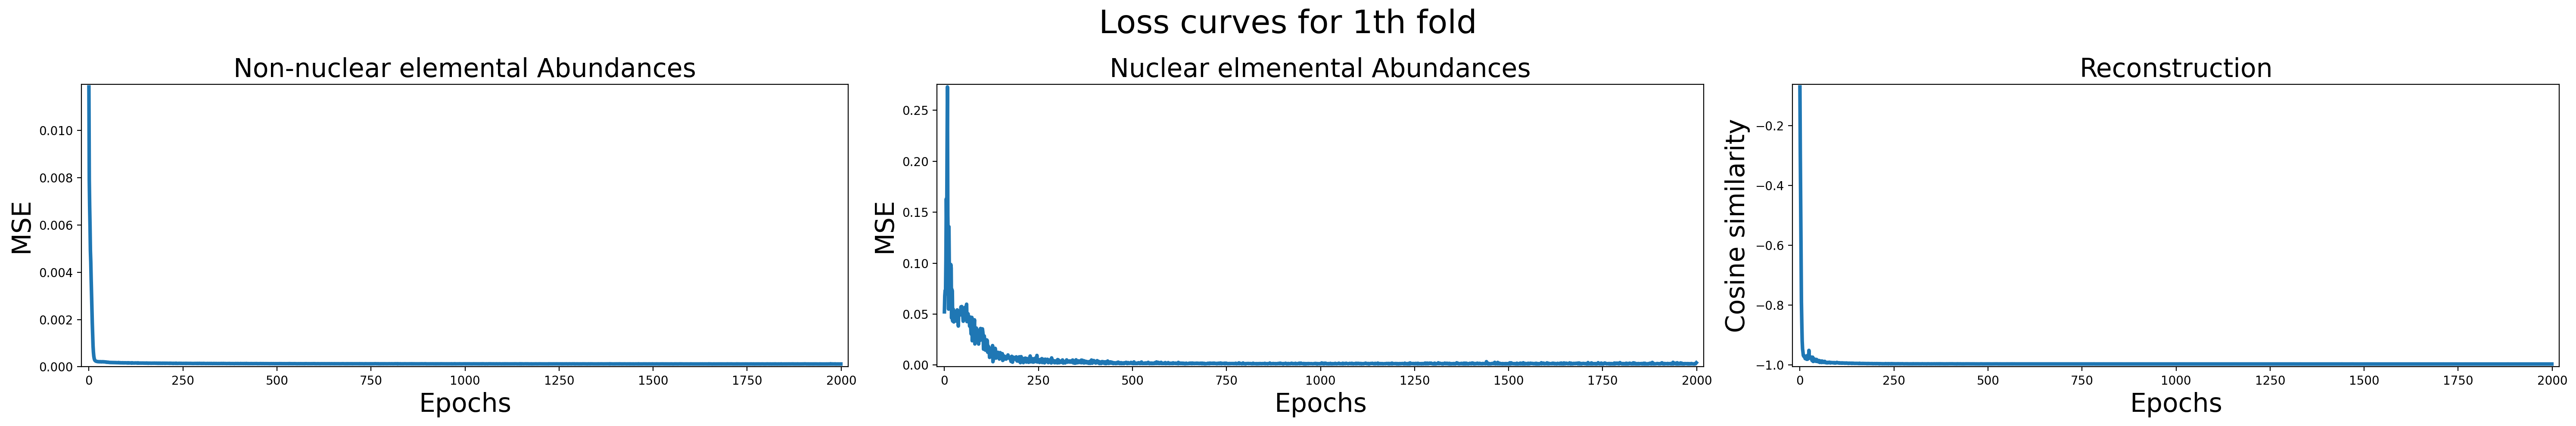

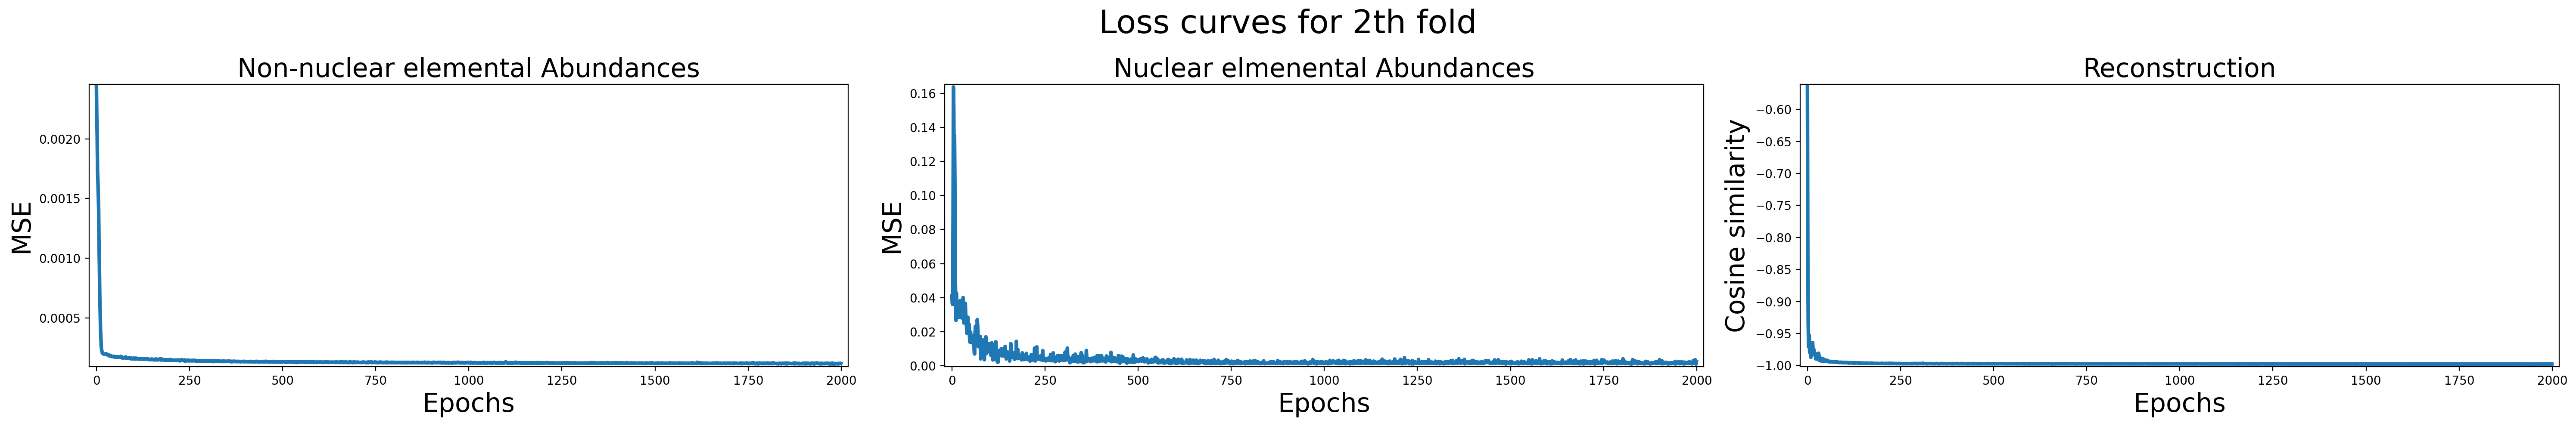

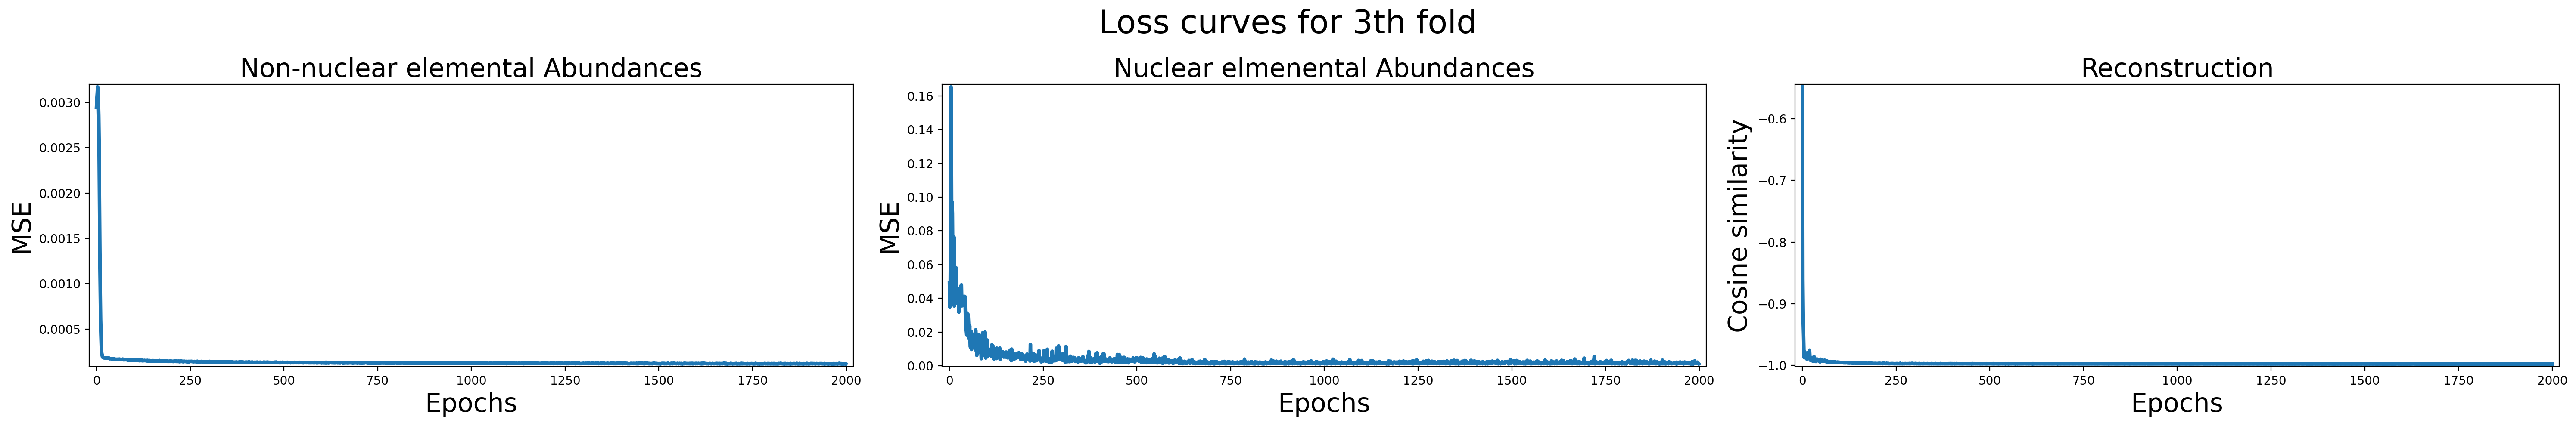

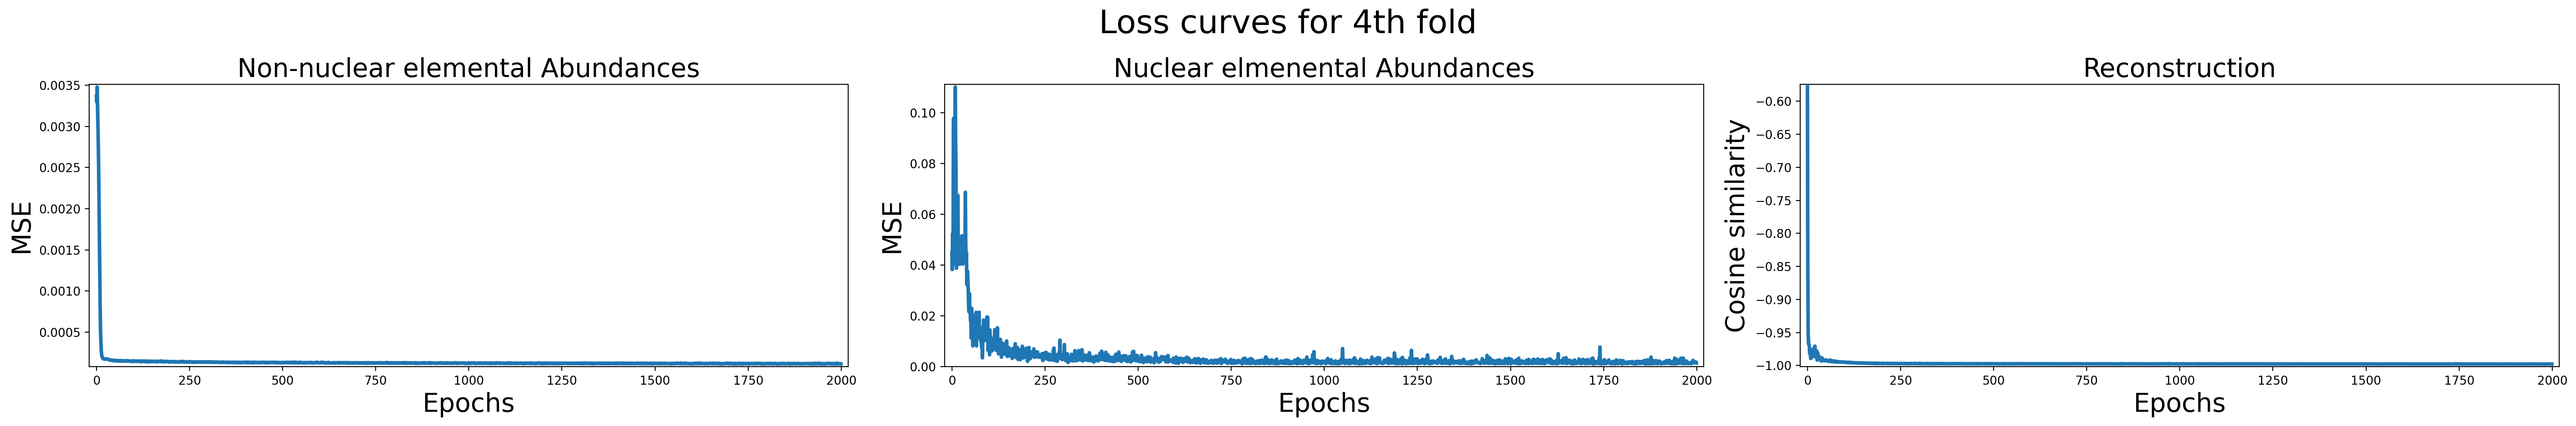

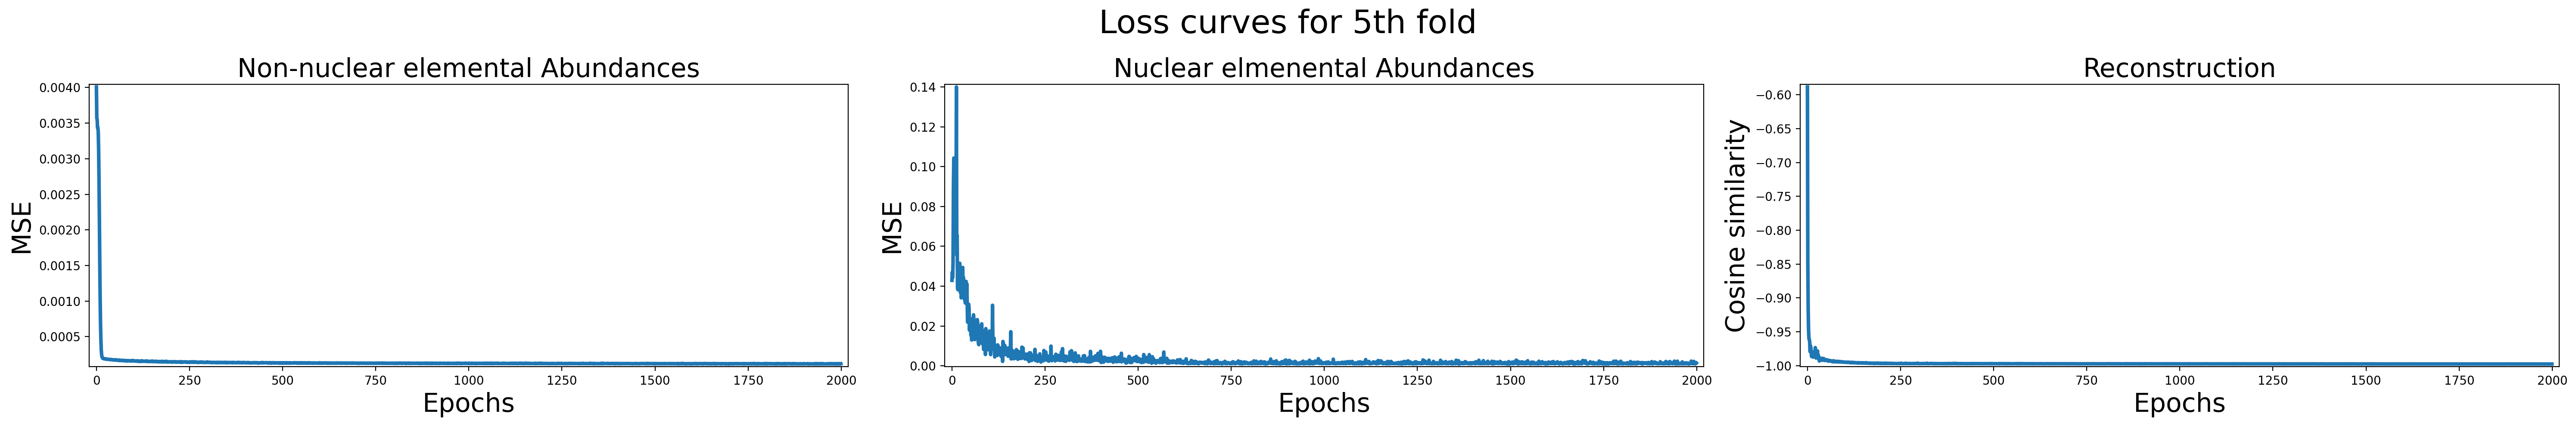

In [56]:
#iterate through the folds
for i,(trainingIndices,testingIndices) in enumerate(splitter.split(regularElementalAbundances[:,0])):
    #get the trained model for the current fold
    currentFoldModel=trainedModels[i]
    #get the current folds training history
    currenFoldTrainingHistory=modelTrainingHistories[i].history
    #get the validation losses
    regularAbundanceLoss=currenFoldTrainingHistory['val_tf.math.divide_loss']
    nuclearAbundanceLoss=currenFoldTrainingHistory['val_tf.math.abs_1_loss']
    reconstructionLoss=currenFoldTrainingHistory['val_Reconstruced_Spectra_loss']
    #plot the loss curves
    #create a figure 
    figure,axes=plt.subplots(nrows=1,
                             ncols=3,
                             figsize=(30,5),
                             dpi=200)

    #plot the loss curve
    temp=axes[0].plot(regularAbundanceLoss,
                      lw=3)
    #set the title of the figure
    axes[0].set_title("Non-nuclear elemental Abundances",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[0].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[0].set_ylabel("MSE",fontsize=baseFontSize*1.2)
    #set the margin
    axes[0].margins(0.01)
    #adjust the layout
    plt.tight_layout()
    
    #plot the loss curve
    temp=axes[1].plot(nuclearAbundanceLoss,
                      lw=3)
    #set the title of the figure
    axes[1].set_title("Nuclear elmenental Abundances",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[1].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[1].set_ylabel("MSE",fontsize=baseFontSize*1.2)
    #set the margin
    axes[1].margins(0.01)
    #adjust the layout
    plt.tight_layout()
    
    #plot the loss curve
    temp=axes[2].plot(reconstructionLoss,
                      lw=3)
    #set the title of the figure
    axes[2].set_title("Reconstruction",fontsize=baseFontSize*1.2)
    #set the axis labels
    axes[2].set_xlabel("Epochs",fontsize=baseFontSize*1.2)
    axes[2].set_ylabel("Cosine similarity",fontsize=baseFontSize*1.2)
    #set the margin
    axes[2].margins(0.01)

    #add a title
    figure.suptitle(f"Loss curves for {i+1}th fold",
                    fontsize=baseFontSize*1.5)
    #adjust the layout
    plt.tight_layout()